# Financial Econometrics I: Homework 3

Team Member:

Lin Zhang : 15845542@fsv.cuni.cz

Weiwei Qu : 51014941@fsv.cuni.cz

# Problem 1

### Using 1 minute data you will compare various Realized Measures and you will contrast your results to traditional time-series models, i.e. ARMA-GARCH. Data for the homework are stored in "HW 3 data.zip" file. In this file you will fin 1 minute prices of three highly liquid stocks (BAC, MSFT, XOM) stored in separate ".fst" files, i.e. "HW 3 BAC 1min.fst", "HW 3 MSFT 1min.fst" and "HW 3 XOM 1min.fst". For each stock do the following:


* <span style='background: lightblue'>**Setup environment and load libraries**</span>

In [1]:
# Setup environment
Sys.setenv(LANG = "en")
version[['version.string']]
Sys.setlocale("LC_TIME", "English")
options(warn = -1)  # suppressing warnings

if (!require(rugarch)) install.packages('rugarch')
if (!require(repr)) install.packages('repr')
if (!require(xts)) install.packages('xts')
if (!require(highfrequency)) install.packages('highfrequency')
if (!require(fst)) install.packages('fst')
if (!require(ggplot2)) install.packages('ggplot2')
if (!require(ggthemes)) install.packages('ggthemes')
if (!require(psych)) install.packages('psych')
if (!require(quantmod)) install.packages('quantmod')
if (!require(forecast)) install.packages('forecast')
if (!require(scales)) install.packages('scales')

library(rugarch)
library(repr)
library(xts)
library(highfrequency)
library(fst)
library(ggplot2)
library(ggthemes) 
library(psych)
library(quantmod)
library(forecast)
library(scales)

options(repr.plot.width = 8, repr.plot.height = 6)

[1] "R version 4.1.2 (2021-11-01)"

[1] "English_United States.1252"

Loading required package: rugarch

Loading required package: parallel


Attaching package: 'rugarch'


The following object is masked from 'package:stats':

    sigma


Loading required package: repr

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: highfrequency

Loading required package: fst

Loading required package: ggplot2

Loading required package: ggthemes

Loading required package: psych


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: forecast

Loading required package: scales


Attaching package: 'scales'


The following objects are masked from 'package:psych':

    alpha, rescale


**This homework is coded in environment of R version 4.1.2, please note that running the code on different R version might get slightly different results.  
"Restart & Run ALL" code would take around 6 minutes.**

###  1. Load the data into the R session - data contain time-stamp and 1 minute prices.


In [2]:
# input stock names
stock_name <- c("BAC", "MSFT", "XOM")
N <- length(stock_name)
# create xts list of 1 minute price data
xts_list_1min <- list()

# Load data
for (i in 1 : N){
    # get file name
    file_name <- paste("HW_3_", stock_name[i], "_1min.fst", sep ='')       
    # read data in
    sample_data <- read.fst(file_name)
    # create xts format
    sample_data_xts <- xts(sample_data$V1, order.by = sample_data$index)
    # update column name
    colnames(sample_data_xts) <- paste0(stock_name[i],".1_Min_Price")
    # put data into list
    xts_list_1min[[stock_name[i]]] <- sample_data_xts
}

# remove sample_data to save memory
rm(sample_data)

# check data length
lapply(xts_list_1min, length)


# check xts list data: index name, column name, time range, etc. 
lapply(xts_list_1min, head, 2)
lapply(xts_list_1min, tail, 2)

$BAC
[1] 1134050

$MSFT
[1] 933337

$XOM
[1] 882799

$BAC
                    BAC.1_Min_Price
2010-01-04 07:00:00         14.0864
2010-01-04 07:04:00         14.0864

$MSFT
                    MSFT.1_Min_Price
2010-01-04 07:44:00          24.6994
2010-01-04 07:56:00          24.6673

$XOM
                    XOM.1_Min_Price
2010-01-04 07:01:00         52.6728
2010-01-04 07:02:00         52.6728


$BAC
                    BAC.1_Min_Price
2017-12-29 17:58:00         29.2403
2017-12-29 17:59:00         29.2403

$MSFT
                    MSFT.1_Min_Price
2017-12-29 17:51:00          84.3784
2017-12-29 18:00:00          84.2500

$XOM
                    XOM.1_Min_Price
2017-12-29 17:41:00         81.0773
2017-12-29 17:56:00         81.0773


### 2. Restrict data to include years 2012-2016 and NYSE trading hours, i.e. 9:30-16:00

In [3]:
price_1min <- lapply(stock_name, function(y){
    xts_list_1min[[y]] <- xts_list_1min[[y]]["2012/2016"]["T09:30:00/T15:59:00"]
    #xts_list_1min[[y]] <- xts_list_1min[[y]]["T09:30:00/T15:59:00"]
})
names(price_1min) <- stock_name


# check data length
lapply(price_1min, length)
# sample length is 50% less

# check xts list data: index name, column name, time range, etc. 
lapply(price_1min, head, 2)
lapply(price_1min, tail, 2)

$BAC
[1] 489171

$MSFT
[1] 488555

$XOM
[1] 488666

$BAC
                    BAC.1_Min_Price
2012-01-03 09:30:00          5.3773
2012-01-03 09:31:00          5.3773

$MSFT
                    MSFT.1_Min_Price
2012-01-03 09:30:00          22.2352
2012-01-03 09:31:00          22.2268

$XOM
                    XOM.1_Min_Price
2012-01-03 09:30:00         69.2991
2012-01-03 09:31:00         69.3232


$BAC
                    BAC.1_Min_Price
2016-12-30 15:58:00         21.6262
2016-12-30 15:59:00         21.6310

$MSFT
                    MSFT.1_Min_Price
2016-12-30 15:58:00          60.0644
2016-12-30 15:59:00          60.0161

$XOM
                    XOM.1_Min_Price
2016-12-30 15:58:00         84.4014
2016-12-30 15:59:00         84.3453


### 3. Create intraday 1 minute returns from the original 1 minute prices

In [4]:
# create vector of Date v_date, for later use as index
v_date <- unique(as.Date(index(price_1min[[1]])))
# create vector of string s_date, for calling list as key
s_date <- format(strptime(v_date, "%Y-%m-%d"))
# check 5 years trading days number
length(s_date)
head(s_date, 3)
tail(s_date, 3)

[1] 1258

[1] "2012-01-03" "2012-01-04" "2012-01-05"

[1] "2016-12-28" "2016-12-29" "2016-12-30"

* <span style='background: lightblue'>**(1) Study intraday return data without subset price**</span>

In [5]:
# Without sub-sample, if call makeReturns to whole data, 
# the interday return will show at the first element of each day
ret_nosub <- list()
for (tick in stock_name){
    # calculate the return of first day to create list
    ret_nosub[[tick]] <- makeReturns(price_1min[[tick]])
    colnames(ret_nosub[[tick]]) <- paste0(tick,".nosub_Return")
}
names(ret_nosub) <- stock_name
# check data length
lapply(ret_nosub, length)
# should be the same length as the prices

$BAC
[1] 489171

$MSFT
[1] 488555

$XOM
[1] 488666

**By randomly choose two trading days to observe data, we could see that the first return element is calculated from last trade of the day before, so the first return number usually is much bigger than the second return.**

In [6]:
for (tick in stock_name){
    print(head(ret_nosub[[tick]][s_date[6]],3))
    print(head(ret_nosub[[tick]][s_date[7]],3))
}

                    BAC.nosub_Return
2012-01-10 09:30:00      0.031443315
2012-01-10 09:31:00      0.001554773
2012-01-10 09:32:00     -0.001554773
                    BAC.nosub_Return
2012-01-11 09:30:00     -0.007560524
2012-01-11 09:31:00     -0.001528754
2012-01-11 09:32:00     -0.001514794
                    MSFT.nosub_Return
2012-01-10 09:30:00       0.003954486
2012-01-10 09:31:00       0.001796601
2012-01-10 09:32:00      -0.000358209
                    MSFT.nosub_Return
2012-01-11 09:30:00      -0.014469429
2012-01-11 09:31:00       0.001455535
2012-01-11 09:32:00      -0.001091453
                    XOM.nosub_Return
2012-01-10 09:30:00     0.0066461780
2012-01-10 09:31:00    -0.0018615700
2012-01-10 09:32:00    -0.0001156501
                    XOM.nosub_Return
2012-01-11 09:30:00    -0.0064378809
2012-01-11 09:31:00    -0.0024698723
2012-01-11 09:32:00     0.0008239688


**We noticed that first element of return in each day is bigger than other trades, because it is the return of first trade today to last trade the day before -- the overnight return.**

* <span style='background: lightblue'>**(2) Subset data by days then create intraday returns**</span>

In [7]:
# for each day, call makeReturns function
ret_1min <- list()
N <- length(s_date)
for (tick in stock_name){
    # calculate the return of first day to create list
    ret_1min[[tick]] <- makeReturns(price_1min[[tick]][s_date[1]])
    # sub-sample each day to run makeReturns, 
    # and call rbind to combine returns into prevous list
    for (i in 2: N){
        ret_1min[[tick]] <- rbind(ret_1min[[tick]], 
            makeReturns(price_1min[[tick]][s_date[i]]))
    }
    colnames(ret_1min[[tick]]) <- paste0(tick,".1_Min_Return")
}
names(ret_1min) <- stock_name
# check data length
lapply(ret_1min, length)
# should be the same length as the prices

$BAC
[1] 489171

$MSFT
[1] 488555

$XOM
[1] 488666

**Now check data again, each day the first return data become zero after subset price data by days then call "makeReturns" function.** 

In [8]:
for (tick in stock_name){
    print(head(ret_1min[[tick]][s_date[6]],3))
    print(head(ret_1min[[tick]][s_date[7]],3))
}

                    BAC.1_Min_Return
2012-01-10 09:30:00      0.000000000
2012-01-10 09:31:00      0.001554773
2012-01-10 09:32:00     -0.001554773
                    BAC.1_Min_Return
2012-01-11 09:30:00      0.000000000
2012-01-11 09:31:00     -0.001528754
2012-01-11 09:32:00     -0.001514794
                    MSFT.1_Min_Return
2012-01-10 09:30:00       0.000000000
2012-01-10 09:31:00       0.001796601
2012-01-10 09:32:00      -0.000358209
                    MSFT.1_Min_Return
2012-01-11 09:30:00       0.000000000
2012-01-11 09:31:00       0.001455535
2012-01-11 09:32:00      -0.001091453
                    XOM.1_Min_Return
2012-01-10 09:30:00     0.0000000000
2012-01-10 09:31:00    -0.0018615700
2012-01-10 09:32:00    -0.0001156501
                    XOM.1_Min_Return
2012-01-11 09:30:00     0.0000000000
2012-01-11 09:31:00    -0.0024698723
2012-01-11 09:32:00     0.0008239688


### 4. To study the behavior of the functions in the highfrequency package calculate and compare

* <span style='background: lightblue'>**(1) Realized Variance calculated from 1 minute prices**</span>

In [9]:
# makeReturns = TRUE
RV_1min_price <- list()
for (tick in stock_name){
    # calculate Realized Variance
    RV_1min_price[[tick]] <- rCov(rData = price_1min[[tick]], makeReturns = TRUE)
    # put xts index as date, instead of minute
    index(RV_1min_price[[tick]]) <- v_date
    # put column name
    colnames(RV_1min_price[[tick]]) <- paste0(tick,".1_Min_Price_RV")    
}
# put list key as tickers
names(RV_1min_price) <- stock_name

# check data length
lapply(RV_1min_price, length)
# 5 years intraday return data, about 250 * 5 trading days 1258 days

lapply(RV_1min_price, head, 3)

$BAC
[1] 1258

$MSFT
[1] 1258

$XOM
[1] 1258

$BAC
           BAC.1_Min_Price_RV
2012-01-03       0.0007787649
2012-01-04       0.0010157490
2012-01-05       0.0015596122

$MSFT
           MSFT.1_Min_Price_RV
2012-01-03        9.872116e-05
2012-01-04        1.114057e-04
2012-01-05        1.098341e-04

$XOM
           XOM.1_Min_Price_RV
2012-01-03       6.303231e-05
2012-01-04       6.647432e-05
2012-01-05       8.461165e-05


* <span style='background: lightblue'>**(2) Realized Variance calculated from 1 minute returns**</span>

In [10]:
# makeReturns = FALSE
RV_1min_ret <- list()
for (tick in stock_name){
    # calculate Realized Variance
    RV_1min_ret[[tick]] <- rCov(rData = ret_1min[[tick]], makeReturns = FALSE)
    # put xts index as date, instead of minute
    index(RV_1min_ret[[tick]]) <- v_date
    # put column name
    colnames(RV_1min_ret[[tick]]) <- paste0(tick,".1_Min_Return_RV")    
}
# put list key as tickers
names(RV_1min_ret) <- stock_name

# check data length
lapply(RV_1min_ret, length)
# 5 years intraday return data, about 250 * 5 trading days

lapply(RV_1min_ret, head, 3)

$BAC
[1] 1258

$MSFT
[1] 1258

$XOM
[1] 1258

$BAC
           BAC.1_Min_Return_RV
2012-01-03        0.0007787649
2012-01-04        0.0010157490
2012-01-05        0.0015596122

$MSFT
           MSFT.1_Min_Return_RV
2012-01-03         9.872116e-05
2012-01-04         1.114057e-04
2012-01-05         1.098341e-04

$XOM
           XOM.1_Min_Return_RV
2012-01-03        6.303231e-05
2012-01-04        6.647432e-05
2012-01-05        8.461165e-05


* <span style='background: lightblue'>**(3) Compare Realized Variance from 1 minute price to 1 minute return**</span>

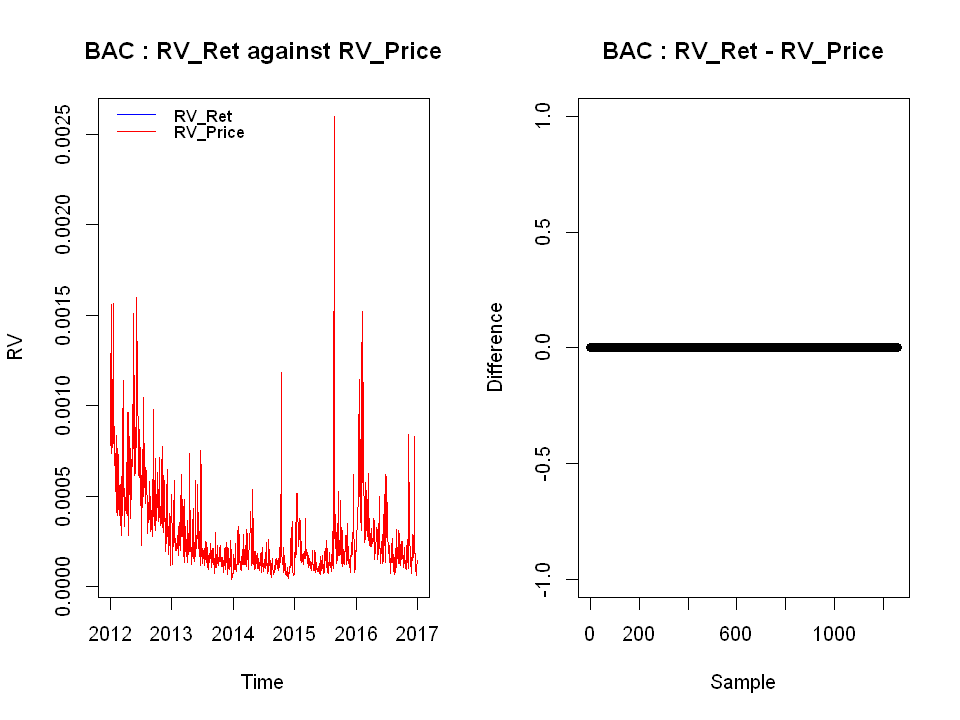

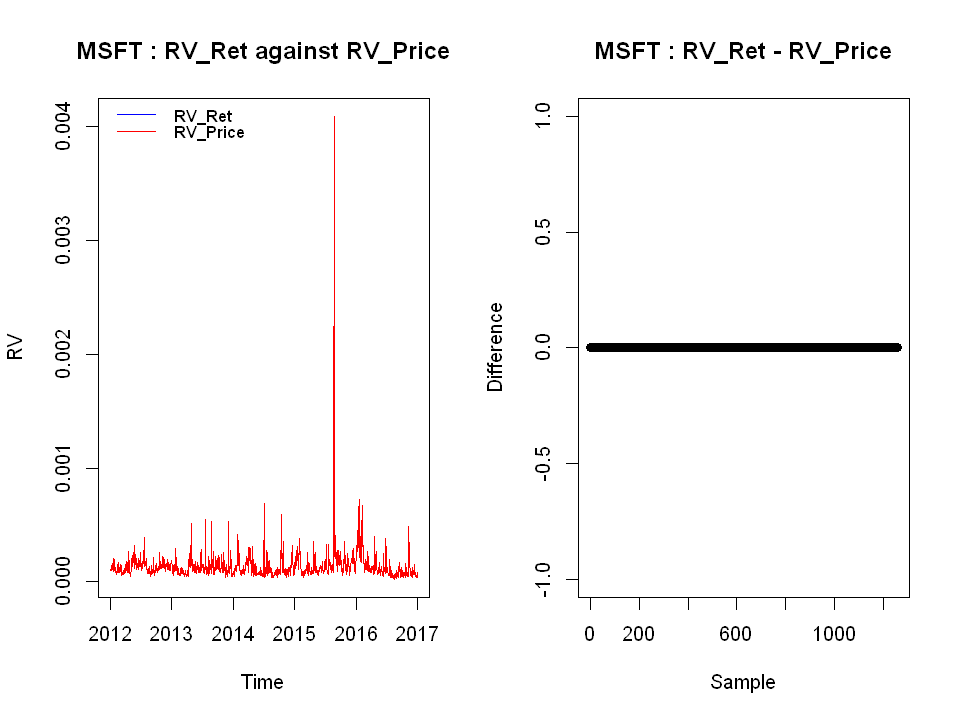

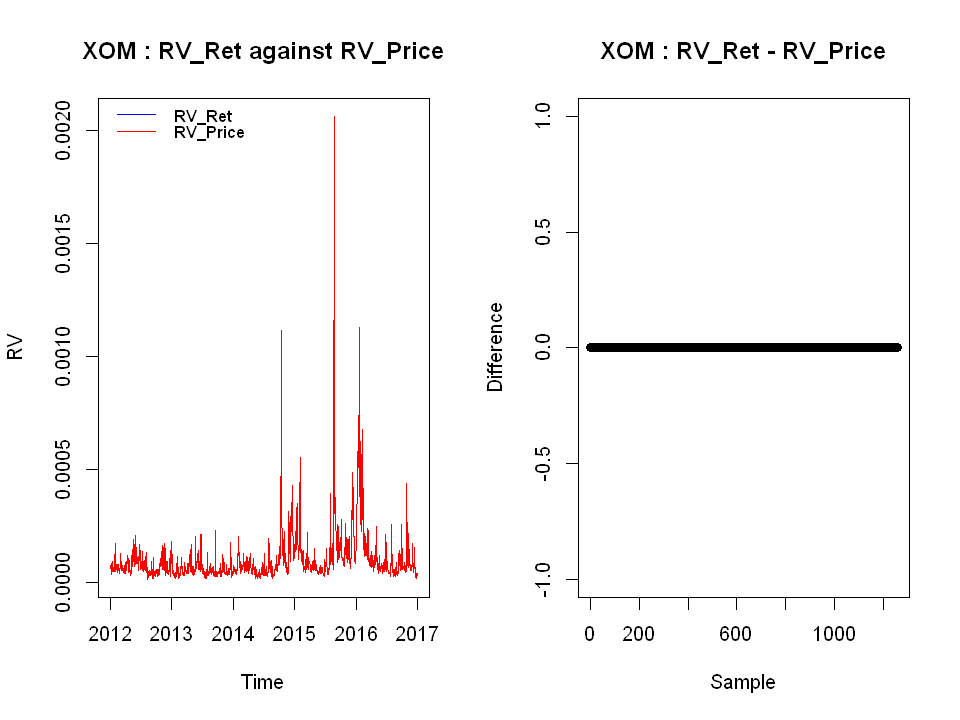

In [11]:
options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow = c(1, 2))

c_col2 <- c("blue", "red")
legend_order <- matrix(1:2,ncol=1,byrow = TRUE)

for (tick in stock_name){
    plot.zoo(RV_1min_ret[[tick]], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste(tick,": RV_Ret against RV_Price"))
    lines(zoo(RV_1min_price[[tick]]), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c("RV_Ret", "RV_Price"), col = c_col2, 
           lwd = 1, bty="n", cex = 0.8, text.font = 2)

    # check difference
    plot(as.numeric(RV_1min_ret[[tick]]) - as.numeric(RV_1min_price[[tick]]),
         xlab = "Sample", ylab= "Difference" , main=paste(tick,": RV_Ret - RV_Price"))
}

 <span style='background: yellow'>**As we can see from the charts of plot and comparation, there is no difference between RV from price and RV from return.  
Calculating returns from prices and returns shows that when we use correct inputs such as calculate returns correctly, then we should get the same output – it is a self-check that everything is right.**</span>

* <span style='background: lightblue'>**(4) What would happen if we did not subset the return by days?**</span>

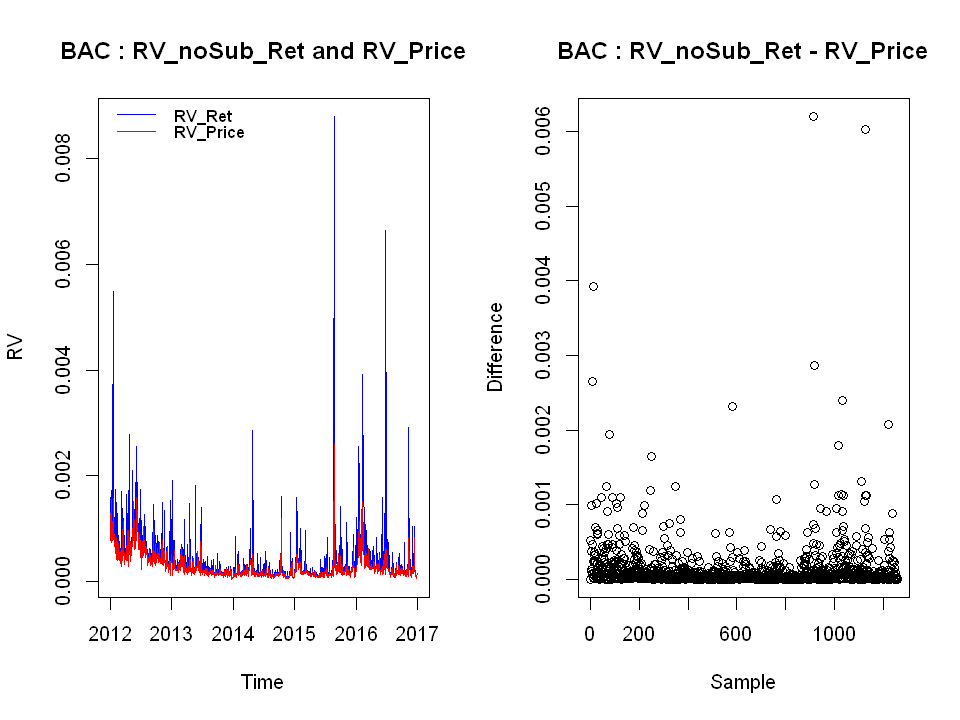

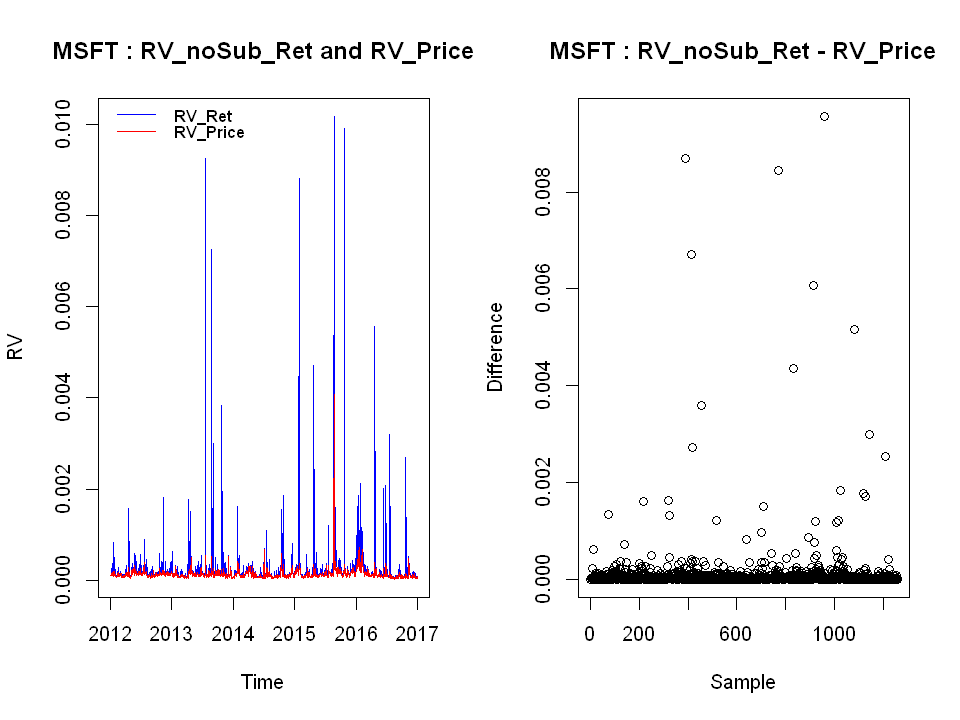

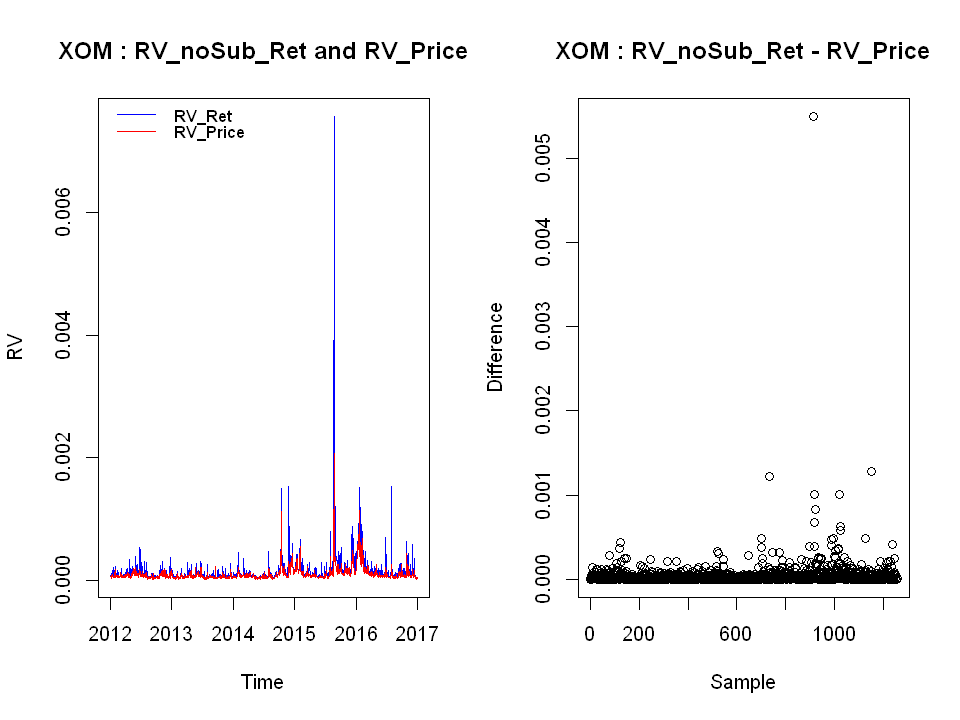

In [12]:
# makeReturns = FALSE, but use the whole return without subset days
# first element of return on each day is greater, not zero

RV_nosub_ret <- list()
for (tick in stock_name){
    # calculate Realized Variance
    RV_nosub_ret[[tick]] <- rCov(rData = ret_nosub[[tick]], makeReturns = FALSE)
    # put xts index as date, instead of minute
    index(RV_nosub_ret[[tick]]) <- v_date
    # put column name
    colnames(RV_nosub_ret[[tick]]) <- paste0(tick,".Nosub_Return_RV")    
}
# put list key as tickers
names(RV_nosub_ret) <- stock_name

options(repr.plot.width = 8, repr.plot.height = 6)
par(mfrow = c(1, 2))

for (tick in stock_name){
    plot.zoo(RV_nosub_ret[[tick]], xlab = "Time", ylab = "RV", col = c_col2[1],
        main = paste(tick,": RV_noSub_Ret and RV_Price"))
    lines(zoo(RV_1min_price[[tick]]), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c("RV_Ret", "RV_Price"), col = c_col2, 
           lwd = 1, bty="n", cex = 0.8, text.font = 2)

    # check difference
    
    plot(as.numeric(RV_nosub_ret[[tick]]) - as.numeric(RV_1min_price[[tick]]),
         xlab = "Sample", ylab= "Difference" , main=paste(tick,": RV_noSub_Ret - RV_Price"))
}

 <span style='background: yellow'>**By compare the numbers and plots, we could see that the RV calculated from without subset price data by days, is higher than "real" RV directly calculate from price. The difference is due to overnight return effect, because in each day the overnight returns between first trade today and last trade yesterday are included in RV_nosub_ret.When the stock is less liquid or the market is quieter, the effect would be greater.**</span>

### 5. using 1 minute returns, calculate and compare graphically Realized Variance for following intraday sub-periods
* 9:30 - 10:59 , i.e. create $RV_{9:30-10:59}$
* 11:00 - 14:29, i.e. create $RV_{11:00-14:29}$
* 14:30 - 16:00, i.e. create $RV_{14:30-16:00}$

* <span style='background: lightblue'>**(1) Sub-sample 1 minute returns into 3 periods**</span>

In [13]:
# create vector of time period as string for sub-sample
period_name <- c("Morning", "Noon", "Afternoon")
period_s <- c("T09:30:00/T10:59:00", "T11:00:00/T14:29:00", 
                 "T14:30:00/T15:59:00")
M <- length(period_name)
# create xts list of 1 minute period return data
period_1min_ret <- list()
# temp list period_list for store period return data
period_list <- list()

# for loop of period of the day
for (i in 1: M){
    # in each period, for loop of 3 stocks
    print(paste(period_name[i], period_s[i]))
    for (tick in stock_name){
        #  use period_s to sub-sample 1 minute return xts
        print(tick)
        period_ret <- ret_1min[[tick]][period_s[i]]        
        print(paste("Days length:",length(unique(as.Date(index(period_ret))))))
        # update column name
        colnames(period_ret) <- paste(tick, period_name[i])    
        period_list[[tick]] <- period_ret
    }
    # put list key as tickers
#    names(period_list) <- stock_name    
    period_1min_ret[[period_name[i]]] <- period_list
    period_list <- NULL
}

[1] "Morning T09:30:00/T10:59:00"
[1] "BAC"
[1] "Days length: 1258"
[1] "MSFT"
[1] "Days length: 1258"
[1] "XOM"
[1] "Days length: 1258"
[1] "Noon T11:00:00/T14:29:00"
[1] "BAC"
[1] "Days length: 1258"
[1] "MSFT"
[1] "Days length: 1258"
[1] "XOM"
[1] "Days length: 1258"
[1] "Afternoon T14:30:00/T15:59:00"
[1] "BAC"
[1] "Days length: 1258"
[1] "MSFT"
[1] "Days length: 1258"
[1] "XOM"
[1] "Days length: 1256"


**Check time stamps of trading data after supsampling into three periods.**

In [14]:
# check data after sub-sampling
head(period_1min_ret[["Morning"]][["MSFT"]], 3)
head(period_1min_ret[["Noon"]][["BAC"]], 3)
head(period_1min_ret[["Afternoon"]][["XOM"]], 3)

                     MSFT Morning
2012-01-03 09:30:00  0.0000000000
2012-01-03 09:31:00 -0.0003778508
2012-01-03 09:32:00  0.0003778508

                        BAC Noon
2012-01-03 11:00:00  0.001719691
2012-01-03 11:01:00 -0.001719691
2012-01-03 11:02:00  0.000000000

                    XOM Afternoon
2012-01-03 14:30:00 -0.0004633600
2012-01-03 14:31:00 -0.0001165933
2012-01-03 14:32:00  0.0000000000

**We noticed that the length of data are different, so check the data below.**

In [15]:
# Find the missing days after sub-sampling
period_RV9 <- rCov(rData = period_1min_ret[["Afternoon"]][["XOM"]], 
                    makeReturns = FALSE)  
v_date9 <- as.Date(index(period_RV9))
v_date[!(v_date %in% v_date9)]

# Last trades happened before 14:30 in those two days
tail(xts_list_1min[["XOM"]]["2012-12-24"], 3)
tail(xts_list_1min[["XOM"]]["2013-07-03"], 3)

[1] "2012-12-24" "2013-07-03"

                    XOM.1_Min_Price
2012-12-24 13:27:00         71.7751
2012-12-24 13:42:00         71.7998
2012-12-24 14:15:00         71.6925

                    XOM.1_Min_Price
2013-07-03 13:55:00         75.8636
2013-07-03 13:56:00         75.8636
2013-07-03 14:10:00         75.9055

**We noticed that after subsamplling, XOM seems missed two days trading data in afternoon period. The reason is in those two days, XOM last trade happend before 14:30, market was quiet before Christmas and Independence day.   
To avoid NA error when compare with sum data, later we set those two days afternoon RV as zero.** 

* <span style='background: lightblue'>**(2) Calculate Realized Variance for intraday sub-periods**</span>

In [16]:
period_1min_RV <- list()
# temp list period_list for store period return data
period_list <- list()

# merge 3 periods into one xts
for (tick in stock_name){
    for (i in 1: M){
        period_RV <- rCov(rData = period_1min_ret[[period_name[i]]][[tick]], 
                    makeReturns = FALSE)
        index(period_RV) <- as.Date(index(period_RV))
        period_list[[period_name[i]]] <- period_RV
    }      
    period_1min_RV[[tick]] <- do.call(merge, period_list) 
    period_list <- NULL
}

lapply(period_1min_RV, head, 3)

$BAC
            BAC.Morning     BAC.Noon BAC.Afternoon
2012-01-03 0.0002504779 0.0003408082  0.0001874788
2012-01-04 0.0003000076 0.0005219144  0.0001938271
2012-01-05 0.0004081624 0.0007620362  0.0003894136

$MSFT
           MSFT.Morning    MSFT.Noon MSFT.Afternoon
2012-01-03 3.227133e-05 4.179821e-05   2.465162e-05
2012-01-04 4.692697e-05 4.766801e-05   1.681067e-05
2012-01-05 3.999007e-05 4.982961e-05   2.001441e-05

$XOM
            XOM.Morning     XOM.Noon XOM.Afternoon
2012-01-03 2.267310e-05 2.748545e-05  1.287376e-05
2012-01-04 4.035261e-05 1.822037e-05  7.901350e-06
2012-01-05 3.756854e-05 2.797994e-05  1.906316e-05


**Set NA to zero RV for period without trading.**

In [17]:
# remove NA value created by rCov after merge
# because the index length of afternoon period days are different
for (i in 1 : 3){
    period_1min_RV[[i]][is.na(period_1min_RV[[i]])] <- 0
    print(which(is.na(period_1min_RV[[i]])))
}

integer(0)
integer(0)
integer(0)


* <span style='background: lightblue'>**(3) Compare graphically of Realized Variance for intraday sub-periods**</span>

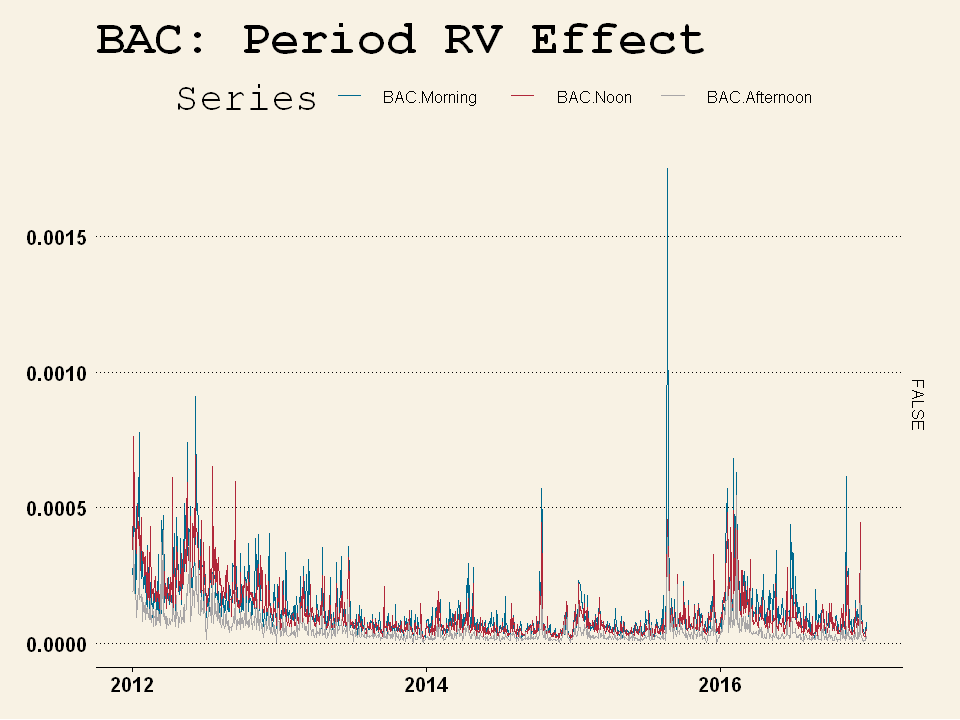

In [18]:
options(repr.plot.width = 8, repr.plot.height = 6)
autoplot(period_1min_RV[["BAC"]], facets = FALSE) + geom_line() + theme_wsj()+ 
   scale_colour_wsj("dem_rep")+ ggtitle("BAC: Period RV Effect")


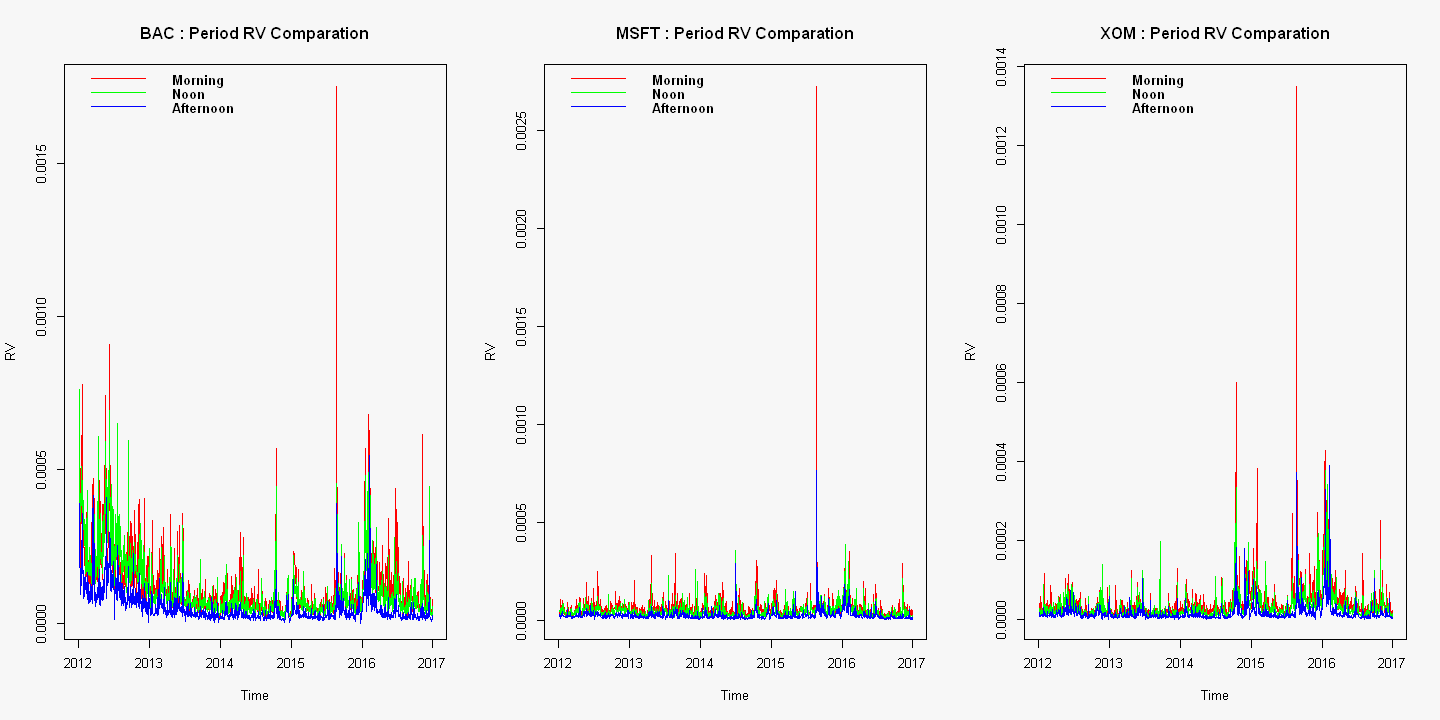

In [19]:
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 3))
par(bg = "#f7f7f7")
c_col3 <- c( 'red', 'green','blue')

for (tick in stock_name){
    plot.zoo(period_1min_RV[[tick]][,1], xlab = "Time", ylab = "RV", 
            col = c_col3[1], main=paste(tick,": Period RV Comparation"))
    lines(zoo(period_1min_RV[[tick]][,2]), col = c_col3[2], lwd = 1)
    lines(zoo(period_1min_RV[[tick]][,3]), col = c_col3[3], lwd = 1)
    legend("topleft", legend = period_name, col = c_col3, lwd = 1, 
           text.font = 2, bty="n")
}

* <span style='background: lightblue'>**(4) Comments**</span>

<span style='background: yellow'>**By comparation, clearly Morning period has higher maximum RV, Afternoon period RV seems not higher than Noon RV, maybe mainly due to the afternoon period time range(1.5 hours) is much shorter than noon sub-period(3.5 hours).  
From this chart, we could already observe the diurnal pattern of intraday trading activity, more analysis will be provied in later questions.**</span>

### 6. compute and plot the difference between daily RV and sum of intraday RV, i.e. RVdaily vs $RV_{9:30-10:59} + RV_{11:00-14:29} + RV_{14:30-16:00}$ 
* comment your findings - what is the possible source for such result?

* <span style='background: lightblue'>**(1) Compute sum of intraday RV**</span>

In [20]:
# Create the column of sum of intraday RV
period_1min_RV_sum <- period_1min_RV

for (tick in stock_name){    
    period_1min_RV_sum[[tick]]$Period.Sum <- rowSums(period_1min_RV[[tick]][,
        colnames(period_1min_RV[[tick]])])
}
lapply(period_1min_RV_sum, head, 3)
lapply(RV_1min_ret, head, 3)

$BAC
            BAC.Morning     BAC.Noon BAC.Afternoon   Period.Sum
2012-01-03 0.0002504779 0.0003408082  0.0001874788 0.0007787649
2012-01-04 0.0003000076 0.0005219144  0.0001938271 0.0010157490
2012-01-05 0.0004081624 0.0007620362  0.0003894136 0.0015596122

$MSFT
           MSFT.Morning    MSFT.Noon MSFT.Afternoon   Period.Sum
2012-01-03 3.227133e-05 4.179821e-05   2.465162e-05 9.872116e-05
2012-01-04 4.692697e-05 4.766801e-05   1.681067e-05 1.114057e-04
2012-01-05 3.999007e-05 4.982961e-05   2.001441e-05 1.098341e-04

$XOM
            XOM.Morning     XOM.Noon XOM.Afternoon   Period.Sum
2012-01-03 2.267310e-05 2.748545e-05  1.287376e-05 6.303231e-05
2012-01-04 4.035261e-05 1.822037e-05  7.901350e-06 6.647432e-05
2012-01-05 3.756854e-05 2.797994e-05  1.906316e-05 8.461165e-05


$BAC
           BAC.1_Min_Return_RV
2012-01-03        0.0007787649
2012-01-04        0.0010157490
2012-01-05        0.0015596122

$MSFT
           MSFT.1_Min_Return_RV
2012-01-03         9.872116e-05
2012-01-04         1.114057e-04
2012-01-05         1.098341e-04

$XOM
           XOM.1_Min_Return_RV
2012-01-03        6.303231e-05
2012-01-04        6.647432e-05
2012-01-05        8.461165e-05


**By observation of the tables above, we could see the numbers of daily RV and sum of intraday RV are almost same. Now we check the plots.**

* <span style='background: lightblue'>**(2) Plot the difference between daily RV and sum of intraday RV**</span>

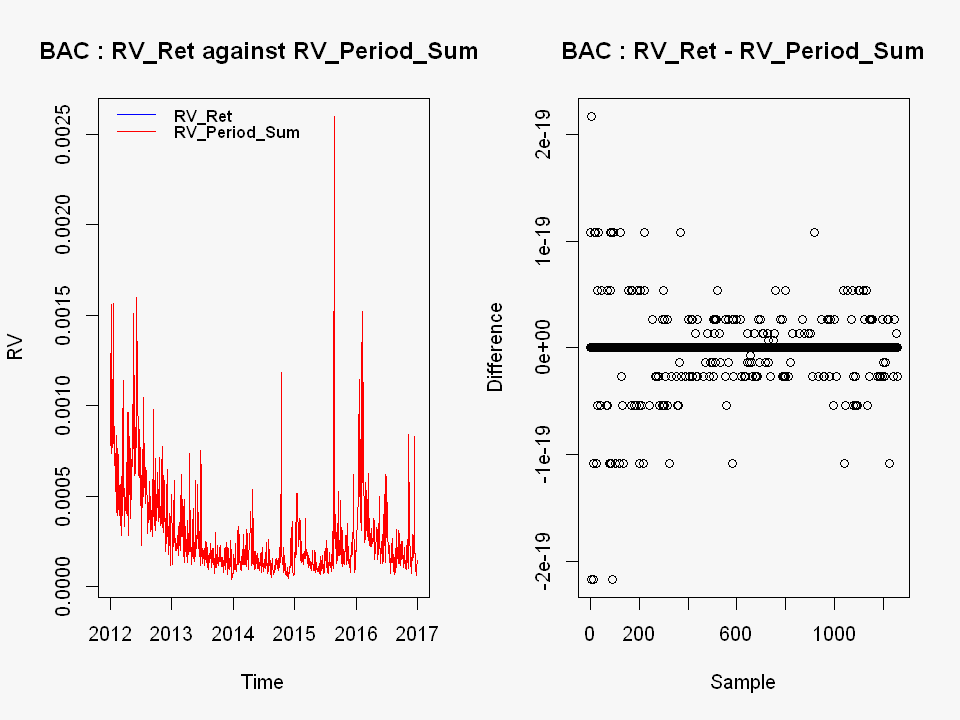

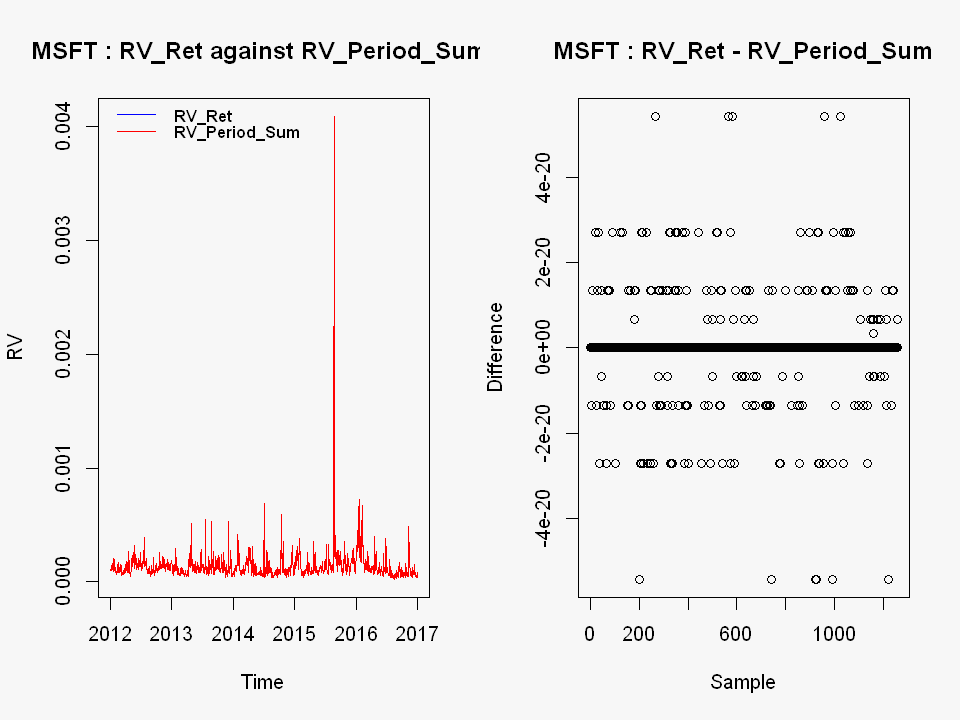

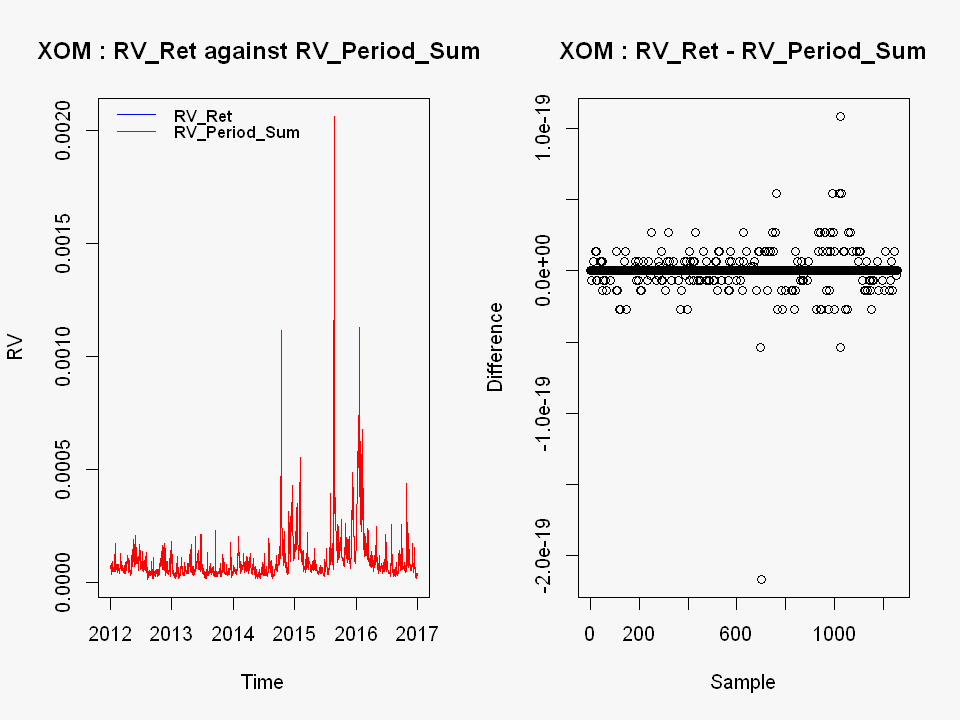

In [21]:
options(repr.plot.width = 8, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 2))

for (tick in stock_name){
    plot.zoo(RV_1min_ret[[tick]], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste(tick,": RV_Ret against RV_Period_Sum "))
    lines(zoo(period_1min_RV_sum[[tick]]$Period.Sum), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c("RV_Ret", "RV_Period_Sum" ), col = c_col2, 
           lwd = 1, bty="n", text.font = 2, cex = 0.8)    

    # check difference
    plot(as.numeric(RV_1min_ret[[tick]]) - as.numeric(period_1min_RV_sum[[tick]]$Period.Sum),
         xlab = "Sample", ylab= "Difference" , main=paste(tick,": RV_Ret - RV_Period_Sum"))    

}

* <span style='background: lightblue'>**(3) Comments**</span>

**From the comparation plots we could see the difference is really small (only few samples at $10^{-19}$ level), it is basiclly just system roundings.  
And the reason is because by defination daily RV equals the sum of intraday RV:**   
$$RV_T=\sum_{i=1}^{NN} r_i^2$$



### 7. Calculate and plot the percentage share of individual intraday RV on total daily RV
* Comment your findings - how important are trading hours?

* <span style='background: lightblue'>**(1) Calculate the percentage share of individual intraday RV**</span>

In [22]:
# Create the percentage of intraday RV
period_1min_RV_percent <- period_1min_RV
P <- length(colnames(period_1min_RV[[1]]))

# for easier compare, we *100 to percentage numbers
for (tick in stock_name){    
    for (i in 1: P){
        period_1min_RV_percent[[tick]][,i] <- period_1min_RV_sum[[tick]][,
            i]/period_1min_RV_sum[[tick]][,4] * 100
    } 
}

lapply(period_1min_RV_percent, head, 3)

$BAC
           BAC.Morning BAC.Noon BAC.Afternoon
2012-01-03    32.16348 43.76266      24.07386
2012-01-04    29.53560 51.38222      19.08218
2012-01-05    26.17076 48.86062      24.96862

$MSFT
           MSFT.Morning MSFT.Noon MSFT.Afternoon
2012-01-03     32.68938  42.33966       24.97096
2012-01-04     42.12261  42.78778       15.08960
2012-01-05     36.40952  45.36807       18.22241

$XOM
           XOM.Morning XOM.Noon XOM.Afternoon
2012-01-03    35.97060 43.60533      20.42407
2012-01-04    60.70405 27.40963      11.88632
2012-01-05    44.40115 33.06866      22.53019


* <span style='background: lightblue'>**(2) Check the statistic numbers**</span>

In [23]:
as.data.frame(describe(period_1min_RV_percent[[1]]))
as.data.frame(describe(period_1min_RV_percent[[2]]))
as.data.frame(describe(period_1min_RV_percent[[3]]))


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BAC.Morning,1,1258,43.38139,9.764398,43.65684,43.42157,10.016118,10.14108,73.30171,63.16063,-0.04823234,-0.09135396,0.2752993
BAC.Noon,2,1258,39.36310,7.492818,39.12297,39.20281,7.208301,17.55151,69.96769,52.41619,0.20670995,0.15344943,0.2112540
BAC.Afternoon,3,1258,17.25551,5.932164,16.62388,16.80698,5.218450,0.00000,58.91077,58.91077,1.17273280,3.81226241,0.1672526


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSFT.Morning,1,1258,45.87415,10.799254,45.71811,45.96621,11.015912,6.633514,76.21436,69.58085,-0.1114295,-0.02839165,0.3044763
MSFT.Noon,2,1258,36.20716,8.374440,35.55833,35.95761,8.042444,14.547185,76.16168,61.61450,0.5471593,1.24341287,0.2361106
MSFT.Afternoon,3,1258,17.91869,6.658016,17.18358,17.44880,5.964892,1.079550,58.77818,57.69863,1.0241367,2.73175574,0.1877174


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
XOM.Morning,1,1258,46.26793,10.915475,46.69122,46.57691,10.597089,4.875275,77.32653,72.45125,-0.3045687,0.2184172,0.3077530
XOM.Noon,2,1258,35.77284,8.629142,34.99511,35.35988,7.744790,11.205101,91.40969,80.20459,0.9387402,3.2943598,0.2432917
XOM.Afternoon,3,1258,17.95923,7.377113,16.70486,17.21336,6.394995,0.000000,63.99989,63.99989,1.3652430,3.9206319,0.2079918


**For these three highly liquid stocks, the percentage mean of morning, noon and afternoon period are roughly about 45%, 37% and 18% respectively.**

* <span style='background: lightblue'>**(3) Plot the percentage share of individual intraday RV on total daily RV**</span>

Loading required package: ggfortify

Registered S3 methods overwritten by 'ggfortify':
  method                 from    
  autoplot.Arima         forecast
  autoplot.acf           forecast
  autoplot.ar            forecast
  autoplot.bats          forecast
  autoplot.decomposed.ts forecast
  autoplot.ets           forecast
  autoplot.forecast      forecast
  autoplot.stl           forecast
  autoplot.ts            forecast
  fitted.ar              forecast
  fortify.ts             forecast
  residuals.ar           forecast



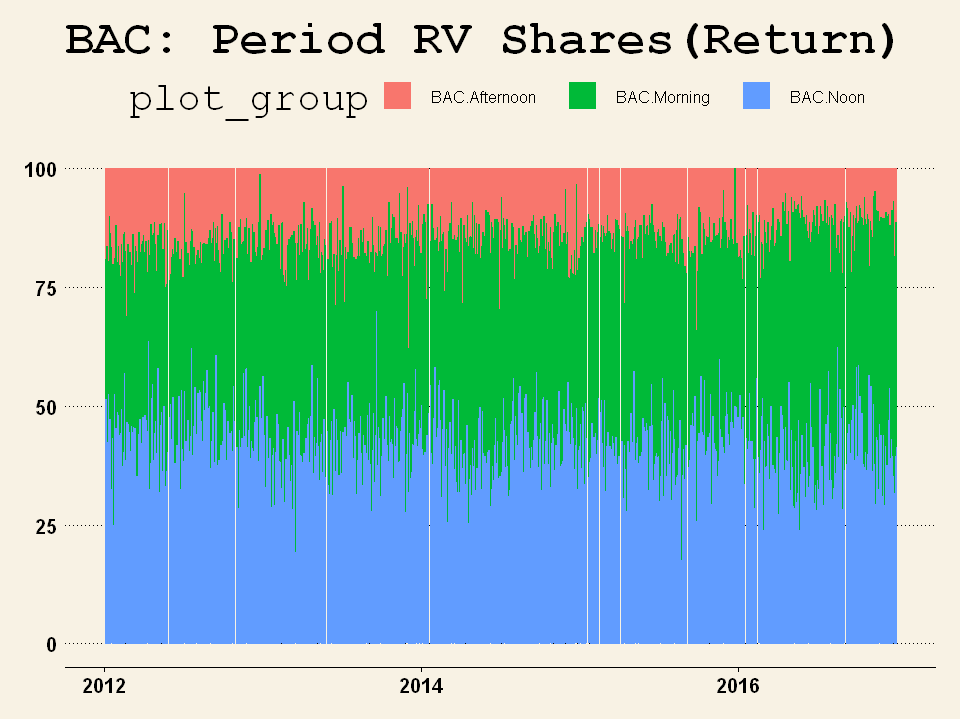

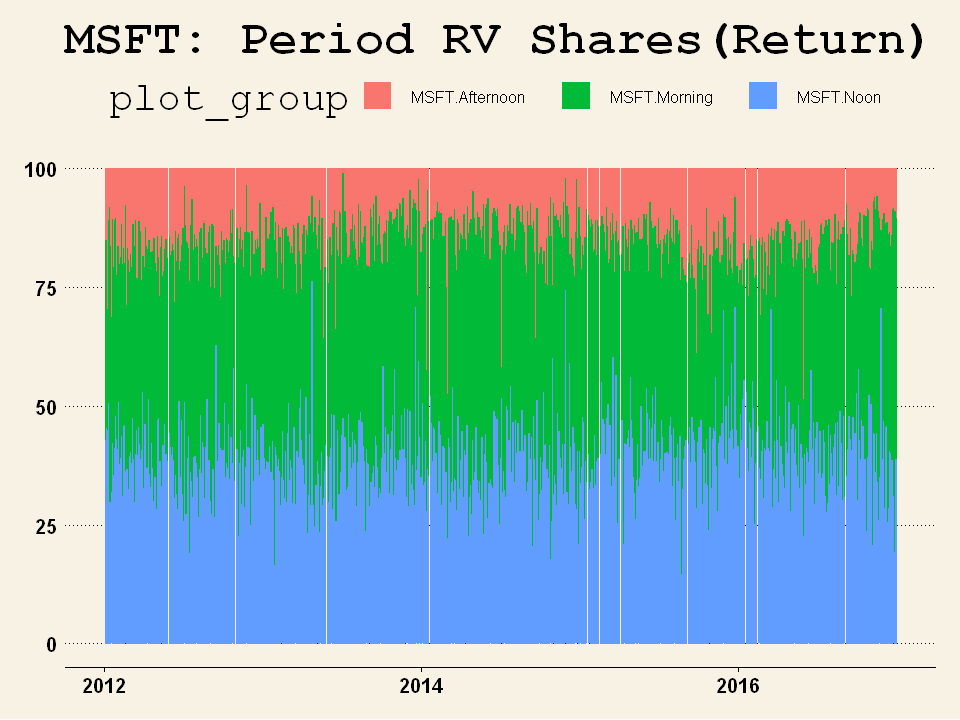

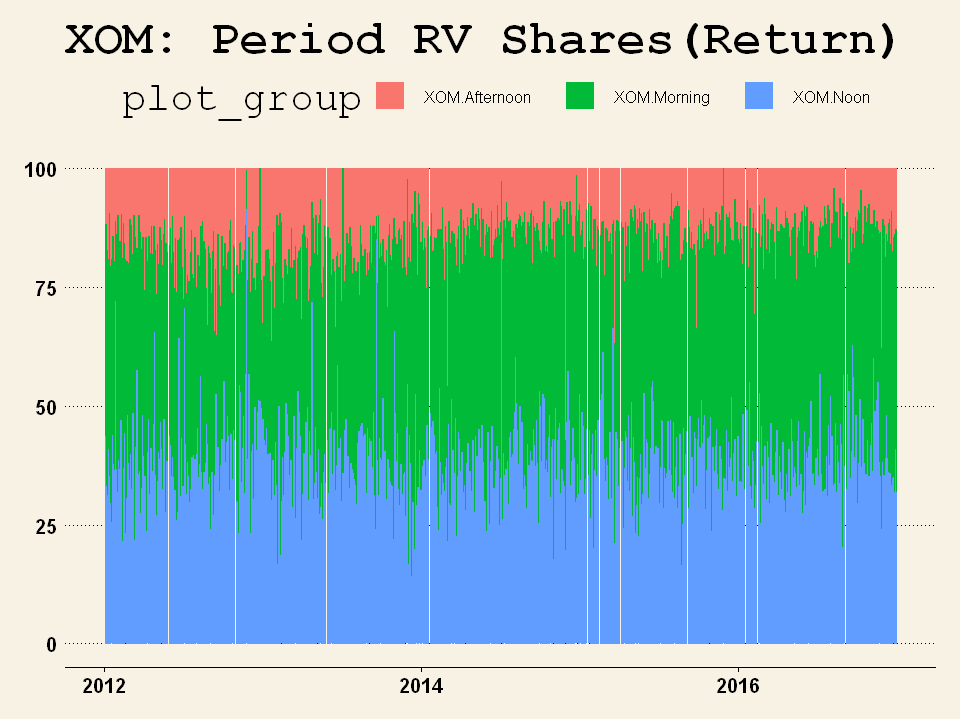

In [24]:
if (!require(ggfortify)) install.packages('ggfortify')
library(ggfortify)

options(repr.plot.width = 8, repr.plot.height = 6)
autoplot(period_1min_RV_percent[["BAC"]], ts.geom = 'bar', facets = FALSE, stacked = TRUE) +  
    theme_wsj()+  ggtitle("BAC: Period RV Shares(Return)")
autoplot(period_1min_RV_percent[["MSFT"]], ts.geom = 'bar', facets = FALSE, stacked = TRUE) +  
    theme_wsj()+  ggtitle("MSFT: Period RV Shares(Return)")
autoplot(period_1min_RV_percent[["XOM"]], ts.geom = 'bar', facets = FALSE, stacked = TRUE) +  
    theme_wsj()+  ggtitle("XOM: Period RV Shares(Return)")


<span style='background: yellow'>**Clearly, morning period has the highest percentage of the day. And the reason of RV of noon period is higher than RV of afternoon, maybe because the noon period is longer(3.5 hours) than afternoon period(1.5 hours).  
09:30 - 10:59, 1.5 hours;  
11:00 - 14:29, 3.5 hours;  
14:30 - 15:59, 1.5 hours.  
By subsampling trades by three periods, noon period has more trades than afternoon only because the time period is longer. If the 3 periods have same length, afternoon period would have higher RV and higher percentage of the day than noon period does.**</span>

In [25]:
length(period_1min_ret[["Morning"]][["MSFT"]])
length(period_1min_ret[["Noon"]][["MSFT"]])
length(period_1min_ret[["Afternoon"]][["MSFT"]])

[1] 113220

[1] 263189

[1] 112146

**By plot observation of Spot Volatility, we could easily see the periodicity effect during the trading day.**

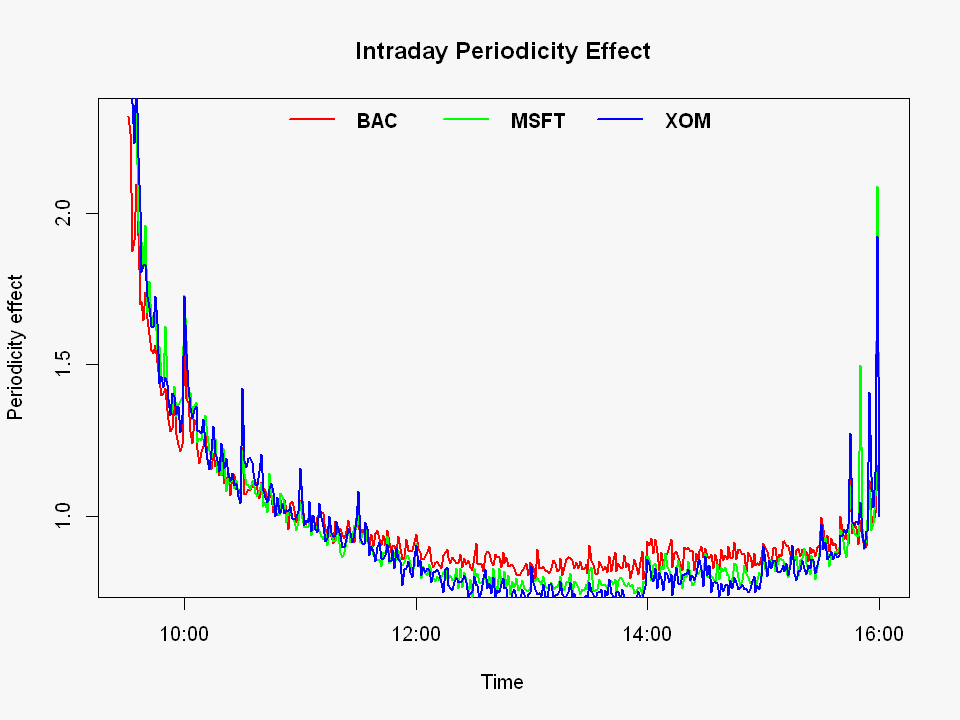

In [26]:
spotRV <- list()
for (tick in stock_name){
    spotRV[[tick]] <- spotVol(data = price_1min[[tick]], 
            periodicVol = "WSD", alignPeriod = 1)
}

options(repr.plot.width = 8, repr.plot.height = 6)
par(bg = "#f7f7f7")
plot.zoo(spotRV[[1]][[3]], xlab = "Time", ylab = "Periodicity effect",
      col = c_col3[1], main=paste("Intraday Periodicity Effect"), lwd = 2)
lines(zoo(spotRV[[2]][[3]]), col = c_col3[2], lwd = 2)
lines(zoo(spotRV[[3]][[3]]), col = c_col3[3], lwd = 2)
legend("top", legend = stock_name, bty="n",col = c_col3, lwd = 2,
       text.font = 2, ncol = 3)

* <span style='background: lightblue'>**(4) Comments**</span>

 <span style='background: yellow'>**From the chart and our analysis above, the most important trading hours are morning when market just open.  
The increased volatility in the morning is  due to increased amounts of price discovery happening. The news published since markets closed a day earlier are incorporated in the stock price during the market opening times, which caused more trade.  
Also when the market is closing, many traders need to reduce the risk exposure to avoid overnight position(some day-traders only trade during one day), also caused more trades and increased volatility before market close.**</span>

### 8. Repeat the analysis in points 5, 6 and 7 using 1 minute prices and comment your findings
* hint: the most distinct difference will be comparison of $RV_{daily}$ vs $RV_{9:30-10:59} + RV_{11:00-14:29} + RV_{14:30-16:00}$ - What is driving the results?

* <span style='background: lightblue'>**(1)Sub-sample 1 minute price into 3 periods**</span>

In [27]:
M <- length(period_name)
period_1min_price <- list()

for (i in 1: M){
    for (tick in stock_name){
        period_price <- price_1min[[tick]][period_s[i]]              
        colnames(period_price) <- paste(tick, period_name[i])    
        period_list[[tick]] <- period_price
    } 
    period_1min_price[[period_name[i]]] <- period_list
    period_list <- NULL
}

# check data after sub-sampling
head(period_1min_price[["Morning"]][["MSFT"]], 3)
head(period_1min_price[["Noon"]][["BAC"]], 3)
head(period_1min_price[["Afternoon"]][["XOM"]], 3)

                    MSFT Morning
2012-01-03 09:30:00      22.2352
2012-01-03 09:31:00      22.2268
2012-01-03 09:32:00      22.2352

                    BAC Noon
2012-01-03 11:00:00   5.4708
2012-01-03 11:01:00   5.4614
2012-01-03 11:02:00   5.4614

                    XOM Afternoon
2012-01-03 14:30:00       69.4763
2012-01-03 14:31:00       69.4682
2012-01-03 14:32:00       69.4682

* <span style='background: lightblue'>**(2) Calculate Realized Variance for intraday sub-periods**</span>

**Clean the trading data:  
If in one day, there is only one trade and one price, when call rCov function with makeReturns = TRUE, the function could not calculate the return, because the function makeReturns() needs two price to create return. So after subsampling to period, we need to handle those sub-period which only has one trade. This situation would happen more often for less liquid stocks.**

In [28]:
period_1min_price[["Afternoon"]][["MSFT"]]["2013-11-29"]
period_1min_price[["Afternoon"]][["MSFT"]]["2015-12-24"]

                    MSFT Afternoon
2013-11-29 15:56:00        33.9486

                    MSFT Afternoon
2015-12-24 14:49:00        52.1631

**During "2013-11-29" and "2015-12-24" those two days, in the afternnon period only one trade exists, which would create error for  makeReturns() function, so we add one dummy trade as the same price into the period. By definition, if there is only one trade in that day, the RV of the day should be zero.** 

In [29]:
bar1 <- period_1min_price[["Afternoon"]][["MSFT"]]["20131129"]
bar2 <- period_1min_price[["Afternoon"]][["MSFT"]]["20151224"]
period_1min_price[["Afternoon"]][["MSFT"]] <- c(period_1min_price[["Afternoon"]][["MSFT"]], 
        xts(bar1, index(bar1)-1))
period_1min_price[["Afternoon"]][["MSFT"]] <- c(period_1min_price[["Afternoon"]][["MSFT"]], 
        xts(bar2, index(bar2)-1))
period_1min_price[["Afternoon"]][["MSFT"]]["2013-11-29"]
period_1min_price[["Afternoon"]][["MSFT"]]["2015-12-24"]

                    MSFT Afternoon
2013-11-29 15:55:59        33.9486
2013-11-29 15:56:00        33.9486

                    MSFT Afternoon
2015-12-24 14:48:59        52.1631
2015-12-24 14:49:00        52.1631

**Calculate Realized Variance by price data(makeReturns = TRUE)**

In [30]:
period_1min_RV_p <- list()
period_list <- list()
# merge 3 periods into one xts table
for (tick in stock_name){
#    print(tick)
    for (i in 1: M){
#        print(paste(period_name[i], period_s[i]))
        period_RV <- rCov(rData = period_1min_price[[period_name[i]]][[tick]], 
                    makeReturns = TRUE)
        index(period_RV) <- as.Date(index(period_RV))
        period_list[[period_name[i]]] <- period_RV
    }      
    period_1min_RV_p[[tick]] <- do.call(merge, period_list) 
    period_list <- NULL
}

lapply(period_1min_RV_p, head, 3)

$BAC
            BAC.Morning     BAC.Noon BAC.Afternoon
2012-01-03 0.0002504779 0.0003378509  0.0001874788
2012-01-04 0.0003000076 0.0005093887  0.0001909224
2012-01-05 0.0004081624 0.0007620362  0.0003868859

$MSFT
           MSFT.Morning    MSFT.Noon MSFT.Afternoon
2012-01-03 3.227133e-05 4.165852e-05   2.465162e-05
2012-01-04 4.692697e-05 4.753181e-05   1.681067e-05
2012-01-05 3.999007e-05 4.982961e-05   1.988377e-05

$XOM
            XOM.Morning     XOM.Noon XOM.Afternoon
2012-01-03 2.267310e-05 2.743186e-05  1.265906e-05
2012-01-04 4.035261e-05 1.816561e-05  7.847123e-06
2012-01-05 3.756854e-05 2.763672e-05  1.819045e-05


**Check NA value, because some period is empty, so rCov will create NA value, which may cause problem later when compare the sum of intraday RV.**

In [31]:
which(is.na(period_1min_RV_p[[i]]))

period_1min_RV_p[["MSFT"]]["2013-11-29"]
period_1min_RV_p[["MSFT"]]["2015-12-24"]
period_1min_RV_p[["XOM"]]["2012-12-24"]
period_1min_RV_p[["XOM"]]["2013-07-03"]

[1] 2762 2893

           MSFT.Morning    MSFT.Noon MSFT.Afternoon
2013-11-29 3.165182e-05 4.039335e-05              0

           MSFT.Morning   MSFT.Noon MSFT.Afternoon
2015-12-24 3.469124e-05 0.000105989              0

            XOM.Morning    XOM.Noon XOM.Afternoon
2012-12-24 1.316392e-05 1.36493e-05            NA

            XOM.Morning     XOM.Noon XOM.Afternoon
2013-07-03 2.716286e-05 1.520263e-05            NA

**Remove NA in RV tables, set value as zero.**

In [32]:
# remove NA value created by rCov after merge
# because the index length of afternoon period days are different
for (i in 1 : 3){
    period_1min_RV_p[[i]][is.na(period_1min_RV_p[[i]])] <- 0
    print(which(is.na(period_1min_RV_p[[i]])))
}

integer(0)
integer(0)
integer(0)


* <span style='background: lightblue'>**(3) Compare graphically of Realized Variance for intraday sub-periods**</span>

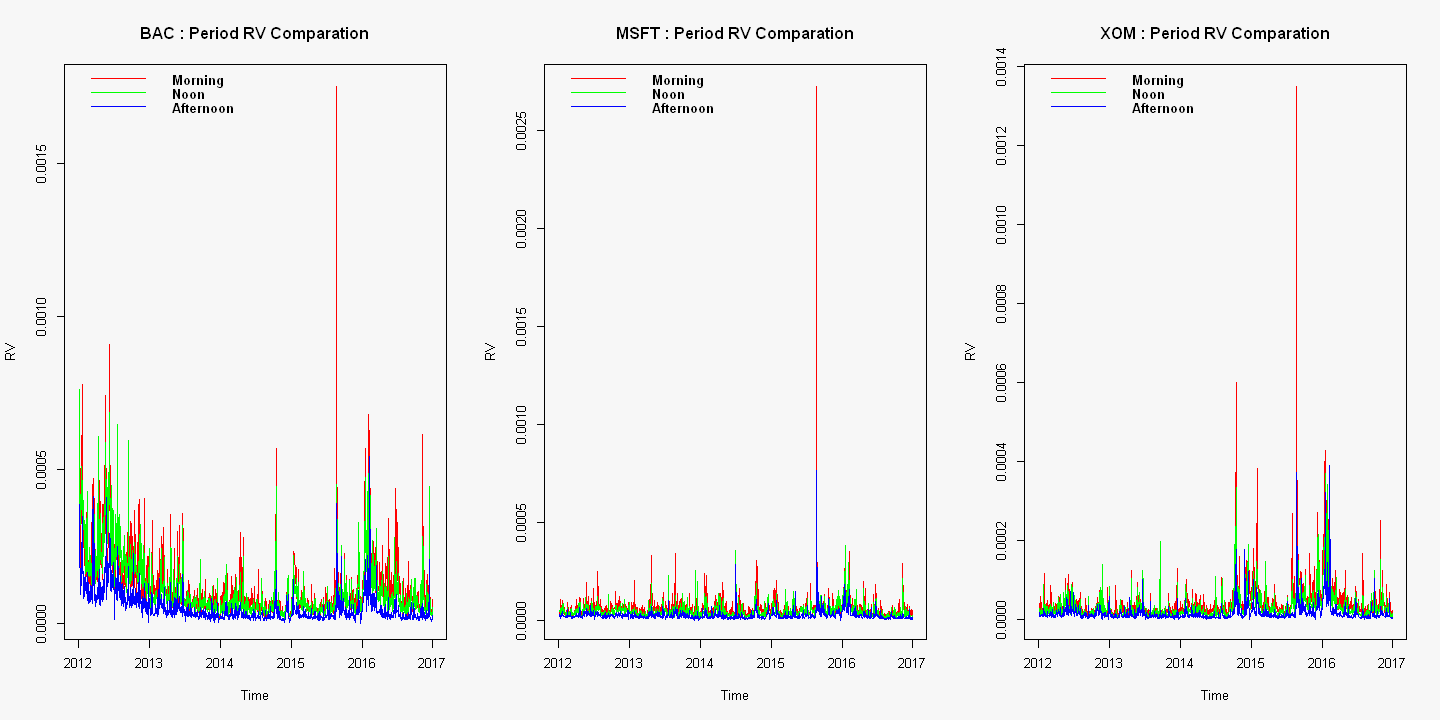

In [33]:
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 3))
par(bg = "#f7f7f7")
c_col3 <- c( 'red', 'green','blue')

for (tick in stock_name){
    plot.zoo(period_1min_RV_p[[tick]][,1], xlab = "Time", ylab = "RV", 
            col = c_col3[1], main=paste(tick,": Period RV Comparation"))
    lines(zoo(period_1min_RV_p[[tick]][,2]), col = c_col3[2], lwd = 1)
    lines(zoo(period_1min_RV_p[[tick]][,3]), col = c_col3[3], lwd = 1)
    legend("topleft", legend = period_name, col = c_col3, lwd = 1, 
           text.font = 2, bty="n")
}

**The results are similar as the RV from return, Morning period has higher maximum RV.**

* <span style='background: lightblue'>**(4) Create sum of intraday RV using price RV**</span>

In [34]:
# Create the column of sum of intraday RV
period_1min_RV_sum_p <- period_1min_RV_p

for (tick in stock_name){    
    period_1min_RV_sum_p[[tick]]$Period.Sum <- rowSums(period_1min_RV_p[[tick]][,
        colnames(period_1min_RV_p[[tick]])])
}
lapply(period_1min_RV_sum_p, head, 3)
lapply(RV_1min_price, head, 3)

$BAC
            BAC.Morning     BAC.Noon BAC.Afternoon   Period.Sum
2012-01-03 0.0002504779 0.0003378509  0.0001874788 0.0007758076
2012-01-04 0.0003000076 0.0005093887  0.0001909224 0.0010003187
2012-01-05 0.0004081624 0.0007620362  0.0003868859 0.0015570845

$MSFT
           MSFT.Morning    MSFT.Noon MSFT.Afternoon   Period.Sum
2012-01-03 3.227133e-05 4.165852e-05   2.465162e-05 9.858147e-05
2012-01-04 4.692697e-05 4.753181e-05   1.681067e-05 1.112694e-04
2012-01-05 3.999007e-05 4.982961e-05   1.988377e-05 1.097034e-04

$XOM
            XOM.Morning     XOM.Noon XOM.Afternoon   Period.Sum
2012-01-03 2.267310e-05 2.743186e-05  1.265906e-05 6.276402e-05
2012-01-04 4.035261e-05 1.816561e-05  7.847123e-06 6.636533e-05
2012-01-05 3.756854e-05 2.763672e-05  1.819045e-05 8.339571e-05


$BAC
           BAC.1_Min_Price_RV
2012-01-03       0.0007787649
2012-01-04       0.0010157490
2012-01-05       0.0015596122

$MSFT
           MSFT.1_Min_Price_RV
2012-01-03        9.872116e-05
2012-01-04        1.114057e-04
2012-01-05        1.098341e-04

$XOM
           XOM.1_Min_Price_RV
2012-01-03       6.303231e-05
2012-01-04       6.647432e-05
2012-01-05       8.461165e-05


* <span style='background: lightblue'>**(5) Plot the difference between daily RV and sum of intraday RV**</span>

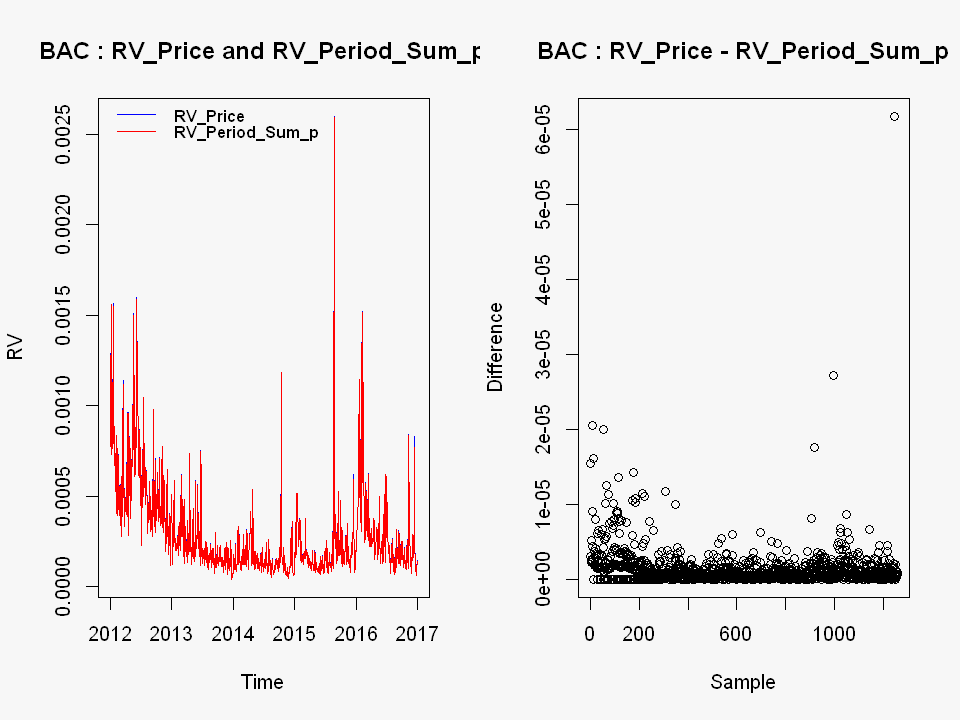

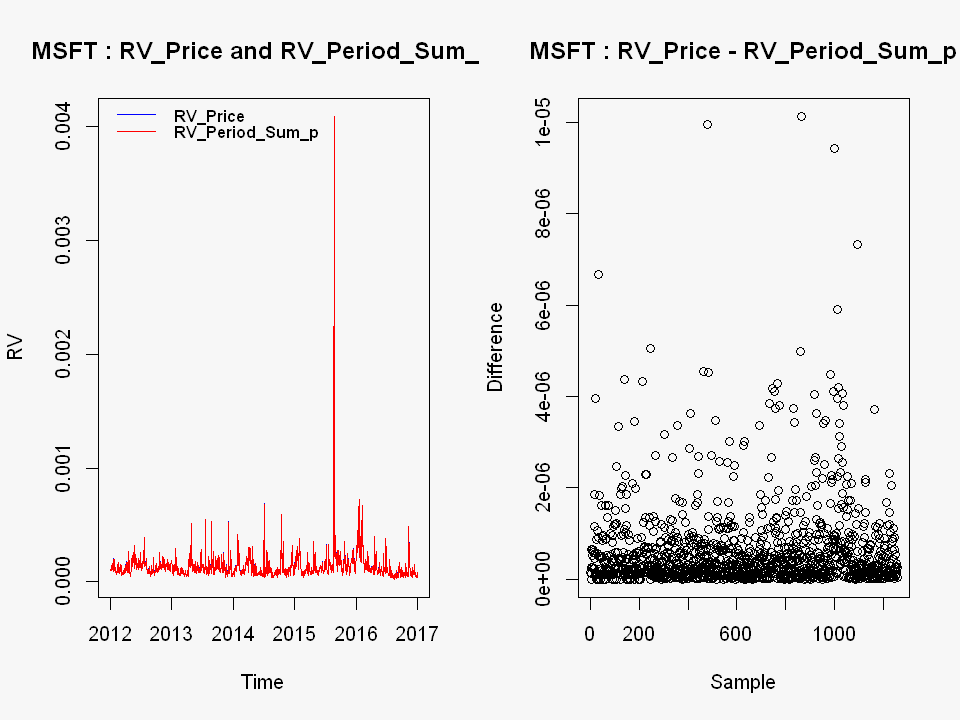

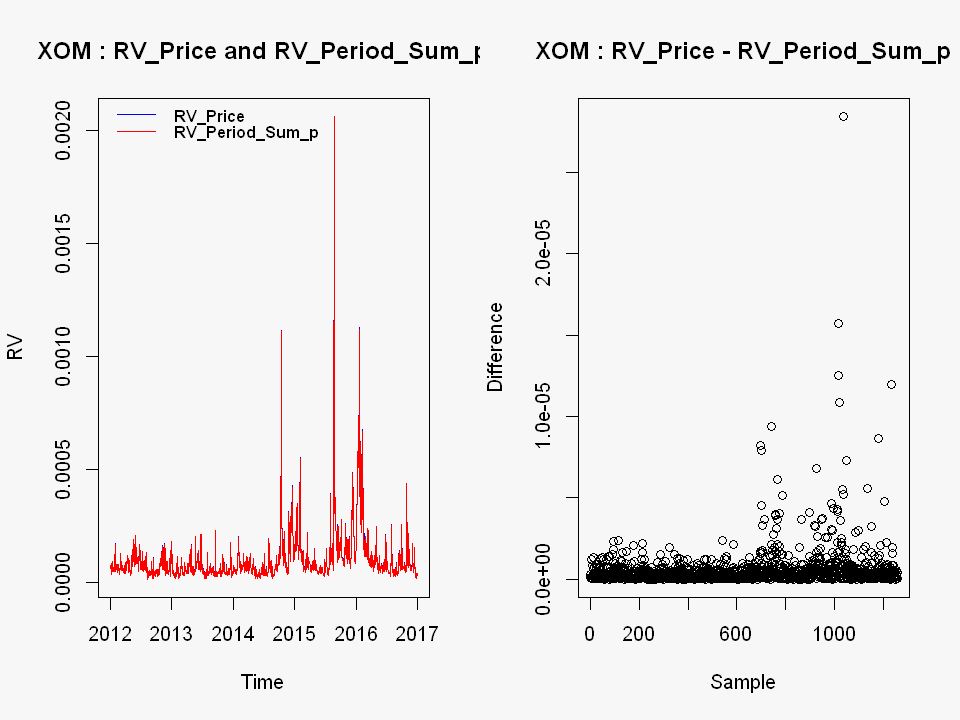

In [35]:
options(repr.plot.width = 8, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 2))

for (tick in stock_name){
    plot.zoo(RV_1min_price[[tick]], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste(tick,": RV_Price and RV_Period_Sum_p"))
    lines(zoo(period_1min_RV_sum_p[[tick]]$Period.Sum), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c( "RV_Price" , "RV_Period_Sum_p"), col = c_col2, 
           lwd = 1, bty="n", text.font = 2, cex = 0.8)    
    # plots seems are exactly same

    # check difference
    
    plot(as.numeric(RV_1min_price[[tick]]) - as.numeric(period_1min_RV_sum_p[[tick]]$Period.Sum),
         xlab = "Sample", ylab= "Difference" , main=paste(tick,": RV_Price - RV_Period_Sum_p"))
    
    
#    plot.zoo(RV_1min_price[[tick]] - period_1min_RV_sum_p[[tick]]$Period.Sum , xlab="Time",
#             ylab = "RV", main=paste(tick,": RV_Price - RV_Period_Sum_p"))
}

**If we zoom in to one month period, the difference actrually could be noticed. We choose August, during which peirod the market is quieter.** 

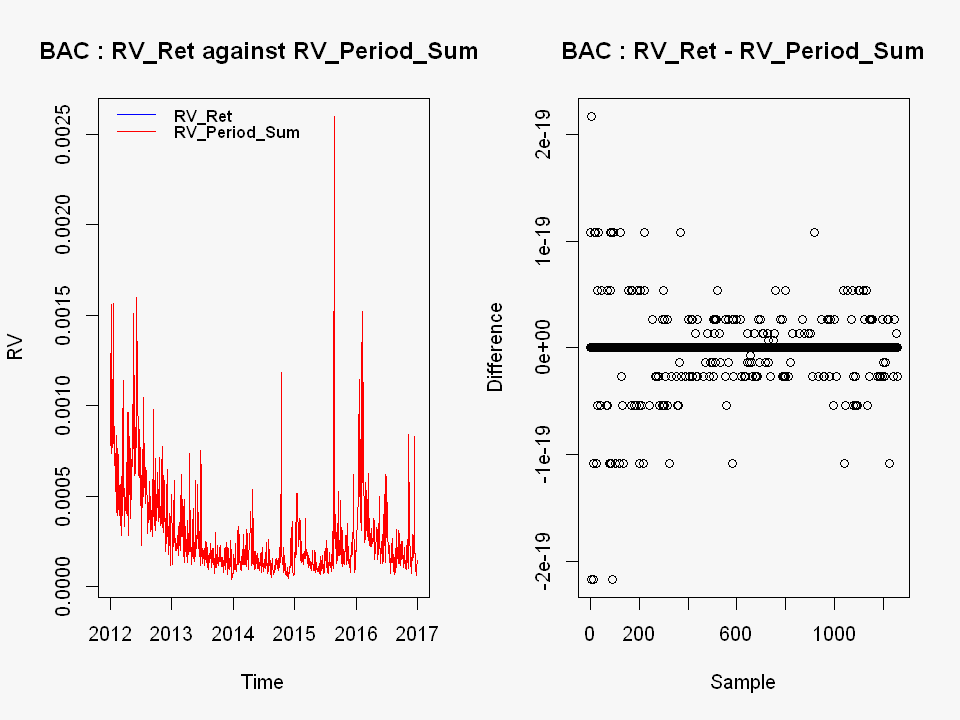

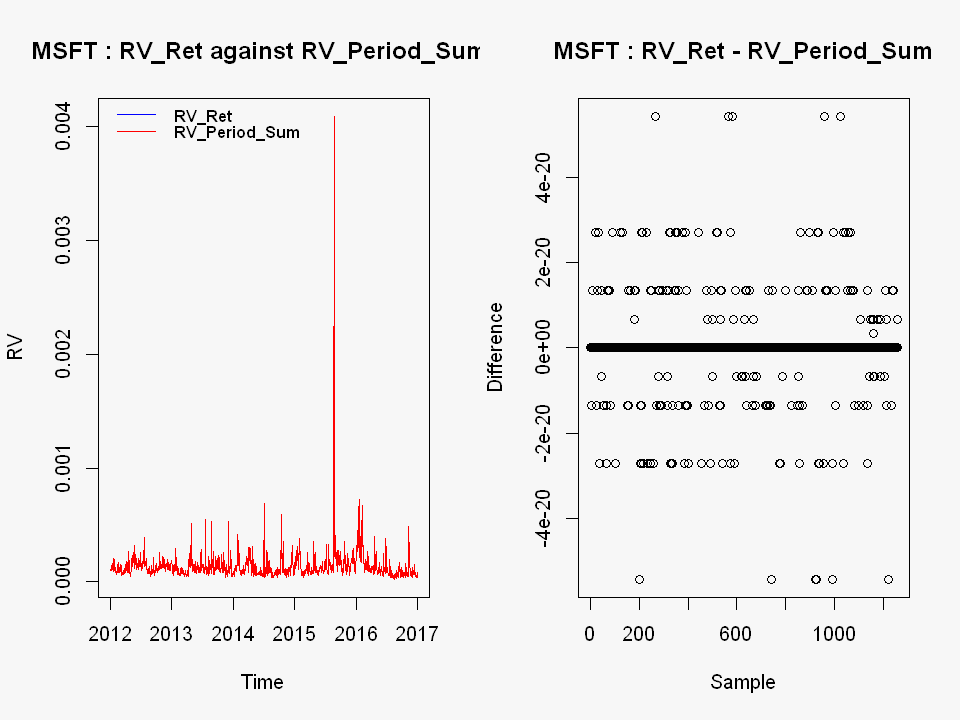

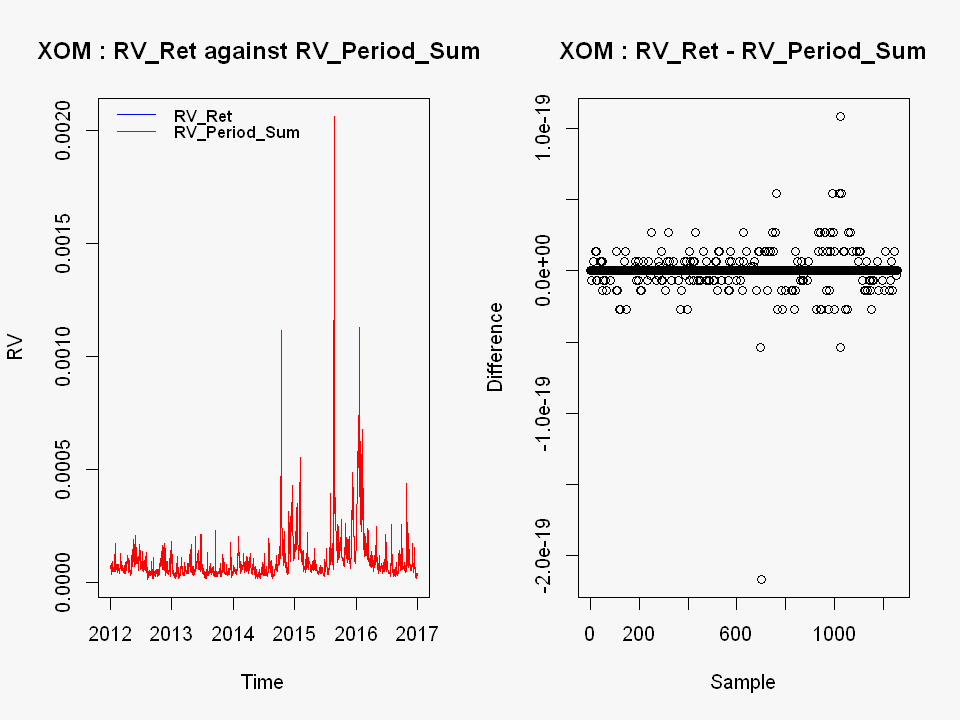

In [36]:
options(repr.plot.width = 8, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 2))

for (tick in stock_name){
    plot.zoo(RV_1min_ret[[tick]], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste(tick,": RV_Ret against RV_Period_Sum "))
    lines(zoo(period_1min_RV_sum[[tick]]$Period.Sum), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c("RV_Ret", "RV_Period_Sum" ), col = c_col2, 
           lwd = 1, bty="n", text.font = 2, cex = 0.8)    

    # check difference
    plot(as.numeric(RV_1min_ret[[tick]]) - as.numeric(period_1min_RV_sum[[tick]]$Period.Sum),
         xlab = "Sample", ylab= "Difference" , main=paste(tick,": RV_Ret - RV_Period_Sum"))    

}

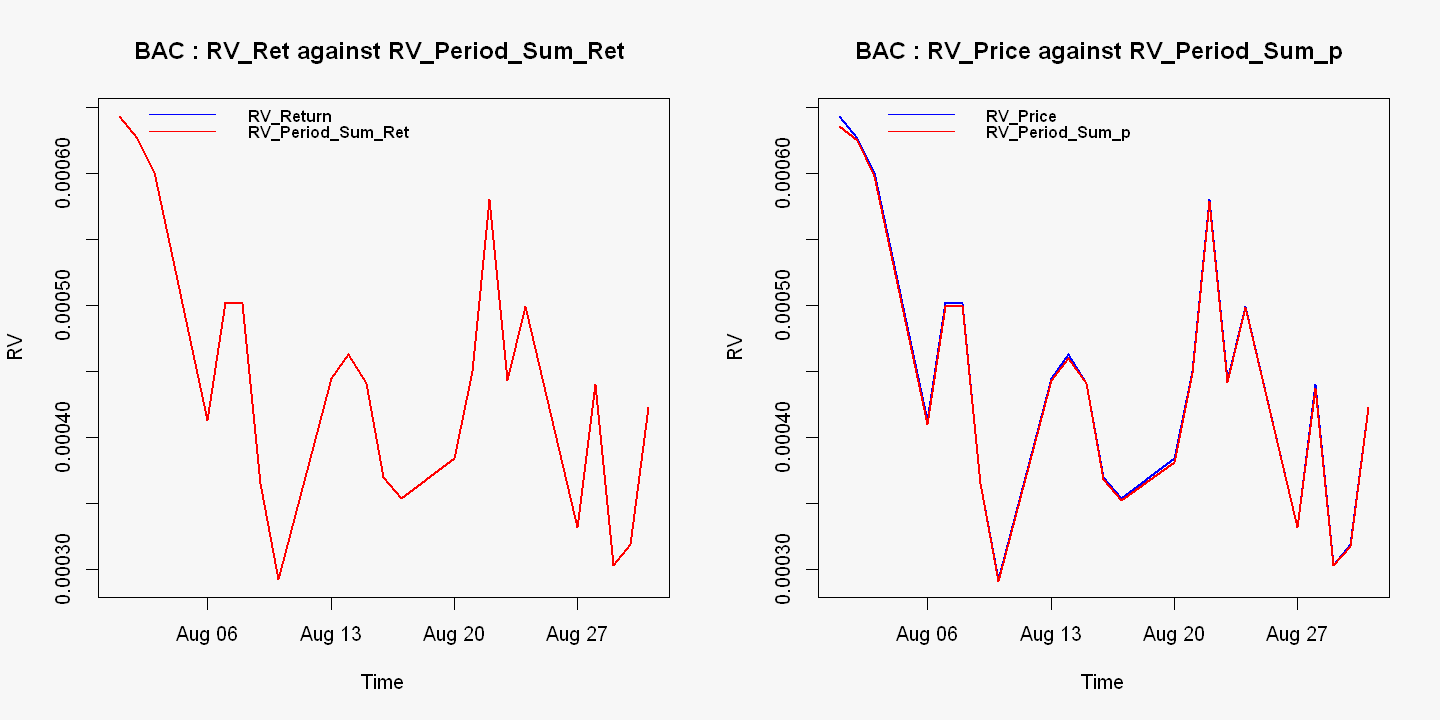

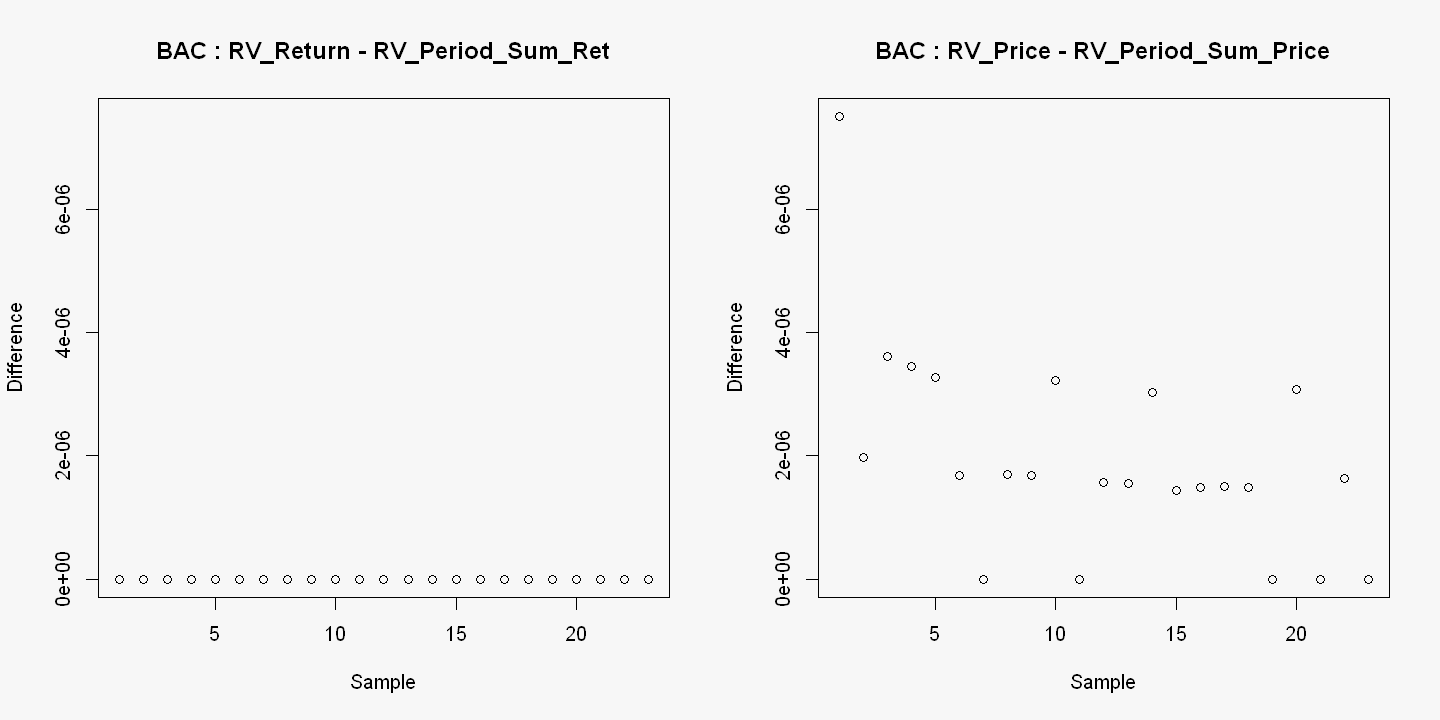

In [37]:
test_tick <- "BAC"
test_date <- "201208"

par(bg = "#f7f7f7")
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 2))
plot.zoo(RV_1min_ret[[test_tick]][test_date], xlab = "Time", ylab = "RV", ,lwd = 2,
    col = c_col2[1], main = paste(test_tick,": RV_Ret against RV_Period_Sum_Ret "))
lines(zoo(period_1min_RV_sum[[test_tick]][test_date]$Period.Sum), col = c_col2[2], lwd = 2)
legend("top", legend = c("RV_Return", "RV_Period_Sum_Ret"), col = c_col2, lwd = 1, 
       bty="n", text.font = 2, cex = 0.8)    

plot.zoo(RV_1min_price[[test_tick]][test_date], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste(test_tick,": RV_Price against RV_Period_Sum_p "), lwd = 2)
lines(zoo(period_1min_RV_sum_p[[test_tick]][test_date]$Period.Sum), col = c_col2[2], lwd = 2)
legend("top", legend = c("RV_Price", "RV_Period_Sum_p"), col = c_col2,lwd = 1, 
       bty="n",, text.font = 2, cex = 0.8)   

# check difference 
ret_diff <- as.numeric(RV_1min_ret[[test_tick]][test_date] - period_1min_RV_sum[[test_tick]][test_date]$Period.Sum)
price_diff <- as.numeric(RV_1min_price[[test_tick]][test_date] - period_1min_RV_sum_p[[test_tick]][test_date]$Period.Sum)
y_scale <- range(c(ret_diff, price_diff))

plot(ret_diff, ylim = y_scale,
    xlab = "Sample", ylab= "Difference" , main=paste(test_tick,": RV_Return - RV_Period_Sum_Ret"))
plot(price_diff, ylim = y_scale,
    xlab = "Sample", ylab= "Difference" , main=paste(test_tick,": RV_Price - RV_Period_Sum_Price"))

* <span style='background: lightblue'>**(6) Comments on the 1-minute price and 1-minute return data source difference, for analyzing daily RV and sum of intraday RV**</span>

 <span style='background: yellow'>**The difference result between using 1 minute returns and 1 minute price, could come from the rCov() function. When call rCov() function to generate Realized Variance with (makeReturns = TRUE), then the first trade in the period is removed, because the function thinks it is overnight return, so in each day two valid intraday returns are removed (one at 11:00 and one at 14:30), so it cause the sum of intraday RV is slightly lower than total daily RV from 1 minute prices.  
The different would be more noticeable for stocks less liquid, or during quiet market period. When the daily trading volumns are lower, removing two observations due to subsampling would have bigger effects.**</span>

* <span style='background: lightblue'>**(7) Calculate and plot the percentage share of individual intraday RV on total daily RV by 1 minute prices**</span>

In [38]:
# Create the percentage of intraday RV
period_1min_RV_percent_p <- period_1min_RV_p
P <- length(colnames(period_1min_RV_p[[1]]))

# for easier compare, we *100 to percentage numbers
for (tick in stock_name){    
    for (i in 1: P){
        period_1min_RV_percent_p[[tick]][,i] <- period_1min_RV_sum_p[[tick]][,
            i]/period_1min_RV_sum_p[[tick]][,4] * 100
    } 
}

lapply(period_1min_RV_percent_p, head, 3)

$BAC
           BAC.Morning BAC.Noon BAC.Afternoon
2012-01-03    32.28608 43.54828      24.16563
2012-01-04    29.99120 50.92264      19.08615
2012-01-05    26.21325 48.93994      24.84682

$MSFT
           MSFT.Morning MSFT.Noon MSFT.Afternoon
2012-01-03     32.73570  42.25796       25.00634
2012-01-04     42.17417  42.71775       15.10807
2012-01-05     36.45288  45.42210       18.12502

$XOM
           XOM.Morning XOM.Noon XOM.Afternoon
2012-01-03    36.12436 43.70634      20.16929
2012-01-04    60.80374 27.37213      11.82413
2012-01-05    45.04853 33.13926      21.81221


**Check the statistics:  
From three stocks, the percentage mean of morning, noon and afternoon period are 45%, 37% and 18% respectively.**

In [39]:
as.data.frame(describe(period_1min_RV_percent_p[[1]]))
as.data.frame(describe(period_1min_RV_percent_p[[2]]))
as.data.frame(describe(period_1min_RV_percent_p[[3]]))


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BAC.Morning,1,1258,43.58212,9.787492,43.88593,43.62917,9.969381,10.17565,73.48514,63.30949,-0.0530247,-0.1081893,0.2759504
BAC.Noon,2,1258,39.27290,7.535744,39.06640,39.10223,7.256714,17.41547,70.20926,52.79379,0.2183271,0.1593178,0.2124642
BAC.Afternoon,3,1258,17.14497,5.912167,16.48591,16.69945,5.228006,0.00000,58.95406,58.95406,1.1886461,3.9278374,0.1666888


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MSFT.Morning,1,1258,46.09430,10.828231,45.95046,46.19099,11.054604,6.661947,76.25600,69.59405,-0.1151058,-0.02461011,0.3052932
MSFT.Noon,2,1258,36.10776,8.452140,35.46730,35.83092,8.119524,14.547645,76.56827,62.02063,0.6004481,1.46404327,0.2383013
MSFT.Afternoon,3,1258,17.79794,6.704682,16.96552,17.34439,6.021166,0.000000,58.64178,58.64178,0.9770169,2.71843916,0.1890331


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
XOM.Morning,1,1258,46.51929,10.933421,46.86195,46.83613,10.514801,4.886597,77.38583,72.49923,-0.3135466,0.2435562,0.3082590
XOM.Noon,2,1258,35.62643,8.619191,34.85256,35.23079,7.643179,11.109673,91.59785,80.48818,0.9405568,3.3923790,0.2430112
XOM.Afternoon,3,1258,17.85428,7.359018,16.61876,17.11957,6.372227,0.000000,63.90448,63.90448,1.3674006,4.0291945,0.2074816


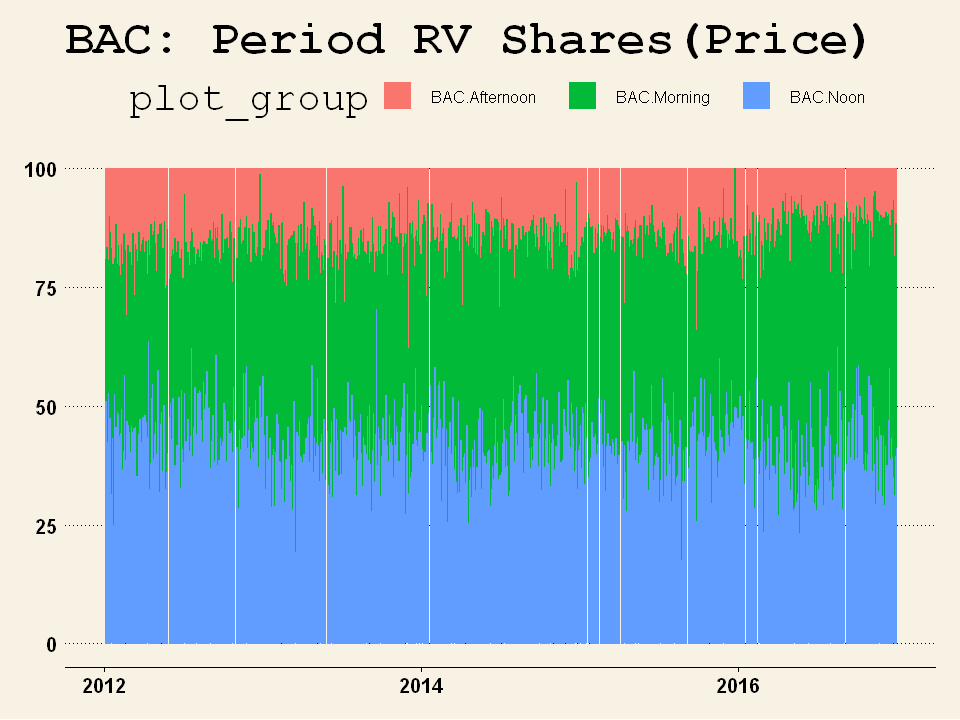

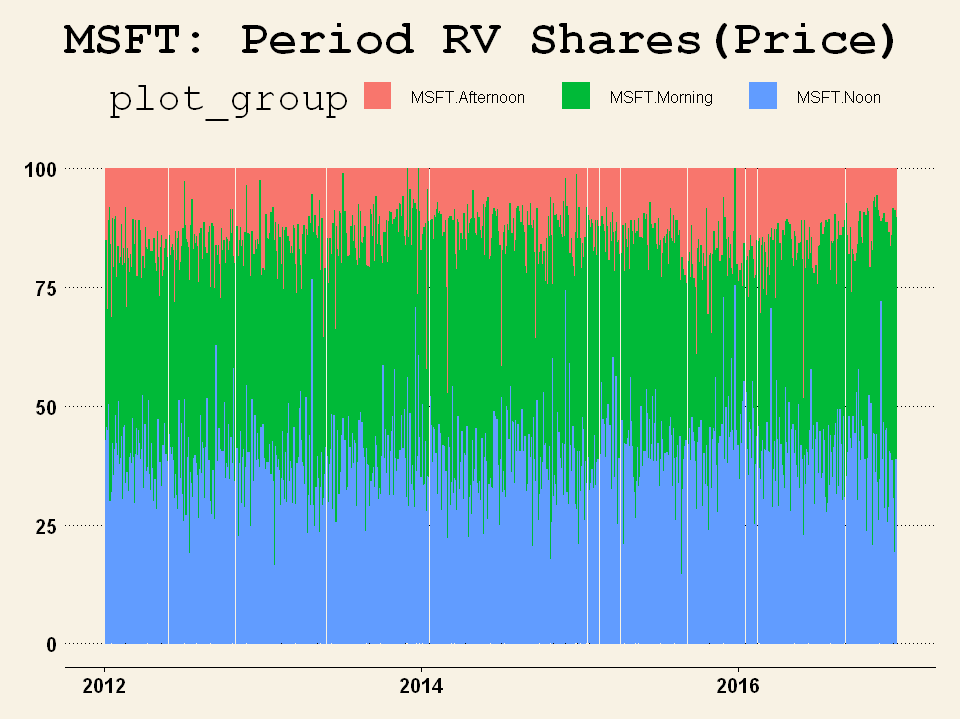

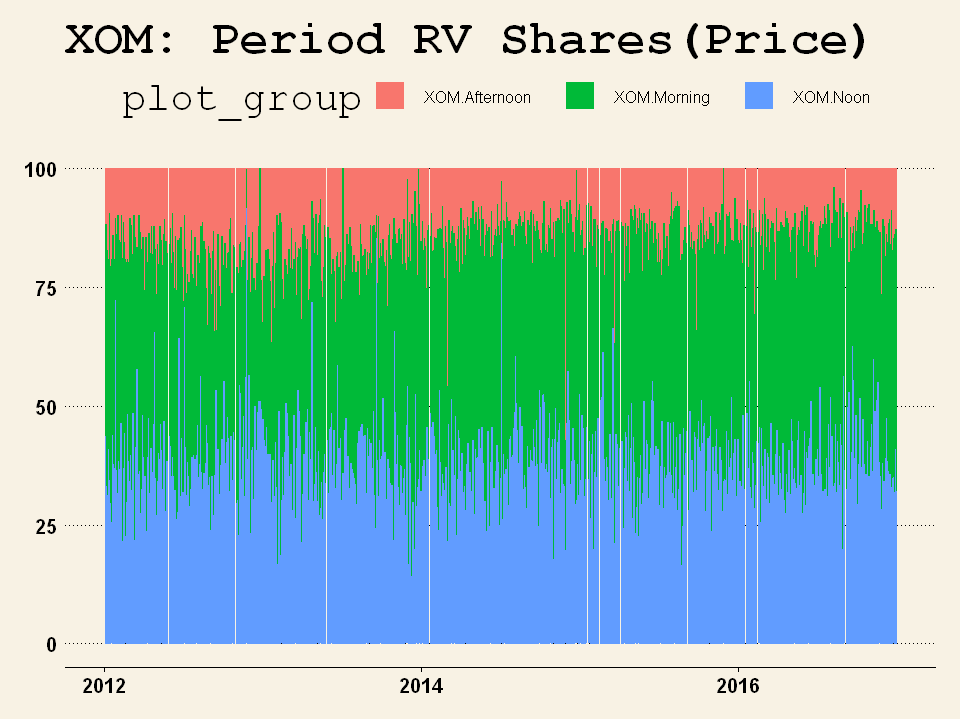

In [40]:
library(ggfortify)
options(repr.plot.width = 8, repr.plot.height = 6)
autoplot(period_1min_RV_percent_p[["BAC"]], ts.geom = 'bar', facets = FALSE, stacked = TRUE) +  
    theme_wsj()+  ggtitle("BAC: Period RV Shares(Price)")
autoplot(period_1min_RV_percent_p[["MSFT"]], ts.geom = 'bar', facets = FALSE, stacked = TRUE) +  
    theme_wsj()+  ggtitle("MSFT: Period RV Shares(Price)")
autoplot(period_1min_RV_percent_p[["XOM"]], ts.geom = 'bar', facets = FALSE, stacked = TRUE) +  
    theme_wsj()+  ggtitle("XOM: Period RV Shares(Price)")


### 9. Using 1 minute prices, compute the Bipower Variation and MedRV estimators, and compare your results to RV

* <span style='background: lightblue'>**(1) Compute Bipower Variation estimators**</span>

**Obtain the estimate of BPV by highfrequency package rBPCov() with 1 minute prices(makeReturns = TRUE)**

In [41]:
# use Realized BiPower Covariance function, makeReturns = TRUE
BPV_1min <- list()
for (tick in stock_name){
    BPV_1min[[tick]] <- rBPCov(rData = price_1min[[tick]], makeReturns = TRUE)
    # put xts index as date, instead of minute
    index(BPV_1min[[tick]]) <- v_date
    # put column name
    colnames(BPV_1min[[tick]]) <- paste0(tick,".1_Min_BPV")    
}
# put list key as tickers
names(BPV_1min) <- stock_name

lapply(BPV_1min, head, 2)

$BAC
           BAC.1_Min_BPV
2012-01-03  0.0005971198
2012-01-04  0.0009251265

$MSFT
           MSFT.1_Min_BPV
2012-01-03   7.212018e-05
2012-01-04   1.008147e-04

$XOM
           XOM.1_Min_BPV
2012-01-03  6.092355e-05
2012-01-04  5.232527e-05


**Compare RV with BPV, we could see some difference -- Jumps.**

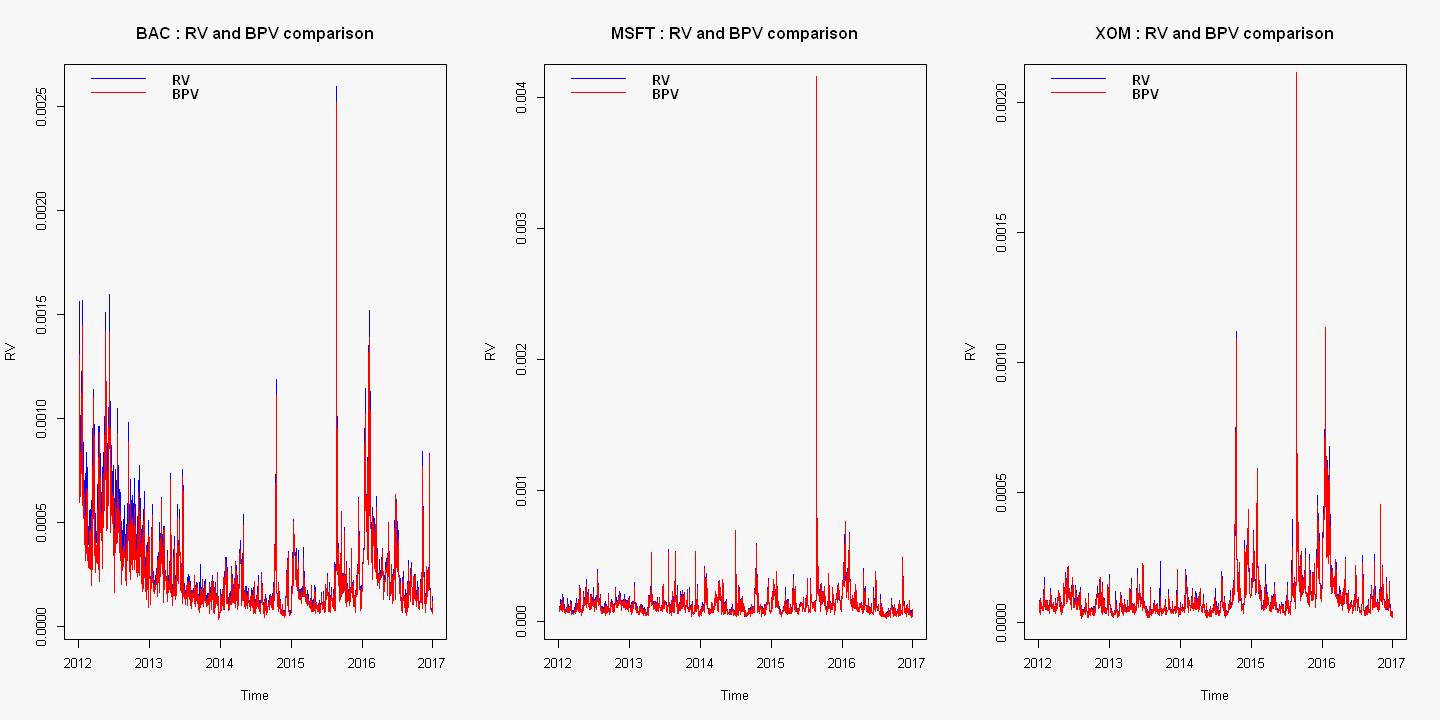

In [42]:
options(repr.plot.width = 12, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 3))
for (tick in stock_name){
    plot.zoo(RV_1min_price[[tick]], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste(tick,": RV and BPV comparison"))
    lines(zoo(BPV_1min[[tick]]), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c("RV", "BPV"), col = c_col2, 
           lwd = 1, bty="n", text.font = 2, cex = 1)    

}

* <span style='background: lightblue'>**(2) Compute MedRV Variation estimators**</span>

In [43]:
# use rMedRVar function, makeReturns = TRUE
medRV_1min <- list()
for (tick in stock_name){
    medRV_1min[[tick]] <- rMedRVar(rData = price_1min[[tick]], makeReturns = TRUE)
    # put xts index as date, instead of minute
    index(medRV_1min[[tick]]) <- v_date
    # put column name
    colnames(medRV_1min[[tick]]) <- paste0(tick,".1_Min_medRV")    
}
# put list key as tickers
names(medRV_1min) <- stock_name

lapply(medRV_1min, head, 2)

$BAC
           BAC.1_Min_medRV
2012-01-03    0.0009079634
2012-01-04    0.0010902850

$MSFT
           MSFT.1_Min_medRV
2012-01-03     8.843371e-05
2012-01-04     1.073765e-04

$XOM
           XOM.1_Min_medRV
2012-01-03    5.823839e-05
2012-01-04    4.802492e-05


**Compare RV and medRV.**

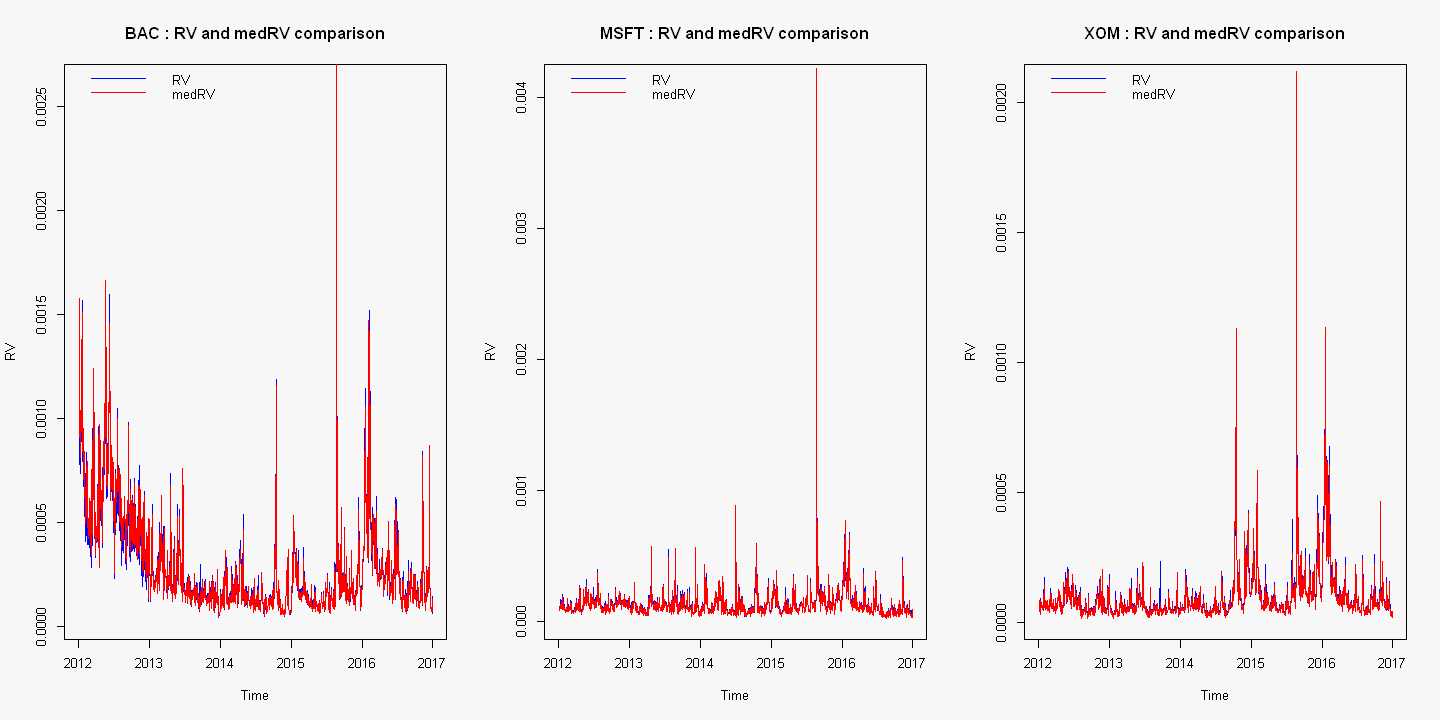

In [44]:
options(repr.plot.width = 12, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 3))
for (tick in stock_name){
    plot.zoo(RV_1min_price[[tick]], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste(tick,": RV and medRV comparison"))
    lines(zoo(medRV_1min[[tick]]), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c("RV", "medRV"), col = c_col2, 
           lwd = 1, bty="n", cex = 1)    

}

**We could also notice the difference between RV and medRV - - jumps.**

* <span style='background: lightblue'>**(3) Jumps for BPV**</span>

**Estimate jumps as the difference between RV and BPV**

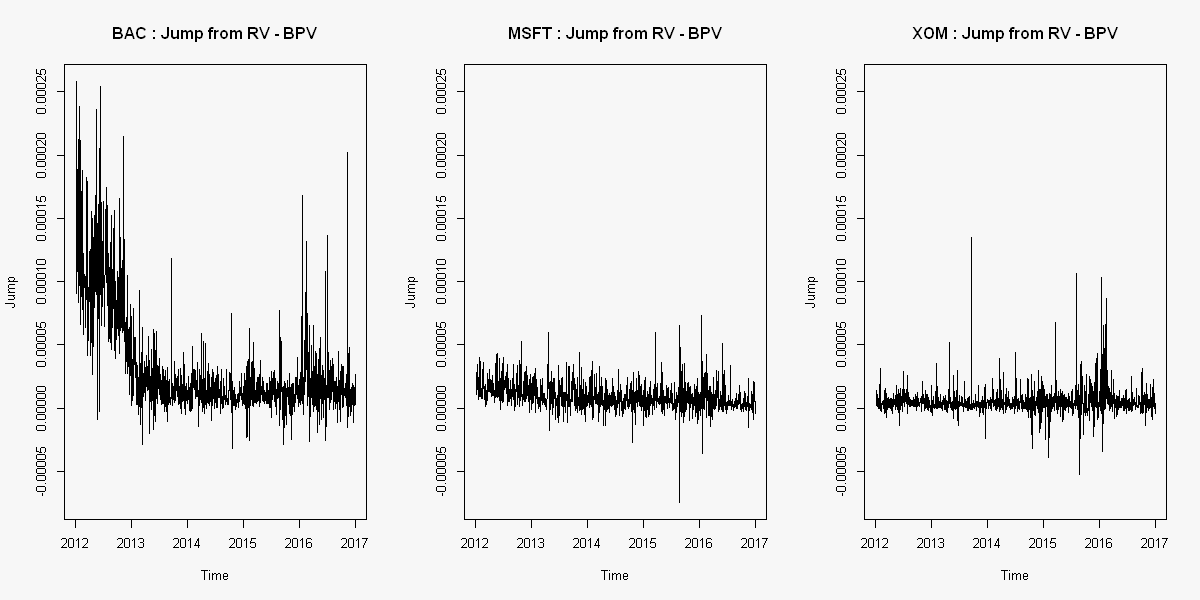

In [45]:

j_1min_diff <- list()
for (tick in stock_name){
    j_1min_diff[[tick]] <- RV_1min_price[[tick]] - BPV_1min[[tick]] 
}

par(bg = "#f7f7f7")
options(repr.plot.width = 10, repr.plot.height = 5)
par(mfrow = c(1, 3))
y_scale <- range(c(j_1min_diff[[1]], j_1min_diff[[2]],j_1min_diff[[3]]))

for (tick in stock_name){
    plot.zoo(j_1min_diff[[tick]], xlab = "Time", ylab = "Jump", 
        main = paste(tick,": Jump from RV - BPV"),ylim = y_scale) 
}

* <span style='background: lightblue'>**(4) Jumps for medRV**</span>

**Estimate jumps as the difference between RV and medPV**

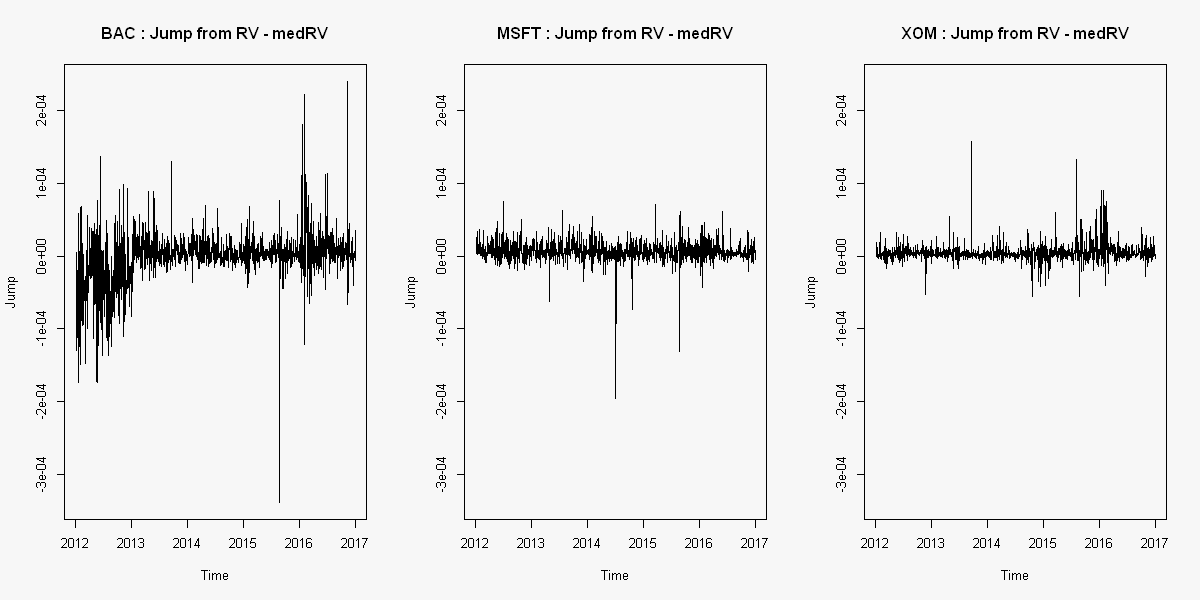

In [46]:
j_1min_diff_medRV <- list()
for (tick in stock_name){
    j_1min_diff_medRV[[tick]] <- RV_1min_price[[tick]] - medRV_1min[[tick]]
}

#options(repr.plot.width = 8, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 3))
y_scale <- range(c(j_1min_diff_medRV[[1]], j_1min_diff_medRV[[2]],
    j_1min_diff_medRV[[3]]))

for (tick in stock_name){
    plot.zoo(j_1min_diff_medRV[[tick]], xlab = "Time", ylab = "Jump", 
        main = paste(tick,": Jump from RV - medRV"), ylim = y_scale) 
}

**Now only estimated jumps simply as the difference between RV and BPV, and difference between RV and medRV.  
Next, we will distinguish "true" jumps from deviations caused by sampling noise.**

* <span style='background: lightblue'>**(5) Test for jumps using BNSjumpTest**</span>

In [47]:
# use BNSjumpTest function, makeReturns = TRUE
j_1min_test <- list()
for (tick in stock_name){
    j_1min_test[[tick]] <- BNSjumpTest(price_1min[[tick]], 
        IVestimator = "BV", IQestimator = "TP",  makeReturns = TRUE)
}


# check the p-value if greater than 0.05 
day_len <- length(j_1min_test[[1]]$p.value)
for (tick in stock_name){
    I_HF <- sapply(1:day_len, function (j) {
        if (j_1min_test[[tick]][j,"p.value"] < 0.05){1}
        else {0}
    })
    print(paste(tick,": significant jumps", sum(I_HF), "from ", day_len))    
}


[1] "BAC : significant jumps 667 from  1258"
[1] "MSFT : significant jumps 476 from  1258"
[1] "XOM : significant jumps 353 from  1258"


**From 1258 jumps, BAC, MSFT and XOM have 667, 476 and 353 "real" jumps respectively.**

### 10. Calculate daily returns and find the appropriate ARMA-GARCH model. Compare the conditional volatility from ARMA-GARCH model with Realized Volatility($\sqrt{RV}$) and comment the results.

* <span style='background: lightblue'>**(1) Calculate daily returns of 1 minute prices**</span>

In [48]:
# use dailyReturn function to calculate daily log returns
daily_rets_1 <- list()
for (tick in stock_name){
    daily_rets_1[[tick]] <- dailyReturn(price_1min[[tick]], type='log')
    # put xts index as date, instead of minute
    index(daily_rets_1[[tick]]) <- v_date
    # put column name
    colnames(daily_rets_1[[tick]]) <- paste0(tick,".1_Min_Day_Ret")    
}
# put list key as tickers
names(daily_rets_1) <- stock_name
lapply(daily_rets_1, head, 2)

[1] 1258

$BAC
[1] 1258

$MSFT
[1] 1258

$XOM
[1] 1258

$BAC
           BAC.1_Min_Day_Ret
2012-01-03       0.010378700
2012-01-04       0.003435767

$MSFT
           MSFT.1_Min_Day_Ret
2012-01-03         0.01426685
2012-01-04         0.02065448

$XOM
           XOM.1_Min_Day_Ret
2012-01-03      -0.001046737
2012-01-04       0.001279037


* <span style='background: lightblue'>**(2) Find appropriate ARMA-GARCH model**</span>

**First, observe the shape of return data**

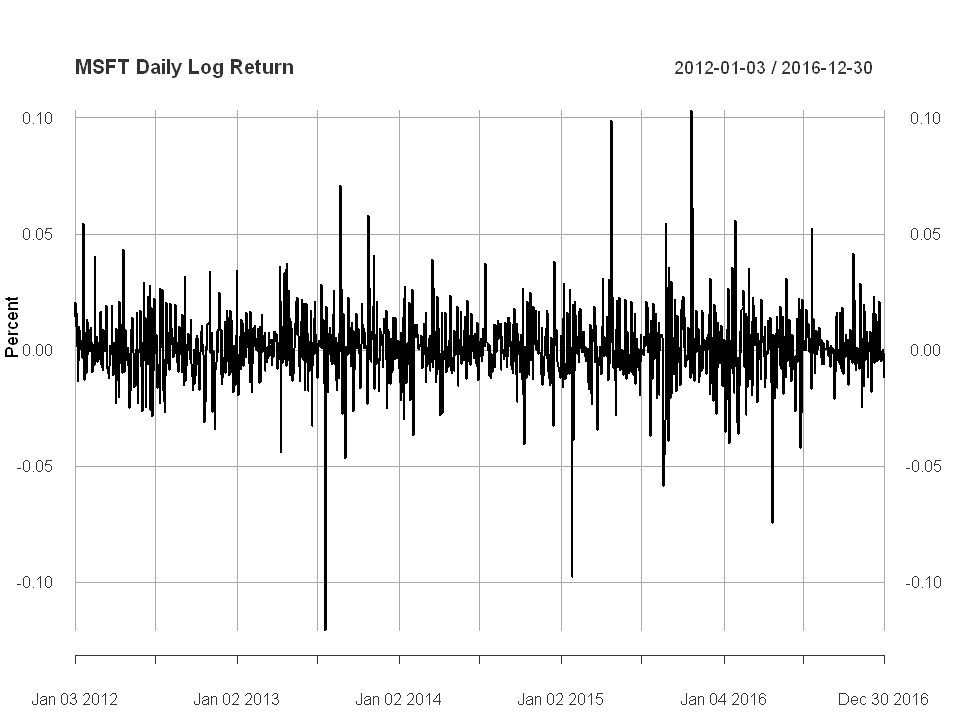

In [49]:
lrets_xts <- daily_rets_1[["MSFT"]]
options(repr.plot.width = 8, repr.plot.height = 6)
plot(lrets_xts,  xlab = 'Year', ylab = 'Percent', main = 'MSFT Daily Log Return', 
     axes = F, cex.main = 0.8)

**Call ARIMA function for estimation**

In [50]:
lrets_auto <- auto.arima(lrets_xts, max.d = 0)
lrets_auto

Series: lrets_xts 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1      ma2   mean
      0.7725  -0.7645  -0.0539  8e-04
s.e.  0.0957   0.0983   0.0292  3e-04

sigma^2 = 0.0002148:  log likelihood = 3529.32
AIC=-7048.64   AICc=-7048.59   BIC=-7022.95

**By referencing auto.arima result, select GARCH(1,2) model for generating conditional volatility.**

In [51]:
# simulate GARCH(1,2) 
garchspecm1 <- ugarchspec(variance.model=list(model = "sGARCH", garchOrder = c(1, 2)),
    mean.model = list(armaOrder=c(0, 0), include.mean=TRUE, archm = TRUE, archpow = 1))
                         
garchvolm1 <- ugarchfit(garchspecm1, lrets_xts)

# use ugarchfit function to generate conditional volatility from daily log returns
garchvol_1 <- list()
for (tick in stock_name){
    garchvol <- ugarchfit(garchspecm1, daily_rets_1[[tick]])    
    garchvol_1[[tick]] <- garchvol
}
# put list key as tickers
names(garchvol_1) <- stock_name

* <span style='background: lightblue'>**(3) Create Realized Volatility($\sqrt{RV}$)**</span>

**We create the  square root of Heterogeneous Autoregressive Model by HARmodel function  
HAR model has form:**

$$\sqrt{RV_t} = \alpha + \beta_1 \sqrt{RV_{t-1}} + \beta_2 \sqrt{RV_{t-1}^{(5)}} + \beta_3 \sqrt{RV_{t-1}^{(22)}} + u_t,$$



In [83]:
# call HARmodel function with 1 minute prices RV data
HAR_1min <- list()
for (tick in stock_name){
    HAR_1min[[tick]] <- HARmodel(data = RV_1min_price[[tick]] , periods = c(1,5,22), RVest = c("rCov"),
        type = "HAR", h = 1, transform = "sqrt", inputType = "RM")   
}
# put list key as tickers
names(HAR_1min) <- stock_name

summary(HAR_1min[["BAC"]])


Call:
"sqrt(RV1) = beta0  +  beta1 * sqrt(RV1) +  beta2 * sqrt(RV5) +  beta3 * sqrt(RV22)"

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009557 -0.001790 -0.000391  0.001320  0.033370 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 0.0008912  0.0003402   2.620 0.008903 ** 
beta1 0.5026192  0.0381715  13.167  < 2e-16 ***
beta2 0.1881682  0.0536123   3.510 0.000465 ***
beta3 0.2420794  0.0364621   6.639 4.72e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003112 on 1232 degrees of freedom
Multiple R-squared:  0.7013,	Adjusted R-squared:  0.7005 
F-statistic:   964 on 3 and 1232 DF,  p-value: < 2.2e-16


**From the summary of HAR model, beta1 is 0.5 which is quite significant, and R-squared at 0.7 which means explained the sample data quite well.**

* <span style='background: lightblue'>**(4) Compare the conditional volatility from ARMA-GARCH model with Realized Volatility**</span>

**Because HAR model is generated with monthly data $RV_{t-1}^{(22)}$, so in plot we start the comparison from element 23.**

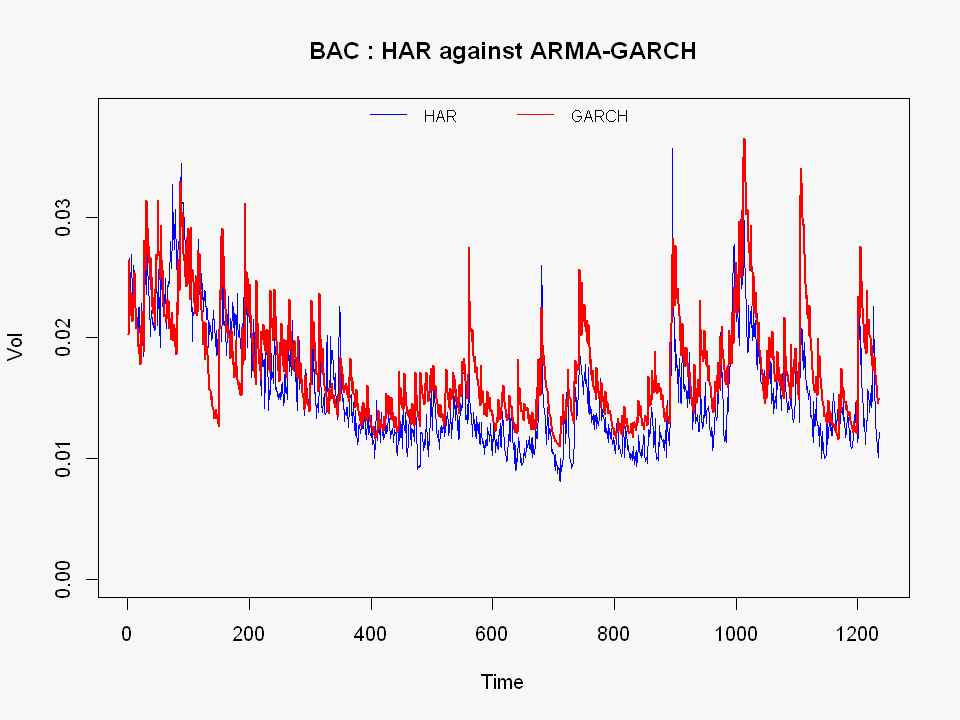

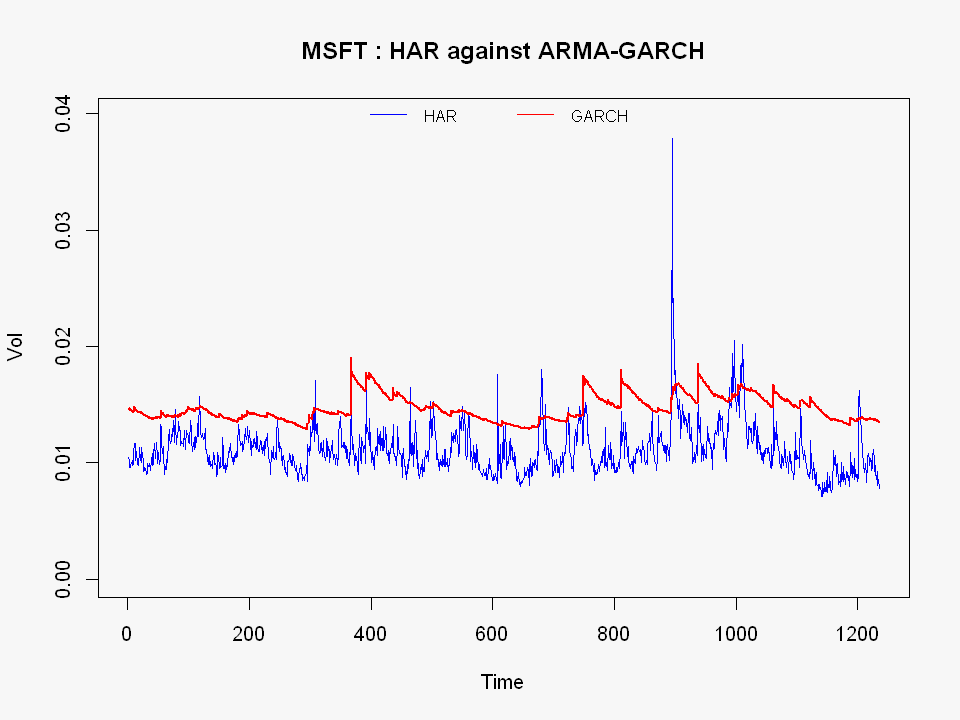

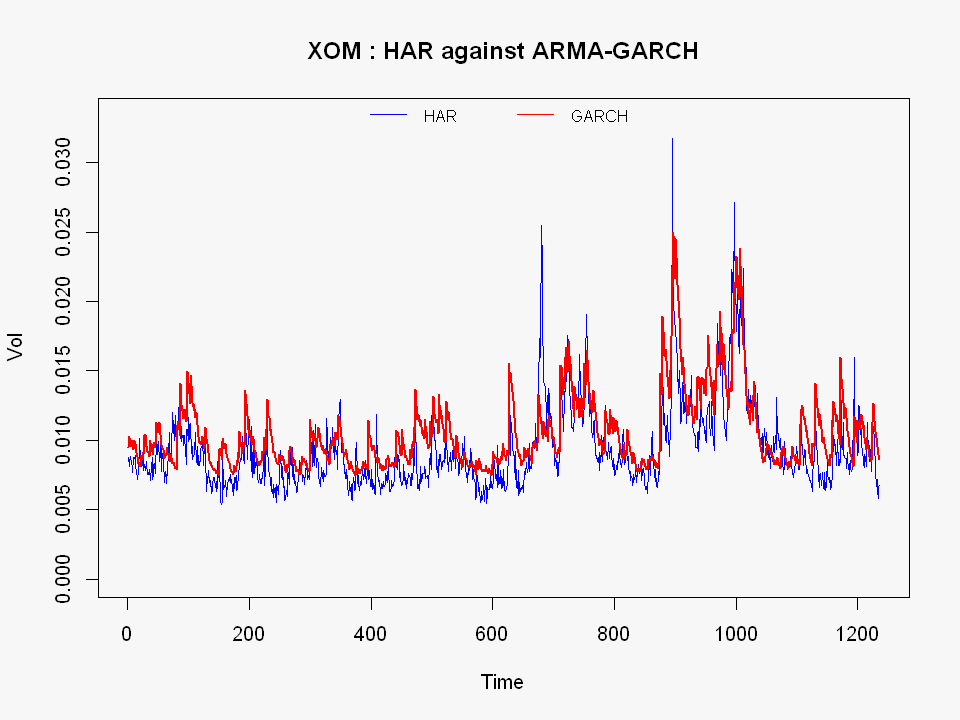

In [53]:
par(bg = "#f7f7f7")
options(repr.plot.width = 8, repr.plot.height = 6)
for (tick in stock_name){
    plot.zoo(HAR_1min[[tick]]$fitted.values, xlab = "Time", ylab = "Vol", 
        col = c_col2[1], main = paste(tick,": HAR against ARMA-GARCH"),
        ylim = c(0, 1.05 * max(max(HAR_1min[[tick]]$fitted.values), 
        max(garchvol_1[[tick]]@fit$sigma))))
    lines(zoo(garchvol_1[[tick]]@fit$sigma[23:day_len]), col = c_col2[2], lwd = 2)
    legend("top", ncol = 2, legend = c("HAR", "GARCH"), col = c_col2, 
           lwd = 1, bty="n", cex = 0.8)    

}

* <span style='background: lightblue'>**(4) Comments**</span>

 <span style='background: yellow'>**From the comparition of plost above, we could notice that ARMA-GARCH is difficult to catch data of Jumps. Becuase GARCH model only collects data of returns, but does not include the volatility of recent trading process. While HAR as a High-frequency model, only focus on Realized volatility, but does not includes returns.**</span>

# Problem 2

### (A) For all three stocks convert the 1-minute prices to the 5-minute frequency and repeat the analysis from Problem 1.

* <span style='background: lightblue'>**(1) Realized Variance calculated from 5-minute prices**</span>

**Method 1: Generate 5-minute price from aggregateTS function, then create 5-minute RV from rCov function.**

In [54]:
# 5-minute price from aggregateTS
price_5min <- list()
# 5-minute RV from rCov
price_1min_v1 <- list()
for (tick in stock_name){

    # re-index the data, align the data by minutes
    price_1min_v1[[tick]] <- price_1min[[tick]]
    index(price_1min_v1[[tick]])<-index(price_1min[[tick]])-1
    # aggreate data by 5 minutes, drop NA 
    price_5min[[tick]] <- aggregateTS(price_1min_v1[[tick]], 
        alignBy = "minutes", alignPeriod = 5, dropna = TRUE)
    colnames(price_5min[[tick]]) <- paste0(tick,".5_Min_Price")  
}

print("1-minute prices length:")
lapply(price_1min, length)
print("5-minute prices length:")
lapply(price_5min, length)
lapply(price_5min, head, 3)
lapply(price_5min, tail, 3)

[1] "1-minute prices length:"


$BAC
[1] 489171

$MSFT
[1] 488555

$XOM
[1] 488666

[1] "5-minute prices length:"


$BAC
[1] 99261

$MSFT
[1] 99090

$XOM
[1] 99085

$BAC
                    BAC.5_Min_Price
2012-01-03 09:30:00          5.3773
2012-01-03 09:35:00          5.4334
2012-01-03 09:40:00          5.4334

$MSFT
                    MSFT.5_Min_Price
2012-01-03 09:30:00          22.2352
2012-01-03 09:35:00          22.2689
2012-01-03 09:40:00          22.2857

$XOM
                    XOM.5_Min_Price
2012-01-03 09:30:00         69.2991
2012-01-03 09:35:00         69.3554
2012-01-03 09:40:00         69.5327


$BAC
                    BAC.5_Min_Price
2016-12-30 15:50:00         21.5773
2016-12-30 15:55:00         21.6115
2016-12-30 16:00:00         21.6310

$MSFT
                    MSFT.5_Min_Price
2016-12-30 15:50:00          59.9630
2016-12-30 15:55:00          60.0016
2016-12-30 16:00:00          60.0161

$XOM
                    XOM.5_Min_Price
2016-12-30 15:50:00         84.2238
2016-12-30 15:55:00         84.2519
2016-12-30 16:00:00         84.3453


**Check the sampled observations per trading session m**

In [55]:
test_tick <- "BAC"
test_date <- "20120103"

print(paste("1-minute sampled observations per session:",
            length(price_1min[[test_tick]][test_date])))
print(paste("5-minute sampled observations per session:",
            length(price_5min[[test_tick]][test_date])))

[1] "1-minute sampled observations per session: 390"
[1] "5-minute sampled observations per session: 79"


**Call rCov to calculate 5-minute RV.**

In [56]:
# 5-minute RV from rCov
RV_5min_agg <- list()
for (tick in stock_name){    
    # calculate Realized Variance
    RV_5min_agg[[tick]] <- rCov(rData = price_5min[[tick]], 
        makeReturns = TRUE)
    # put xts index as date, instead of minute
    index(RV_5min_agg[[tick]]) <- v_date
    # put column name
    colnames(RV_5min_agg[[tick]]) <- paste0(tick,".5_Min_RV_agg")    
}
# put list key as tickers
names(RV_5min_agg) <- stock_name

# check data length
#lapply(RV_5min_agg, length)
# 5 years intraday return data, about 250 * 5 trading days 1258 days
lapply(RV_5min_agg, head, 3)

$BAC
           BAC.5_Min_RV_agg
2012-01-03     0.0005604533
2012-01-04     0.0004641003
2012-01-05     0.0013257068

$MSFT
           MSFT.5_Min_RV_agg
2012-01-03      8.451951e-05
2012-01-04      1.360680e-04
2012-01-05      8.393390e-05

$XOM
           XOM.5_Min_RV_agg
2012-01-03     8.216066e-05
2012-01-04     7.005603e-05
2012-01-05     7.848873e-05


**Method 2: Create 5-minute RV directly from 1-minute price by setting alignPeriod parameters in rCov function.**

In [57]:
# makeReturns = TRUE
RV_5min <- list()
for (tick in stock_name){
    # calculate Realized Variance
    RV_5min[[tick]] <- rCov(rData = price_1min[[tick]], makeReturns = TRUE,
        alignBy = "mins",alignPeriod = 5)
    # put xts index as date, instead of minute
    index(RV_5min[[tick]]) <- v_date
    # put column name
    colnames(RV_5min[[tick]]) <- paste0(tick,".5_Min_RV")    
}
# put list key as tickers
names(RV_5min) <- stock_name

# check data length
#lapply(RV_5min, length)
# 5 years intraday return data, about 250 * 5 trading days 1258 days

lapply(RV_5min, head, 3)

$BAC
           BAC.5_Min_RV
2012-01-03 0.0005604533
2012-01-04 0.0004641003
2012-01-05 0.0013257068

$MSFT
           MSFT.5_Min_RV
2012-01-03  8.451951e-05
2012-01-04  1.360680e-04
2012-01-05  8.393390e-05

$XOM
           XOM.5_Min_RV
2012-01-03 8.216066e-05
2012-01-04 7.005603e-05
2012-01-05 7.848873e-05


**Compare two method generated 5-minute RV, check the data validation.**

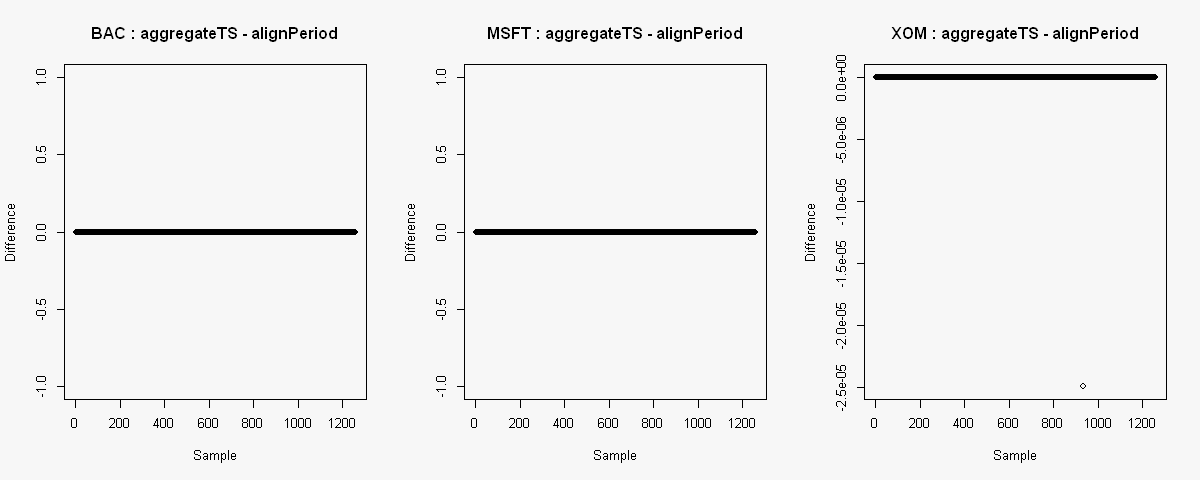

In [58]:
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 3))
par(bg = "#f7f7f7")


for (tick in stock_name){
    plot(as.numeric(RV_5min_agg[[tick]]) - as.numeric(RV_5min[[tick]]),
         xlab = "Sample", ylab= "Difference" , main=paste(tick,": aggregateTS - alignPeriod"))
}

In [59]:
summary(RV_5min_agg[["XOM"]])
summary(RV_5min[["XOM"]])

     Index            XOM.5_Min_RV_agg   
 Min.   :2012-01-03   Min.   :8.914e-06  
 1st Qu.:2013-04-05   1st Qu.:4.235e-05  
 Median :2014-07-05   Median :6.398e-05  
 Mean   :2014-07-03   Mean   :9.145e-05  
 3rd Qu.:2015-10-01   3rd Qu.:1.024e-04  
 Max.   :2016-12-30   Max.   :1.668e-03  

     Index             XOM.5_Min_RV      
 Min.   :2012-01-03   Min.   :8.914e-06  
 1st Qu.:2013-04-05   1st Qu.:4.235e-05  
 Median :2014-07-05   Median :6.398e-05  
 Mean   :2014-07-03   Mean   :9.147e-05  
 3rd Qu.:2015-10-01   3rd Qu.:1.024e-04  
 Max.   :2016-12-30   Max.   :1.668e-03  

 <span style='background: yellow'>**From the plots above, only stock XOM shows one observation of different value of RV, after this self-check seems everything is right.  
But to avoid the 1-scecond index shifting problem in aggregateTS function, we prefer to use alignPeriod parameters in rCov function for further calculation.  
Another reason of trying to avoid aggregate price data into 5-minute period at beginning of process, is to make sure after subsampling intraday trades into morning, noon and afternoon sub-period, for each period there are still enough trades for return calculation. For illiquid stocks during holiday time, there is a possibility that no trade or only one trade in a sub-period, which may cause problem for makeReturn function during calculation.**</span>

* <span style='background: lightblue'>**(2) Calculate 5-minute Realized Variance for intraday sub-periods**</span>

In [60]:
period_name 
period_s 

[1] "Morning"   "Noon"      "Afternoon"

[1] "T09:30:00/T10:59:00" "T11:00:00/T14:29:00" "T14:30:00/T15:59:00"

**Calculate 5-minute Realized Variance by using cleaned return data directly to rCov function, to avoid 1-scecond index shifting problem by using aggregateTS function to price data.**

In [61]:
period_5min_RV <- list()
period_list <- list()
M <- length(period_s)
# merge 3 periods into one xts table
for (tick in stock_name){
#    print(tick)
    for (i in 1: M){
#        print(paste(period_name[i], period_s[i]))
        period_RV <- rCov(rData = period_1min_ret[[period_name[i]]][[tick]], 
            alignBy = "mins",alignPeriod = 5 )
        index(period_RV) <- as.Date(index(period_RV))
        period_list[[period_name[i]]] <- period_RV
    }      
    period_5min_RV[[tick]] <- do.call(merge, period_list) 
    period_list <- NULL
}

lapply(period_5min_RV, head, 3)

$BAC
            BAC.Morning     BAC.Noon BAC.Afternoon
2012-01-03 0.0002222310 0.0001567652  1.755954e-04
2012-01-04 0.0001184248 0.0003062106  7.032544e-05
2012-01-05 0.0006162365 0.0005677790  1.467466e-04

$MSFT
           MSFT.Morning    MSFT.Noon MSFT.Afternoon
2012-01-03 2.113145e-05 3.489221e-05   2.821637e-05
2012-01-04 5.329593e-05 6.892420e-05   1.494011e-05
2012-01-05 3.672612e-05 3.190562e-05   1.582465e-05

$XOM
            XOM.Morning     XOM.Noon XOM.Afternoon
2012-01-03 3.349542e-05 2.541045e-05  2.384617e-05
2012-01-04 4.356749e-05 1.893366e-05  7.500831e-06
2012-01-05 3.179482e-05 3.242565e-05  1.725196e-05


**Check NA value:  
Because some period is empty, during calculation rCov will create NA value, which may cause problem later when compare the sum of intraday RV. So we remove NA in RV tables, set NA value as zero.**

In [62]:
# remove NA value created by rCov after merge
# because the index length of afternoon period days are different
which(is.na(period_5min_RV[[i]]))
for (i in 1 : 3){
    period_5min_RV[[i]][is.na(period_5min_RV[[i]])] <- 0
    print(which(is.na(period_5min_RV[[i]])))
}

[1] 2762 2893

integer(0)
integer(0)
integer(0)


* <span style='background: lightblue'>**(3) Compare graphically of Realized Variance for intraday sub-periods**</span>

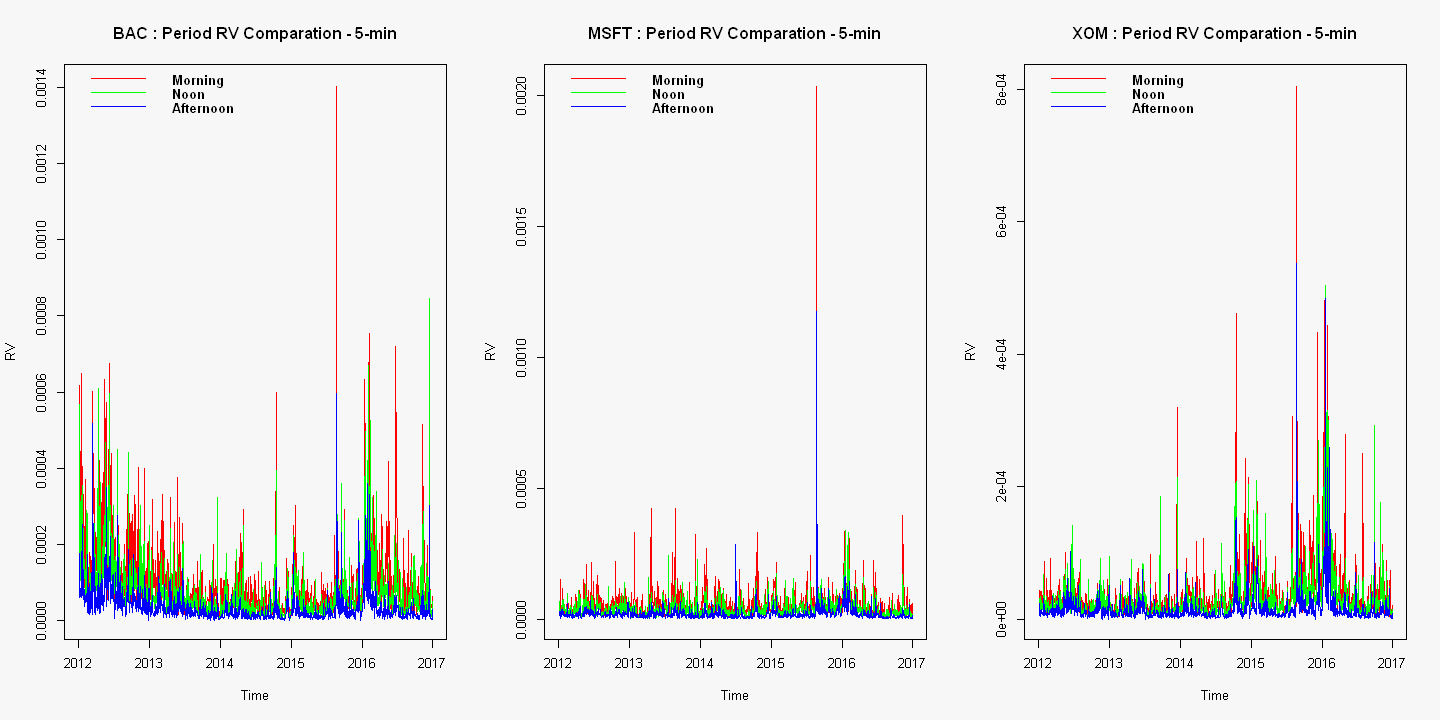

In [63]:
options(repr.plot.width = 12, repr.plot.height = 6)
par(mfrow = c(1, 3))
par(bg = "#f7f7f7")

for (tick in stock_name){
    plot.zoo(period_5min_RV[[tick]][,1], xlab = "Time", ylab = "RV", 
            col = c_col3[1], main=paste(tick,": Period RV Comparation - 5-min"))
    lines(zoo(period_5min_RV[[tick]][,2]), col = c_col3[2], lwd = 1)
    lines(zoo(period_5min_RV[[tick]][,3]), col = c_col3[3], lwd = 1)
    legend("topleft", legend = period_name, col = c_col3, lwd = 1, 
           text.font = 2, bty="n")
}

**The results are similar as 1-minute RV, Morning period has higher maximum RV.**

* <span style='background: lightblue'>**(4) Create 5-minute sum of intraday RV**</span>

In [64]:
# Create the column of sum of intraday RV
period_5min_RV_sum <- period_5min_RV

for (tick in stock_name){    
    period_5min_RV_sum[[tick]]$Period.Sum <- rowSums(period_5min_RV[[tick]][,
        colnames(period_5min_RV[[tick]])])
}
lapply(period_5min_RV_sum, head, 2)
lapply(RV_5min, head, 2)

$BAC
            BAC.Morning     BAC.Noon BAC.Afternoon   Period.Sum
2012-01-03 0.0002222310 0.0001567652  1.755954e-04 0.0005545915
2012-01-04 0.0001184248 0.0003062106  7.032544e-05 0.0004949609

$MSFT
           MSFT.Morning    MSFT.Noon MSFT.Afternoon   Period.Sum
2012-01-03 2.113145e-05 3.489221e-05   2.821637e-05 8.424003e-05
2012-01-04 5.329593e-05 6.892420e-05   1.494011e-05 1.371602e-04

$XOM
            XOM.Morning     XOM.Noon XOM.Afternoon   Period.Sum
2012-01-03 3.349542e-05 2.541045e-05  2.384617e-05 8.275204e-05
2012-01-04 4.356749e-05 1.893366e-05  7.500831e-06 7.000197e-05


$BAC
           BAC.5_Min_RV
2012-01-03 0.0005604533
2012-01-04 0.0004641003

$MSFT
           MSFT.5_Min_RV
2012-01-03  8.451951e-05
2012-01-04  1.360680e-04

$XOM
           XOM.5_Min_RV
2012-01-03 8.216066e-05
2012-01-04 7.005603e-05


* <span style='background: lightblue'>**(5) Compute 5-minute Bipower Variation estimators**</span>

**We Obtain the estimate of BPV using highfrequency package and function rBPCov() with 1 minute prices(makeReturns = TRUE)**

In [65]:
# use Realized BiPower Covariance function, makeReturns = TRUE
BPV_5min <- list()
for (tick in stock_name){    
    BPV_5min[[tick]] <- rBPCov(rData = price_1min[[tick]], makeReturns = TRUE,
        alignBy = "mins",alignPeriod = 5)   
    
    # put xts index as date, instead of minute
    index(BPV_5min[[tick]]) <- v_date
    # put column name
    colnames(BPV_5min[[tick]]) <- paste0(tick,".1_Min_BPV")    
}
# put list key as tickers
names(BPV_5min) <- stock_name

lapply(BPV_5min, head, 2)

$BAC
           BAC.1_Min_BPV
2012-01-03  0.0003782350
2012-01-04  0.0004722208

$MSFT
           MSFT.1_Min_BPV
2012-01-03   7.511237e-05
2012-01-04   1.187432e-04

$XOM
           XOM.1_Min_BPV
2012-01-03  7.470590e-05
2012-01-04  6.573824e-05


* <span style='background: lightblue'>**(6) Compute 5-minute MedRV Variation estimators**</span>

In [66]:
# use rMedRVar function, makeReturns = TRUE
medRV_5min <- list()
for (tick in stock_name){    
    medRV_5min[[tick]] <- rMedRVar(rData = price_1min[[tick]], makeReturns = TRUE,
        alignBy = "mins",alignPeriod = 5)
    # put xts index as date, instead of minute
    index(medRV_5min[[tick]]) <- v_date
    # put column name
    colnames(medRV_5min[[tick]]) <- paste0(tick,".1_Min_medRV")    
}
# put list key as tickers
names(medRV_5min) <- stock_name

lapply(medRV_5min, head, 2)

$BAC
           BAC.1_Min_medRV
2012-01-03    0.0003339892
2012-01-04    0.0005384919

$MSFT
           MSFT.1_Min_medRV
2012-01-03     7.047184e-05
2012-01-04     1.192163e-04

$XOM
           XOM.1_Min_medRV
2012-01-03    7.393348e-05
2012-01-04    7.630703e-05


* <span style='background: lightblue'>**(7) Test for 5-minute price jumps using BNSjumpTest**</span>

In [67]:
# use BNSjumpTest function, makeReturns = TRUE
j_5min_test <- list()
for (tick in stock_name){
    j_5min_test[[tick]] <- BNSjumpTest(price_1min[[tick]], 
        IVestimator = "BV", IQestimator = "TP",  makeReturns = TRUE,
        alignBy = "mins",alignPeriod = 5)
}

# check the p-value if greater than 0.05 
for (tick in stock_name){
    I_HF <- sapply(1:day_len, function (j) {
        if (j_5min_test[[tick]][j,"p.value"] < 0.05){1}
        else {0}
    })
    print(paste(tick,": 5-minute significant jumps", sum(I_HF), "from ", day_len))    
}


[1] "BAC : 5-minute significant jumps 340 from  1258"
[1] "MSFT : 5-minute significant jumps 292 from  1258"
[1] "XOM : 5-minute significant jumps 239 from  1258"


* <span style='background: lightblue'>**(8) Generate 5-minute volalitiy from ARMA-GARCH model**</span>

**Calculate daily returns of 5 minute prices**

In [68]:
# use dailyReturn function to calculate daily log returns
daily_rets_5 <- list()
for (tick in stock_name){
    daily_rets_5[[tick]] <- dailyReturn(price_5min[[tick]], type='log')
    # put xts index as date, instead of minute
    index(daily_rets_5[[tick]]) <- v_date
    # put column name
    colnames(daily_rets_5[[tick]]) <- paste0(tick,".5_Min_Day_Ret")    
}
# put list key as tickers
names(daily_rets_5) <- stock_name

# should be the same length as s_date
length(s_date)
lapply(daily_rets_5, length)

lapply(daily_rets_5, head, 2)

[1] 1258

$BAC
[1] 1258

$MSFT
[1] 1258

$XOM
[1] 1258

$BAC
           BAC.5_Min_Day_Ret
2012-01-03       0.010378700
2012-01-04       0.003435767

$MSFT
           MSFT.5_Min_Day_Ret
2012-01-03         0.01426685
2012-01-04         0.02065448

$XOM
           XOM.5_Min_Day_Ret
2012-01-03      -0.001046737
2012-01-04       0.001279037


**Compare daily return calculate from 1-minute price data with 5-minute price data.**

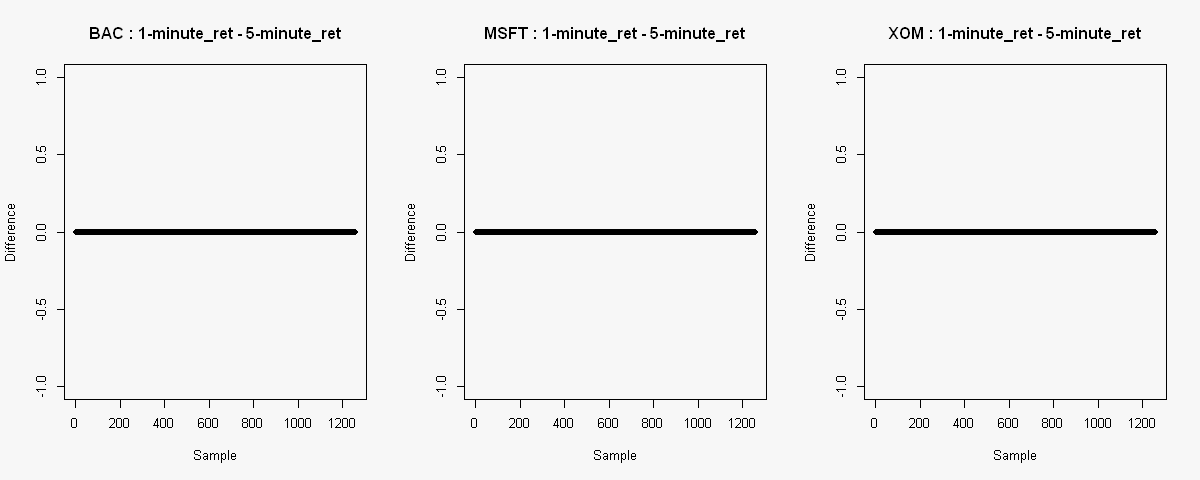

In [69]:
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 3))
par(bg = "#f7f7f7")
for (tick in stock_name){
    plot(as.numeric(daily_rets_1[[tick]]) - as.numeric(daily_rets_5[[tick]]),
         xlab = "Sample", ylab= "Difference" , main=paste(tick,": 1-minute_ret - 5-minute_ret"))
}

**To compare with Problem 1, we still use GARCH(1,2) model to generate conditional volatility.**

In [70]:
# use ugarchfit function to generate conditional volatility from daily log returns
garchvol_5 <- list()
for (tick in stock_name){
    garchvol <- ugarchfit(garchspecm1, daily_rets_5[[tick]])    
    garchvol_5[[tick]] <- garchvol
}
# put list key as tickers
names(garchvol_5) <- stock_name

* <span style='background: lightblue'>**(9) Create Realized Volatility($\sqrt{RV}$) from 5-minute data**</span>

**Create square root of Heterogeneous Autoregressive Model by HARmodel function.**

In [88]:
# call HARmodel function with 1 minute prices RV data
HAR_5min <- list()
for (tick in stock_name){
    HAR_5min[[tick]] <- HARmodel(data = RV_5min[[tick]] , periods = c(1,5,22), RVest = c("rCov"),
        type = "HAR", h = 1, transform = "sqrt", inputType = "RM")   
}
# put list key as tickers
names(HAR_5min) <- stock_name

summary(HAR_5min[["BAC"]])


Call:
"sqrt(RV1) = beta0  +  beta1 * sqrt(RV1) +  beta2 * sqrt(RV5) +  beta3 * sqrt(RV22)"

Residuals:
      Min        1Q    Median        3Q       Max 
-0.008982 -0.002230 -0.000534  0.001795  0.033607 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 0.0012929  0.0004112   3.144 0.001706 ** 
beta1 0.4305662  0.0384825  11.189  < 2e-16 ***
beta2 0.1857867  0.0521121   3.565 0.000378 ***
beta3 0.2718297  0.0415463   6.543 8.83e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.003704 on 1232 degrees of freedom
Multiple R-squared:  0.5298,	Adjusted R-squared:  0.5286 
F-statistic: 462.7 on 3 and 1232 DF,  p-value: < 2.2e-16


* <span style='background: lightblue'>**(10) Compare ARMA-GARCH model with Realized Volatility**</span>

**Because HAR model is generated with monthly data $RV_{t-1}^{(22)}$, so in plot we start the comparison from element 23.**

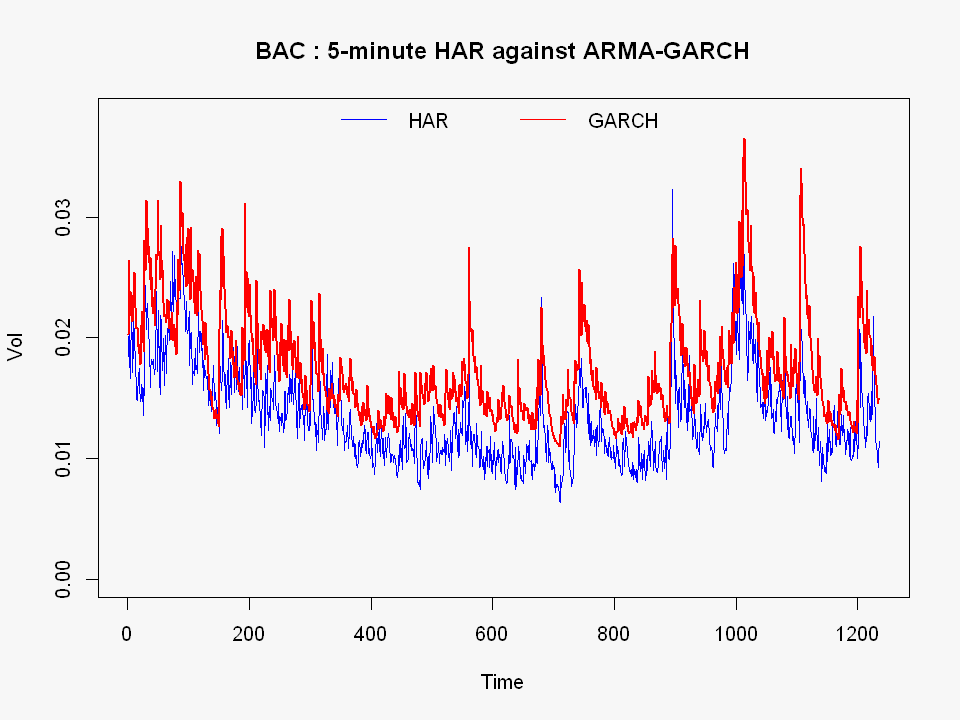

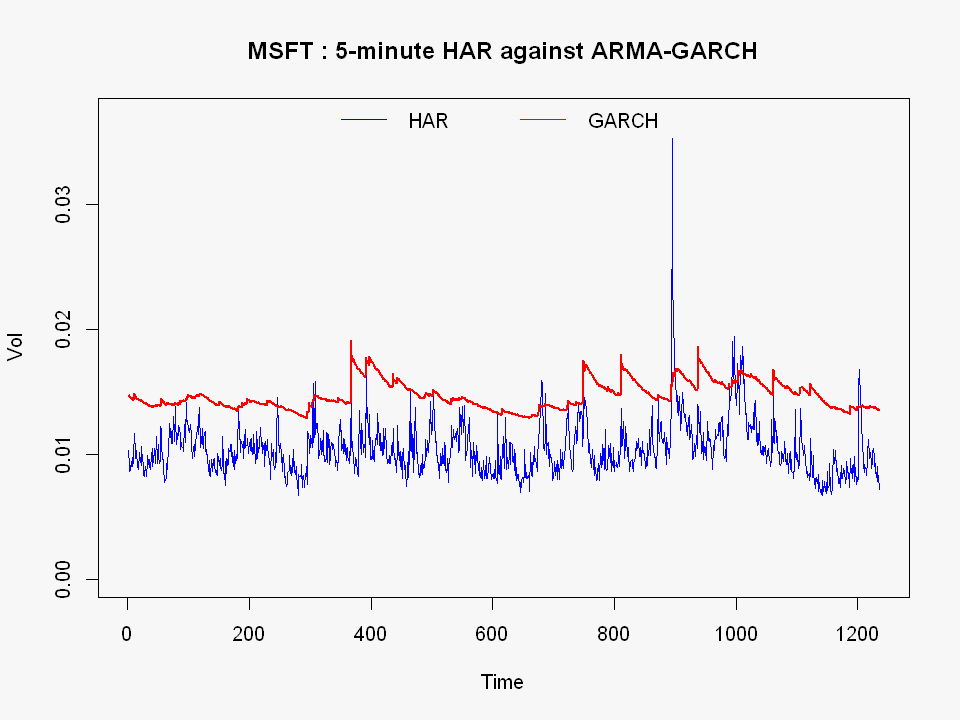

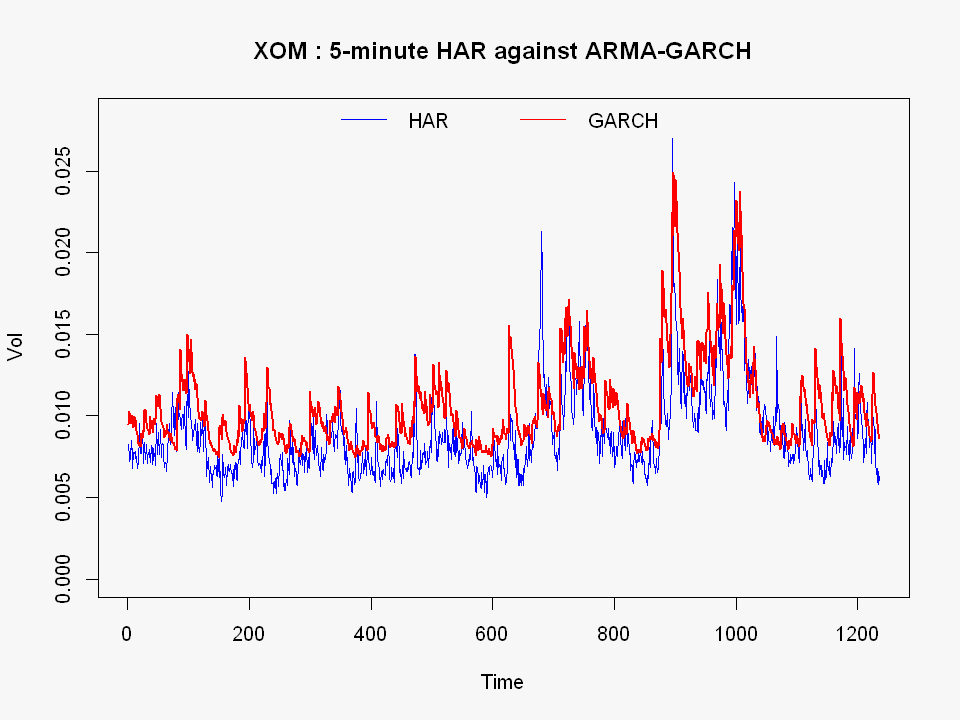

In [89]:
par(bg = "#f7f7f7")
options(repr.plot.width = 8, repr.plot.height = 6)
for (tick in stock_name){
    plot.zoo(HAR_5min[[tick]]$fitted.values, xlab = "Time", ylab = "Vol", 
        col = c_col2[1], main = paste(tick,": 5-minute HAR against ARMA-GARCH"),
        ylim = c(0, 1.05 * max(max(HAR_5min[[tick]]$fitted.values), 
        max(garchvol_5[[tick]]@fit$sigma))))
    lines(zoo(garchvol_5[[tick]]@fit$sigma[23:day_len]), col = c_col2[2], lwd = 2)
    legend("top", ncol = 2, legend = c("HAR", "GARCH"), col = c_col2, 
           lwd = 1, bty="n")    
}

### (B) Compare results obtained in Problem 1 and Problem 2A), i.e. compare results obtained from 1 minute data with results obtained from 5 minute data.

* <span style='background: lightblue'>**(1) Compare Price Data**</span>

**First of all, get a closer look at the difference of sample data which will be used for further analysis. Randomly select one trading day, compare the price data of 1 minute and 5 minute frequency.**

[1] "1-minute price samples per day: 390"
[1] "5-minute price samples per day: 79"


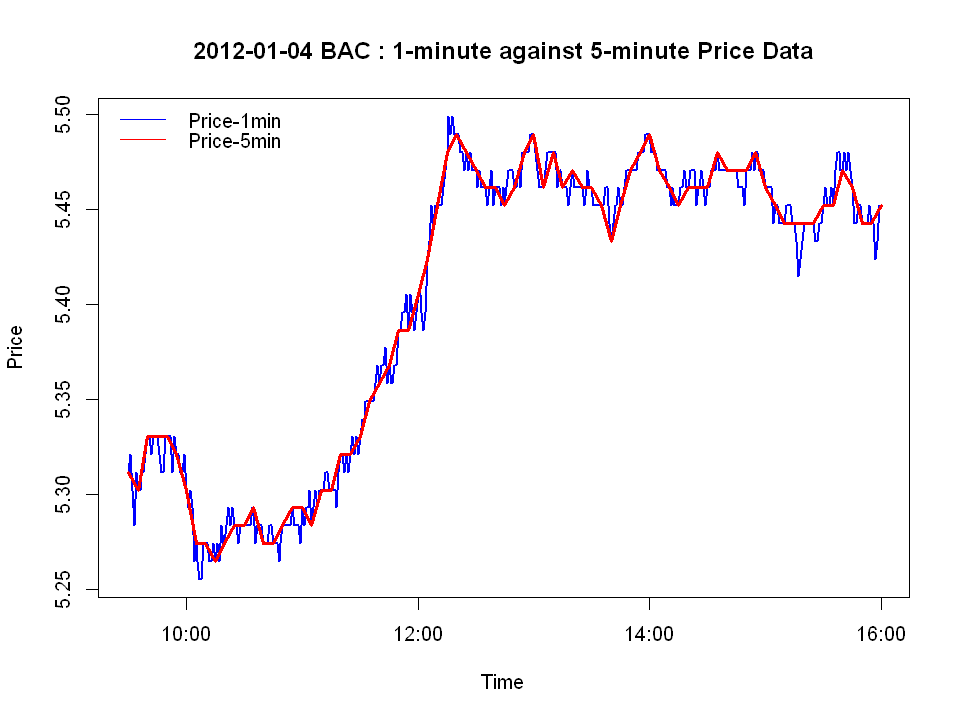

In [93]:
test_tick <- "BAC"
test_date <- "2012-01-04"

print(paste("1-minute price samples per day:", 
           length(price_1min[[test_tick]][test_date])))

print(paste("5-minute price samples per day:", 
           length(price_5min[[test_tick]][test_date])))

options(repr.plot.width = 8, repr.plot.height = 6)
plot.zoo(price_1min[[test_tick]][test_date], xlab = "Time", ylab = "Price", col = c_col2[1],
        main = paste(test_date, test_tick,": 1-minute against 5-minute Price Data"), lwd = 2)
    lines(zoo(price_5min[[test_tick]][test_date]), col = c_col2[2], lwd = 3)
    legend("topleft", legend = c("Price-1min", "Price-5min"), col = c_col2, 
           lwd = 1, bty="n")

<span style='background: yellow'>**By observation, 5-minute price data has smoother line than 1-minute.  
As sampling frequency increased from 1 minute to 5 minute, the fraction n of each trading session increases, and number of sampled observations per trading session $m = \frac{1}{n}$ decreases accordingly. For 6.5 hours per trading session, 1-minute frequency data has 6.5 * 60 = 390 samples, and with 5-minute frequency the sample number is 5 times lower.  
Next, we will examin the effects of jumps and market microstructure noise, when number of sampled observations m increasing.**</span>

* <span style='background: lightblue'>**(2) Compare Realized Variance**</span>

In [74]:
tick <-"BAC"
summary(RV_1min_price[[tick]])
summary(RV_5min[[tick]])

     Index            BAC.1_Min_Price_RV 
 Min.   :2012-01-03   Min.   :0.0000410  
 1st Qu.:2013-04-05   1st Qu.:0.0001329  
 Median :2014-07-05   Median :0.0002021  
 Mean   :2014-07-03   Mean   :0.0002874  
 3rd Qu.:2015-10-01   3rd Qu.:0.0003636  
 Max.   :2016-12-30   Max.   :0.0025960  

     Index             BAC.5_Min_RV      
 Min.   :2012-01-03   Min.   :1.664e-05  
 1st Qu.:2013-04-05   1st Qu.:9.469e-05  
 Median :2014-07-05   Median :1.538e-04  
 Mean   :2014-07-03   Mean   :2.189e-04  
 3rd Qu.:2015-10-01   3rd Qu.:2.704e-04  
 Max.   :2016-12-30   Max.   :2.534e-03  

**Statstic data shows that 5-minute RV is clearly lower than 1-minute RV.   
Next, check the plot to verify the findings.**

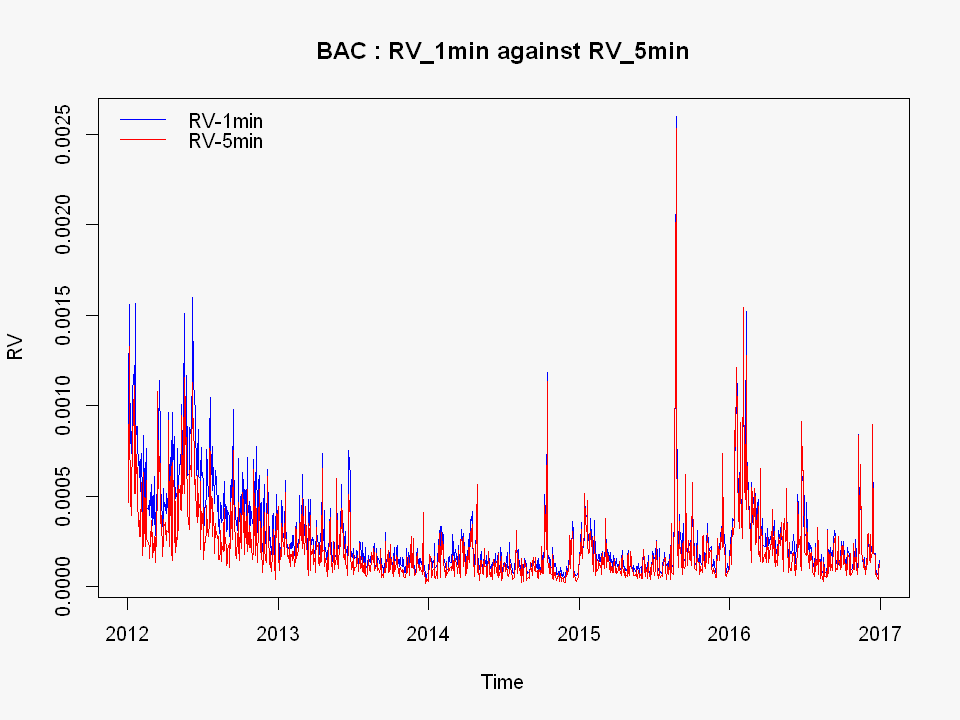

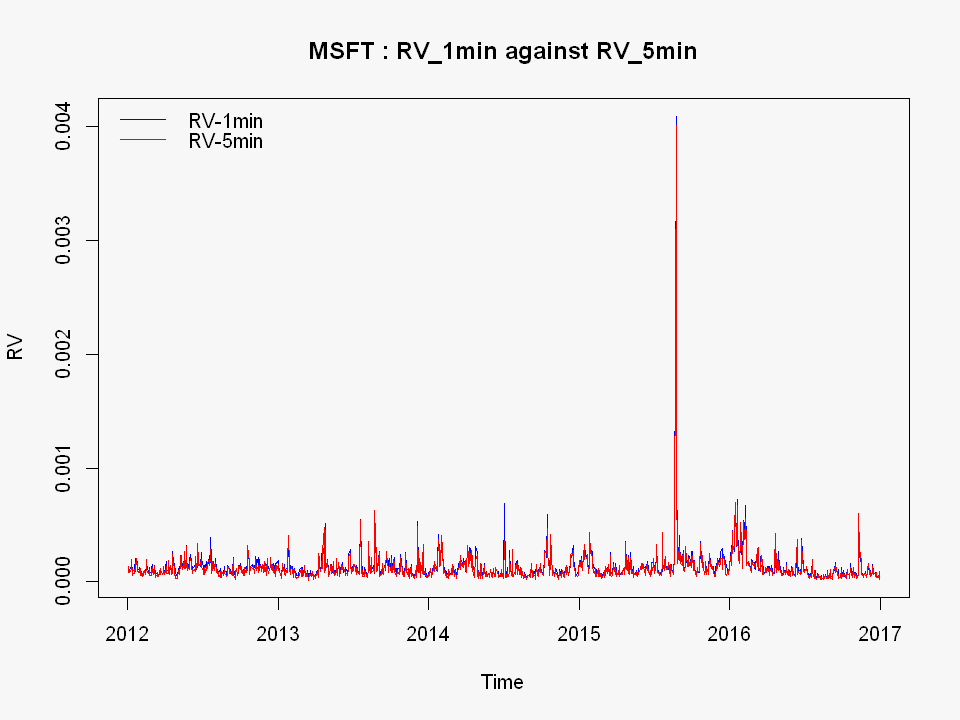

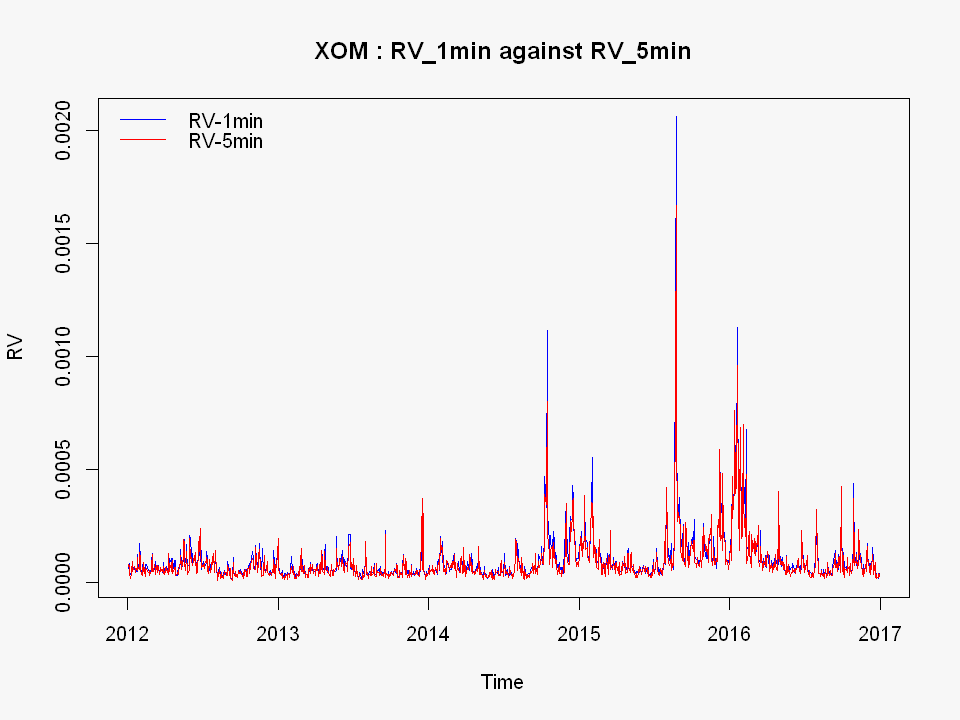

In [75]:
options(repr.plot.width = 8, repr.plot.height = 6)
#par(mfrow = c(1, 3))
par(bg = "#f7f7f7")
for (tick in stock_name){
    plot.zoo(RV_1min_price[[tick]], xlab = "Time", ylab = "RV", col = c_col2[1],
        main = paste(tick,": RV_1min against RV_5min"))
    lines(zoo(RV_5min[[tick]]), col = c_col2[2], lwd = 1)
    legend("topleft", legend = c("RV-1min", "RV-5min"), col = c_col2, 
           lwd = 1, bty="n")
}

<span style='background: yellow'>**The plots above show that 5-minute RV(red line) is lower than 1-minute RV(blue line), which is understandable. By reading the code of library highfrequency, we noticed that in the aggregateTS function weightedaverage() is called during calculation, which would remove short-term outlier price jumps within the 5 minute sample period. Also less ovservations per day may also causes RV lower.  
Through analysis the real trading data of these 3 high liquid stocks, we proved that the estimation of Realized Variance is downwards as the sampling frequency increases.**</span>

* <span style='background: lightblue'>**(3) Compare the difference between daily RV and sum of intraday RV**</span>

**To compare the difference between results from 1-minute and 5-minute data, we select a period when market is relatively quiet to better observe the effect when the stock is less liquid.** 

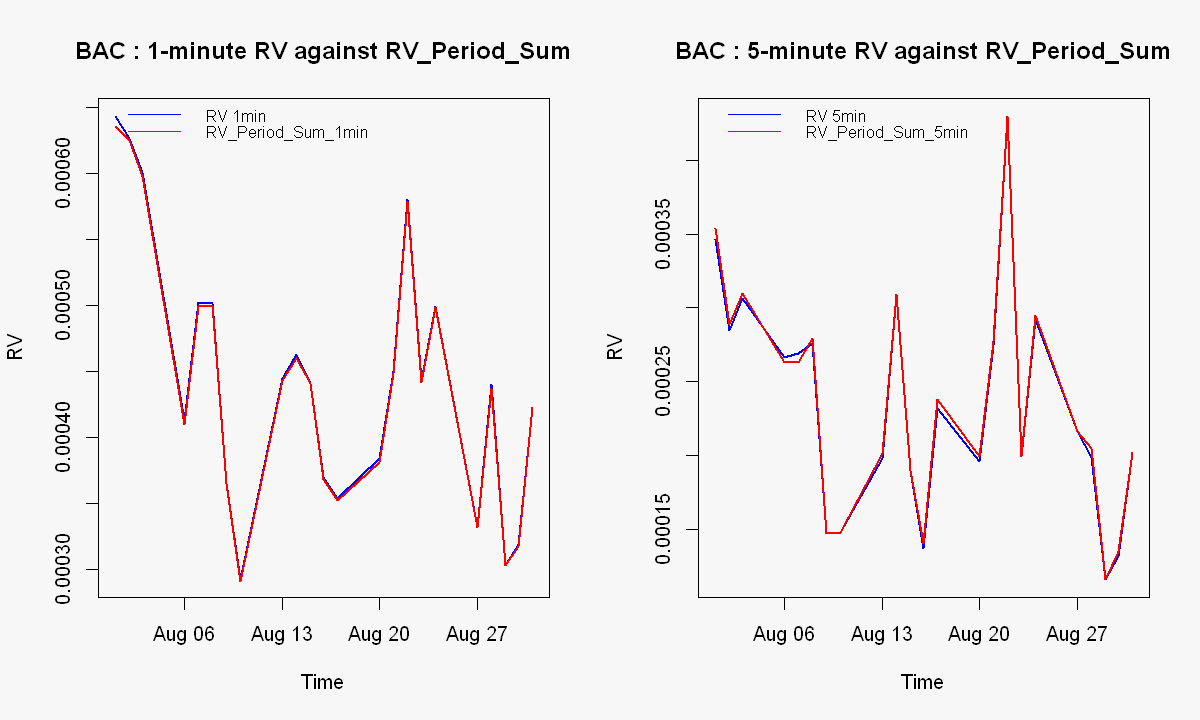

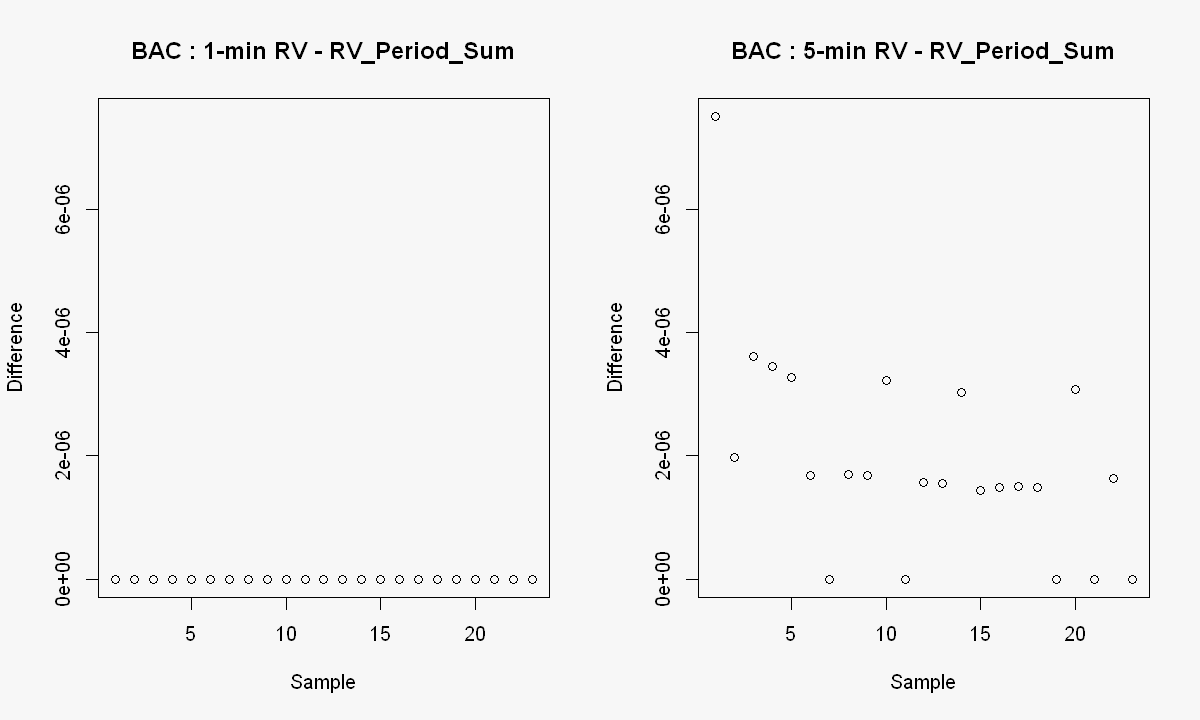

In [76]:
test_tick <- "BAC"
test_date <- "201208"

options(repr.plot.width = 10, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 2))

#Compare 1-minute and 5-minute RV
plot.zoo(RV_1min_price[[test_tick]][test_date], xlab = "Time", ylab = "RV",
         col = c_col2[1],  main = paste(test_tick,": 1-minute RV against RV_Period_Sum"), 
         lwd = 2)
lines(zoo(period_1min_RV_sum_p[[test_tick]][test_date]$Period.Sum), col = c_col2[2], lwd = 2)
legend("top", legend = c("RV 1min", "RV_Period_Sum_1min"), col = c_col2,
         lwd = 1, bty="n", text.font = 1, cex = 0.8)   

plot.zoo(RV_5min[[test_tick]][test_date], xlab = "Time", ylab = "RV", 
         col = c_col2[1],  main = paste(test_tick, ": 5-minute RV against RV_Period_Sum"), lwd = 2)
lines(zoo(period_5min_RV_sum[[test_tick]][test_date]$Period.Sum), col = c_col2[2], lwd = 2)
legend("top", legend = c("RV 5min", "RV_Period_Sum_5min"), col = c_col2, 
         lwd = 1, bty="n", text.font = 1, cex = 0.8)   

# #Compare 1-minute and 5-minute RV difference

# check difference 
diff_1 <- as.numeric(RV_1min_price[[test_tick]][test_date] - period_1min_RV_sum_p[[test_tick]][test_date]$Period.Sum)
diff_5 <- as.numeric(RV_5min[[test_tick]][test_date] - period_5min_RV_sum[[test_tick]][test_date]$Period.Sum)
y_scale <- range(c(ret_diff, price_diff))

plot(ret_diff, ylim = y_scale, xlab = "Sample", ylab= "Difference" , 
     main=paste(test_tick,": 1-min RV - RV_Period_Sum"))
plot(price_diff, ylim = y_scale,  xlab = "Sample", ylab= "Difference" , 
     main=paste(test_tick,": 5-min RV - RV_Period_Sum"))



<span style='background: yellow'>**The analysis shows 5-minute data clearly has higher effect when sum the sub-period RV together. The reason is when there are fewer samples in trading session, removing the samples of inter-period return has higher influence at RV. For example, when subsampling at periods of (9:30−10:59), (11:00−14:29) and (14:30−16:00), the return between trades of 10:59 and 11:00 will be removed, because the trade of 11:00 would be regarded as overnight return. The same as the return between trades of 14:29 and 14:30, would not be counted in sub-period RV calculation.**</span>

* <span style='background: lightblue'>**(4) Compare Bipower Variation estimators**</span>

**Compare RV and BPV, we could see the model fits better by using 5-minute data.**

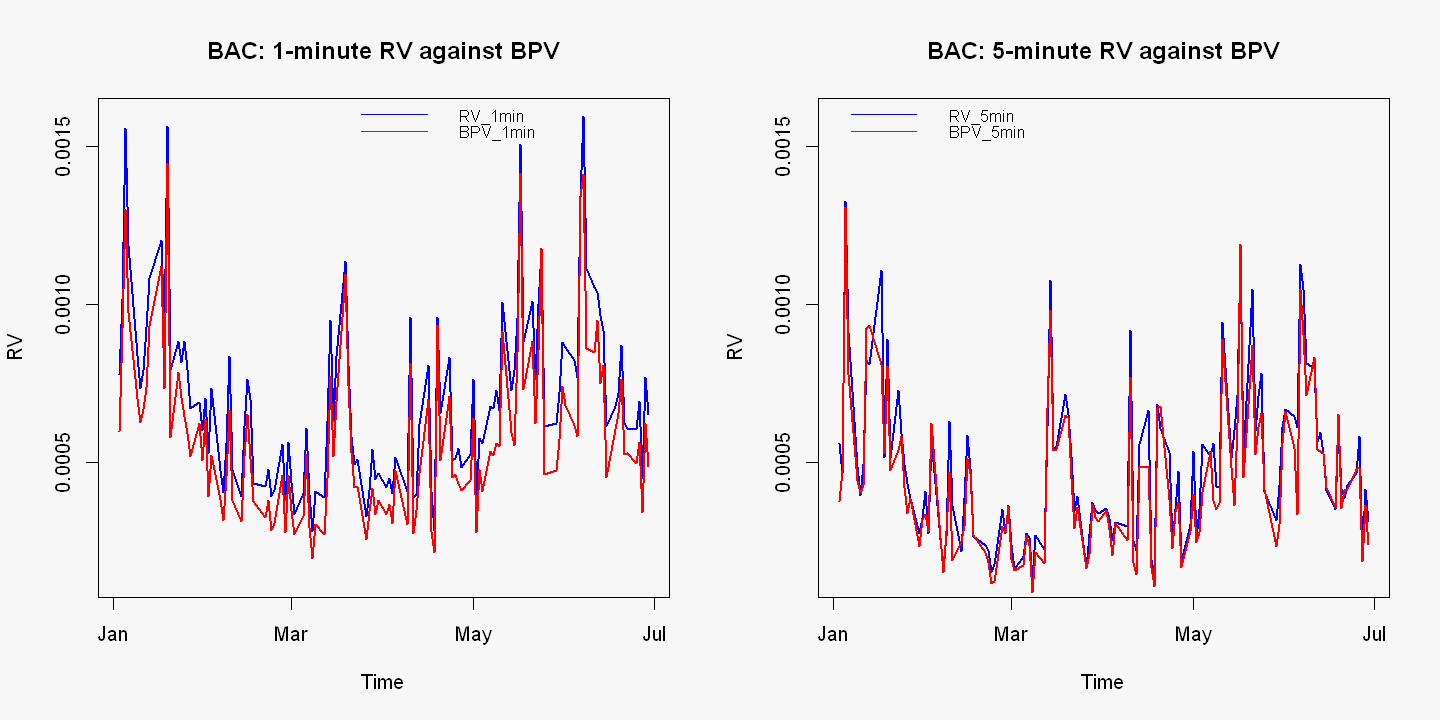

In [77]:
t_date <- "201201/201206"
options(repr.plot.width = 12, repr.plot.height = 6)
par(bg = "#f7f7f7")
par(mfrow = c(1, 2))

y_scale <- range(c(RV_1min_price[["BAC"]][t_date], RV_5min[["BAC"]][t_date]))
plot.zoo(RV_1min_price[["BAC"]][t_date], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste("BAC: 1-minute RV against BPV"), lwd = 2,
        ylim = y_scale)
lines(zoo(BPV_1min[["BAC"]][t_date]), col = c_col2[2], lwd = 2)
legend("topright", legend = c("RV_1min", "BPV_1min"), col = c_col2, 
          lwd = 1, bty="n", text.font = 1, cex = 0.8)

plot.zoo(RV_5min[["BAC"]][t_date], xlab = "Time", ylab = "RV", 
        col = c_col2[1], main = paste("BAC: 5-minute RV against BPV"), lwd = 2,
        ylim = y_scale)
lines(zoo(BPV_5min[["BAC"]][t_date]), col = c_col2[2], lwd = 2)
legend("topleft", legend = c("RV_5min", "BPV_5min"), col = c_col2, 
           lwd = 1, bty="n", text.font = 1, cex = 0.8)   

**From observation, we could notice that 5-minute RV is overall lower and smoother. Also there are fewer jumps in 5-minute RV chart, which makes BPV model better fit in with the real RV.**

* <span style='background: lightblue'>**(5) Test for 5-minute price jumps using BNSjumpTest**</span>

In [78]:
#library("scales")

# check the p-value if greater than 0.05 
day_len <- length(j_1min_test[[1]]$p.value)
for (tick in stock_name){
    I_HF <- sapply(1:day_len, function (j) {
        if (j_1min_test[[tick]][j,"p.value"] < 0.05){1}
        else {0}
    })
    real_jump <- sum(I_HF)
    print(paste(tick,": 1-minute significant jumps", real_jump, "from ", 
        day_len, "ratio:", percent(real_jump/day_len)))    
}

day_len <- length(j_5min_test[[1]]$p.value)
day_len
for (tick in stock_name){
    I_HF <- sapply(1:day_len, function (j) {
        if (j_5min_test[[tick]][j,"p.value"] < 0.05){1}
        else {0}
    })
    real_jump <- sum(I_HF)
    print(paste(tick,": 5-minute significant jumps", real_jump, "from ", 
        day_len, "ratio:", percent(real_jump/day_len)))  
}


[1] "BAC : 1-minute significant jumps 667 from  1258 ratio: 53%"
[1] "MSFT : 1-minute significant jumps 476 from  1258 ratio: 38%"
[1] "XOM : 1-minute significant jumps 353 from  1258 ratio: 28%"


[1] 1258

[1] "BAC : 5-minute significant jumps 340 from  1258 ratio: 27%"
[1] "MSFT : 5-minute significant jumps 292 from  1258 ratio: 23%"
[1] "XOM : 5-minute significant jumps 239 from  1258 ratio: 19%"


**Testing result shows that 5-minute frequency data has fewer "real" Jumps, the jump ratio decrease 10-20% compared with 1-minute frequency data.**

* <span style='background: lightblue'>**(6) Compare ARMA-GARCH model with Realized Volatility**</span>

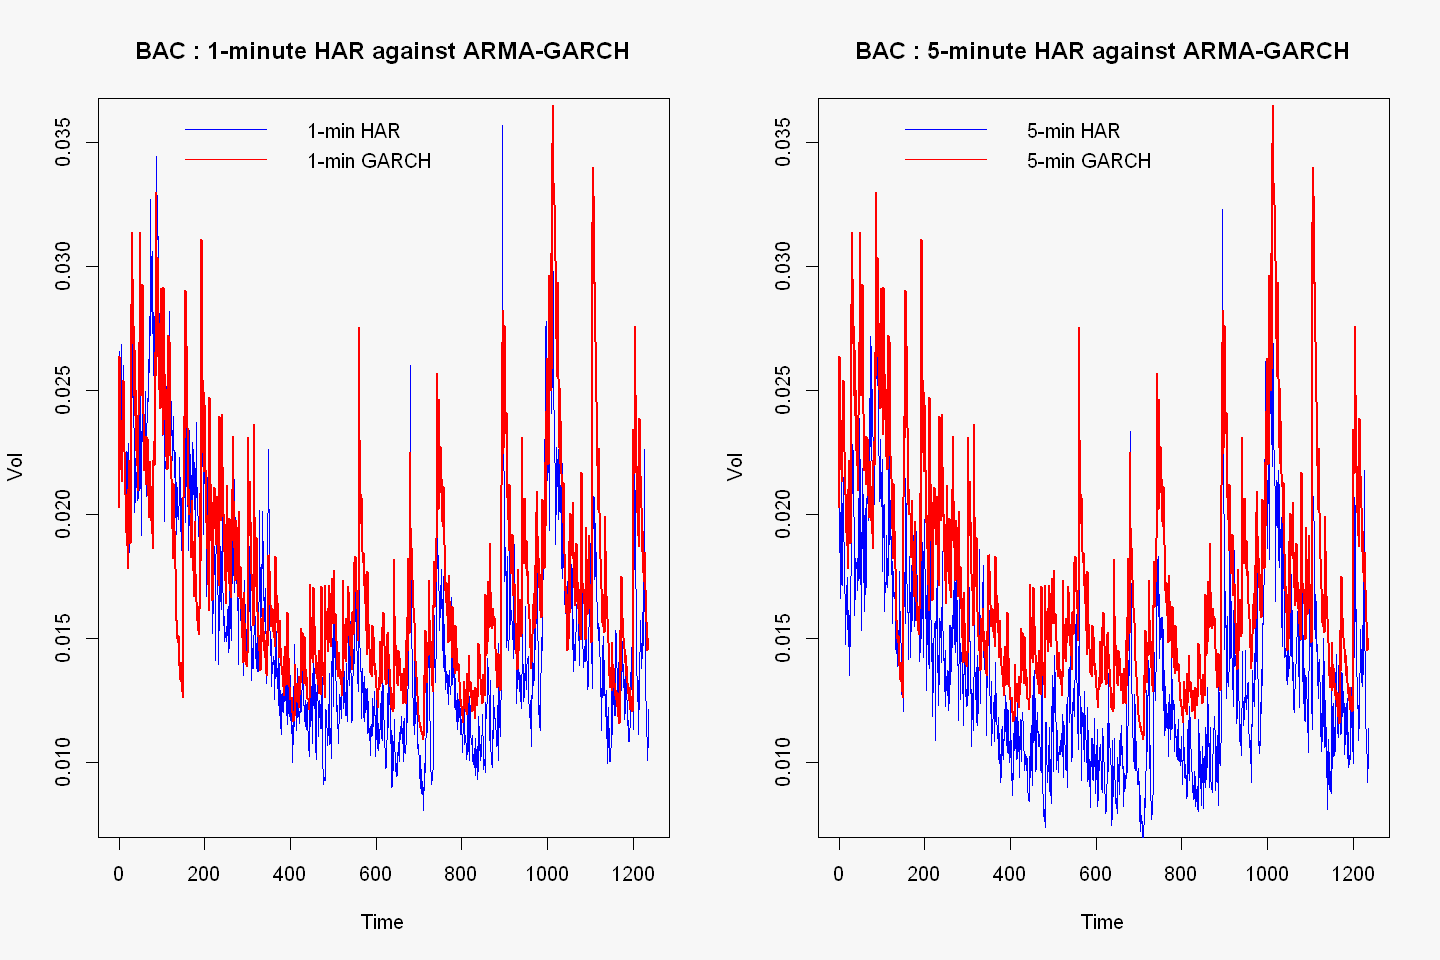

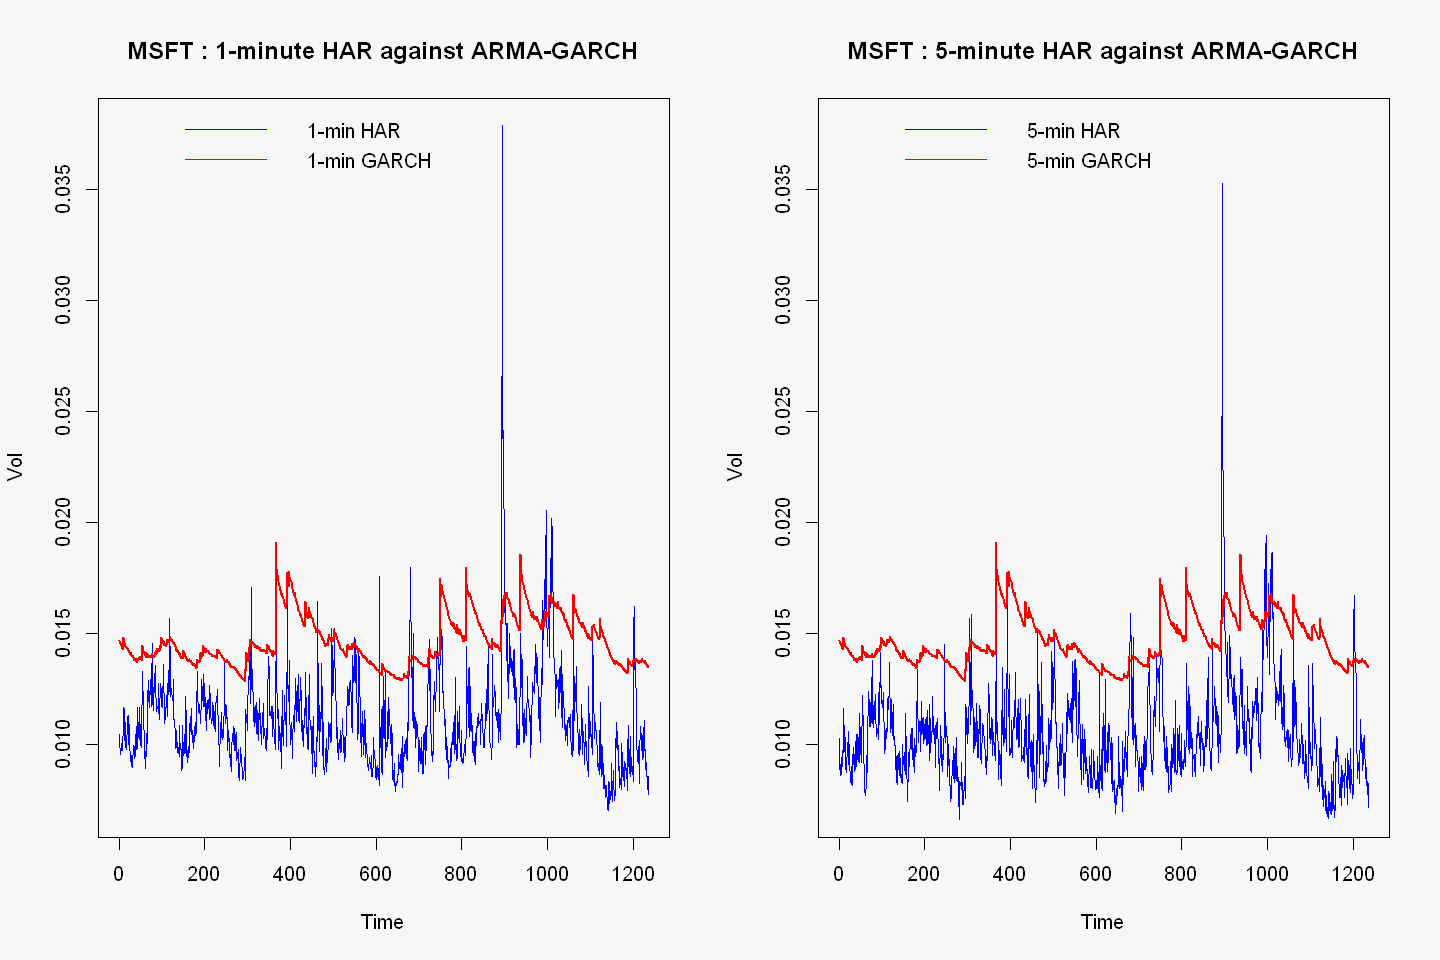

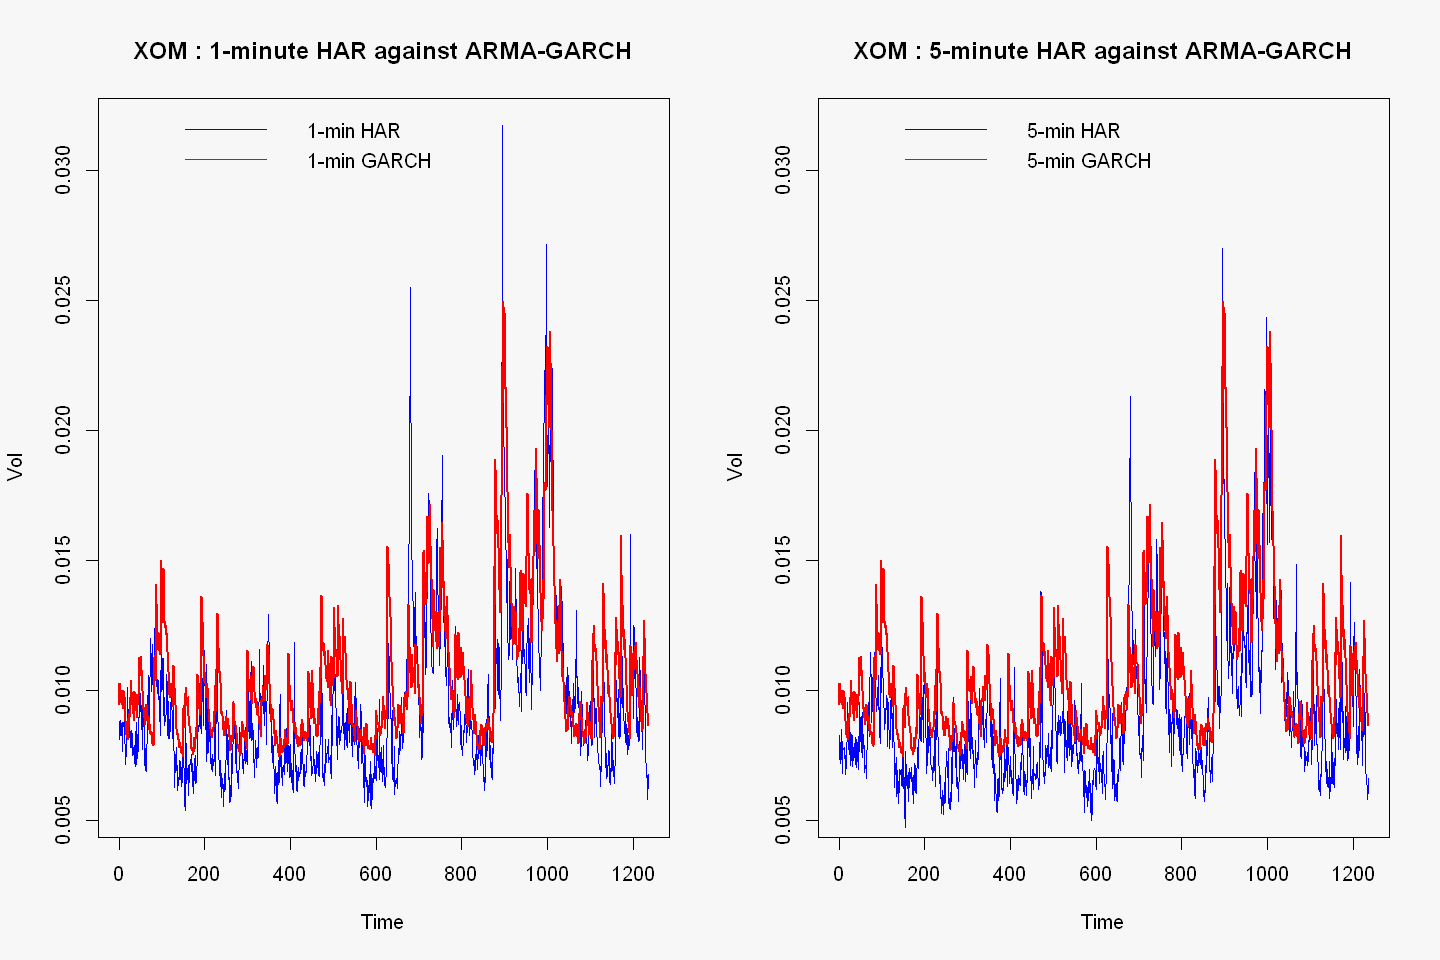

In [79]:
par(bg = "#f7f7f7")
options(repr.plot.width = 12, repr.plot.height = 8)
par(mfrow = c(1, 2))

for (tick in stock_name){
    # show 1-minute plot
    
    # 1 minute HAR always has higher RV
    #y_scale <- range(c(0,HAR_1min[[tick]]$fitted.values)) 
    y_scale <- range(HAR_1min[[tick]]$fitted.values)
    plot.zoo(HAR_1min[[tick]]$fitted.values, xlab = "Time", ylab = "Vol", 
        col = c_col2[1], main = paste(tick,": 1-minute HAR against ARMA-GARCH"),
         ylim = y_scale) 
    lines(zoo(garchvol_1[[tick]]@fit$sigma[23:day_len]), col = c_col2[2], lwd = 2)
    legend("top", legend = c("1-min HAR", "1-min GARCH"), lwd = 1,col = c_col2, bty="n")    

    # show 5-minute plot
    plot.zoo(HAR_5min[[tick]]$fitted.values, xlab = "Time", ylab = "Vol", 
        col = c_col2[1], main = paste(tick,": 5-minute HAR against ARMA-GARCH"),
        ylim = y_scale)
    lines(zoo(garchvol_5[[tick]]@fit$sigma[23:day_len]), col = c_col2[2], lwd = 2)
    legend("top", legend = c("5-min HAR", "5-min GARCH"), col = c_col2, 
           lwd = 1, bty="n")    
}


**By comparing the 1-minute and 5-minute conditional volatility from ARMA-GARCH model with Realized Volatility(HAR) model, we could see in 5-minute data two models fit each other better, also overall 5-minute models have lower volatility.  
The reason is the changes in prices that are ‘too large’ for a continuous process such as ARMA-GARCH model, and 5-minute frequency data smoothed the jumps, so that GARCH could better catch the volativity informations only from return data.**

### <span style='background: lightblue'>Conclusions</span>

**From our analysis, we reached below findings:**  
* **Directly call makeReturns function on price dataset, may cause created return dataset includes unwanted overnight returns, which could cause the estimated Realized Variance higher, especially for illiquid stocks;**
* **By creating intraday sub-period RV, may cause the sum of intraday RV lower, due to lost the return from inter-subpeirods prices. In the case of quiter market period or longer sampling period, may cause higher influence to sub period RV;**
* **Estimated data created by conditional volatility(ARMA-GARCH) model could not catch the Jumps information correctly, resulting at smoother shape compared with data generated by Realized Volatility(HAR) model;**
* **Realized Variance decreases as the sampling frequency increases to longer period, 5-minute frequency data has lower RV and fewer real Jumps.**